# ***Brazilian E-Commerce Public Dataset by Olist***

This project was carried out by Alpha's Team:
1. Akmal Azaki
2. Ahmad Baihaqi
3. Athian Istafa Yahya

## **Business Problem Understanding**

 
#### **Context**
Olist merupakan salah satu perusahaan marketplace terbesar di Brazil yang bergerak di segmen e-Commerce. Olist menghubungkan penjual e-commerce dengan customers secara mudah menggunakan single contract. Dengan demikian, para penjual dapat menjual produk mereka dan mengirimkan produk tersebut kepada customer melalui Olist logistics partners.

Setelah customer membeli produk melalui Olist store, para penjual mendapatkan notifikasi untuk memenuhi pesanan tersebut. Setelah customer menerima produk atau estimasi pengiriman sudah tersedia, customer mendapatkan survey kepuasan dimana para customers dapat memberikan review baik secara tulisan dan juga rating.

Sebagai data scientist, dataset yang tersedia pada Olist dapat dianalisa untuk mengetahui permasalahan yang sedang dihadapi Olist. Menurut ([Statista, 2023](https://www.statista.com/topics/4697/e-commerce-in-brazil/#topicOverview)), segmen e-commerce menghasilkan national total revenue sebesar 170 billion Brazilian reals di tahun 2022, meningkat 2 kali lipat dibandingkan 2019 dan naik sebesar 12% dari tahun 2021. Olist dapat memanfaatkan dataset yang dimiliki. Sehingga, analisis data tersebut menghasilkan kesimpulan dan rekomendasi yang terukur. Hal ini menjadi penting untuk dilakukan bagi Olist untuk mengambil kesempatan pada market yang berkembang pesat dan dapat memiliki competitive advantage diantara kompetitornya dengan cara meningkatkan performansi Olist.

#### **Problem Statement**
Berdasarkan Cohort analysis yang kita lakukan, terdapat suatu permasalahan dimana mayoritas setiap customer hanya melakukan frekuensi pembelian satu kali. Maka dari itu dibutuhkan solusi untuk meningkatkan frekuensi pembelian dalam E-commerce ini. Salah satu strategi yang dapat dilakukan yaitu melakukan Strategi pemasaran.

Aktivitas pemasaran dapat memakan waktu dan sumber daya yang berlebihan jika perusahaan tidak melakukan segmentasi pelanggan terlebih dahulu. Perusahaan ingin meningkatkan efektivitas dan efisiensi pemasaran dengan mengetahui pengelompokan dari setiap pelanggan sehingga perusahaan dapat memberikan metode pemasaran yang tepat untuk setiap pelanggannya.
 
Dan jika pemarasan yang diberikan tidak sesuai ataupun kurang optimal dengan jenis pelanggan, maka perusahaan beresiko kehilangan beberapa pelanggan, bahkan tidak dapat mengoptimalkan pelanggan potensial menjadi pelanggan tetap, dan tidak dapat mempertahankan pelanggan tetap.
 
Pada data e-commerce Olist, angka rata - rata cohort analisis dari customer Olist hanyalah sebesar 0.046%. Sehingga, Olist memiliki customer yang memiliki sifat engagement rendah terhadap pembelian pada Olist atau repeat order dari customer dapat dikatakan masih sangat rendah. Oleh karena itu, perlu dilakukan strategi marketing agar customer melakukan pembelian ulang pada Olist.

Namun, strategi marketing secara general untuk seluruh customer tidak akan efektif. Strategi marketing yang hendak dilakukan haruslah spesifik berdasarkan kebutuhan dan juga behaviour dari tiap customer Olist. Menurut [Temnjanovski dan Arsova, 2019](https://eprints.ugd.edu.mk/21568/), menyusun sebuah marketing strategi untuk segmentasi customer yang tepat penting untuk menghemat resources dan waktu. Oleh karena itu, terhadap data Olist, akan dilakukan segmentasi customer agar strategi marketing yang dilakukan sesuai dengan kebutuhkan tiap customer segment dari Olist.

#### **Goals**
Maka, berdasarkan probelm statement diatas. Goals dari project ini adalah sebagai berikut:
- Mengatahui customer behaviour seberapa sering customer melakukan pembelian di Olist melalui cohort analysis
- Melakukan cluster modelling untuk memprediksi segmentasi customer
- Memahami kebutuhan setiap customer segment dengan cara melakukan Exploratory Data Analysis terhadap hasil segmentasi
- Menentukan strategi marketing yang tepat untuk setiap segmentasi customer

#### **Analytic Approach**
Dalam project ini, kami menggunakan RFM Analysis dan K-Means Clustering dalam menentukan segmentasi pelanggan. RFM analysis membagi kebiasaaan pelanggan berdasarkan :
1. Recency: jumlah hari terakhir pelanggan melakukan transaksi
2. Frequency: frekuensi pembelian pelanggan
3. Monetary: nominal transaksi pelanggan

Untuk penentuan jumlah cluster menggunakan algoritma K-Means, kami menggunakan:
1. Silhouette Score: Silhouette Score mengukur seberapa baik setiap titik data ditempatkan dalam klasternya sendiri dibandingkan dengan klaster sekitarnya. Score ini berkisar antara -1 hingga 1, dan nilai yang lebih tinggi menunjukkan bahwa titik data tersebut ditempatkan dengan baik dalam klasternya dan berjauhan dari klaster lainnya. Jika Silhouette Score mendekati 1, itu menunjukkan bahwa klasternya sesuai.
Jika mendekati -1, itu menunjukkan bahwa titik data mungkin lebih baik ditempatkan dalam klaster lain. Nilai mendekati 0 menunjukkan tumpang tindih antar klaster.
2. Elbow Method berfokus pada varian intra-klaster sebagai fungsi dari jumlah klaster. Fungsi objektif yang diukur adalah jumlah kuadrat jarak antara setiap titik data dengan pusat klasternya. Jumlah klaster optimal dipilih di titik "siku" (elbow) di grafik, di mana penurunan varian mulai melambat.
3. Domain Knowledge untuk penyesuaian dan tujuan bisnis.

# Importing Libraries

In [1]:
# Standard Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA
import folium
from scipy.stats import normaltest, kruskal
from operator import attrgetter

# Preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

# Methodology
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import category_encoders as ce
pd.options.display.max_columns = None

## Import Dataset

In [2]:
products = pd.read_csv("olist_products_dataset.csv")
prod_cat_name = pd.read_csv("product_category_name_translation.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
geoloc = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")


## **Data Description**


Dataset ini memiliki 9 file csv yang saling berhubungan satu sama lain.

![alt text](https://i.imgur.com/HRhd2Y0.png)

Setiap fitur atau kolom dari dataset dijelaskan di bawah ini:

* Tabel `customers` berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**customer_id** | kunci untuk order dataset. Setiap order memiliki id yang unik.
**customer_unique_id**    | id unik setiap customer.
**customer_zip_code_prefix** | 5 digit pertama kode pos customer.
**customer_city** | nama kota customer.
**customer_state** |  negara customer.

* Tabel `sellers` berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**seller_id** |   ID setiap penjual.
**seller_zip_code_prefix** | 5 digit pertama kode pos penjual.
**seller_city** | nama kota penjual.
**seller_state** | negara penjual.


* Tabel `order_items`  berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**order_id** | id setiap order.
**order_item_id** | nomor urut untuk mengidentifikasi jumlah item yang termasuk dalam pesanan yang sama.
**product_id** |id setiap produk.
**seller_id** | id setiap penjual.
**shipping_limit_date** | menunjukkan tanggal batas pengiriman penjual untuk menangani pesanan ke mitra logistik.
**price** | harga item.
**freight_value** | biaya ongkos kirim tiap satu produk. 

* Tabel `order_payments` berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**order_id** | id setiap order.
**payment_sequential** | pelanggan dapat membayar pesanan dengan lebih dari satu metode pembayaran. Jika dia melakukannya, urutan akan dibuat untuk mengakomodasi semua pembayaran.
**payment_type** |  metode pembayaran yang dipilih oleh customer.
**payment_installments** | jumlah angsuran yang dipilih oleh customer.
**payment_value** | total transaksi.



* Tabel `orders`  berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**order_id** | id setiap order.
**customer_id** | id setiap customer.
**order_status** | status pesanan (delivered, shipped, etc).
**order_purchase_timestamp** | menunjukkan waktu pembelian.
**order_approved_at** | menunjukkan waktu persetujuan pembayaran.
**order_delivered_carrier_date** | menunjukkan waktu pengiriman pesanan. Saat itu ditangani ke mitra logistik.
**order_delivered_customer_date** | Menunjukkan waktu penerimaan pesanan. Saat itu ditangani oleh pelanggan.
**order_estimated_delivery_date** | Menunjukkan perkiraan tanggal pengiriman yang diinformasikan kepada pelanggan pada saat pembelian.


* Tabel `order_reviews`  berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**review_id** | id setiap review.
**order_id** |  id setiap order.
**review_score** | Nilai mulai dari 1 sampai 5 yang diberikan oleh pelanggan pada survei kepuasan.
**review_comment_title** | Judul komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis.
**review_comment_message** | Isi komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis.
**review_creation_date** | Menunjukkan tanggal pengiriman survei kepuasan kepada pelanggan.
**review_answer_timestamp** | Menampilkan Tanggal waktu jawaban survei kepuasan.


* Tabel `products` berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**product_id** | id setiap produk.
**product_category_name** | kategori nama produk, dalam bahasa Portugis.
**product_name_lenght** | Panjang karakter tiap nama produk.
**product_description_lenght** | Panjang karakter tiap deskripsi produk.
**product_photos_qty** | jumlah foto produk yang diterbitkan.
**product_weight_g** | berat produk diukur dalam gram.
**product_length_cm** | Panjang produk diukur dalam cm
**product_height_cm** | Tinggi produk diukur dalam cm.
**product_width_cm** | Lebar produk diukur dalam cm.


* Tabel `geolocation` berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**geolocation_zip_code_prefix** | 5 digit pertama kode pos.
**geolocation_lat** | latitude.
**geolocation_lng** | longitude.
**geolocation_city** | nama kota.
**geolocation_state** | negara.


* Tabel `category_name` berisi fitur-fitur berikut:

Feature | Description 
----------|---------------
**product_category_name** | nama kategori produk dalam bahasa portugis.
**product_category_name_english** | nama kategori produk dalam bahasa inggris.



## **Data Understanding**

### **1. Customers Table**

In [3]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers['customer_unique_id'].nunique()

96096

In [6]:
customers[customers.duplicated(subset='customer_unique_id')]

customer_id                customer_unique_id  \
679    c57b4b6f3719475543b721e720a526ad  b6c083700ca8c135ba9f0f132930d4e8   
1463   9f6f3da49e2d46e3a7529f5e3c25ecce  a40096fc0a3862e9e12bc55b5f8e6ab2   
1607   299f7b5125c8fbe1761a1b320c34fc7d  b8b3c435a58aebd788a477bed8342910   
2811   226d59f9f4b98e228b689eea45d03a6d  66980c3775537536f77b434d74e520f5   
3198   b1253701171dfb298f52a221f824e45b  788313d21c3507fe890921f6e17aa679   
...                                 ...                               ...   
99324  5b46a0d983eec8c97363bea78d4a69dd  8bab3162259edfaadd1ea2e1fe7f58dc   
99327  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
99336  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
99353  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   
99406  d9110683c7a282144e9fc97660026a28  5cbfdb85ec130898108b32c50d619c39   

       customer_zip_code_prefix         customer_city customer_state  
679                        8686                suzano             SP  
1463                      20561        rio de janeiro             RJ  
1607                      95585         arroio do sal             RS  
2811                      30290        belo horizonte             MG  
3198                      11070                santos             SP  
...                         ...                   ...            ...  
99324                     31565        belo horizonte             MG  
99327                     38050               uberaba             MG  
99336                      9530    sao caetano do sul             SP  
99353                     29134                 viana             ES  
99406                     74980  aparecida de goiania             GO  

[3345 rows x 5 columns]

In [7]:
customers[customers['customer_unique_id'] == 'b6c083700ca8c135ba9f0f132930d4e8']

customer_id                customer_unique_id  \
132  f7c5afab273b47ab517e096e0219b932  b6c083700ca8c135ba9f0f132930d4e8   
679  c57b4b6f3719475543b721e720a526ad  b6c083700ca8c135ba9f0f132930d4e8   

     customer_zip_code_prefix customer_city customer_state  
132                      8686        suzano             SP  
679                      8686        suzano             SP

`Insight`:

Terdapat 99.441 baris dalam tabel ini, tetapi hanya 96.096 nilai `customer_unique_id` yang berbeda yang berarti beberapa baris berisi kolom `customer_unique_id` yang sama. Namun setelah dianalisis lebih lanjut ternyata pelanggan yang memiliki `customer_unique_id` lebih dari 1 baris tersebut memiliki `customer_id` yang berbeda, artinya mereka memesan lebih dari satu kali karena dalam setiap pesanan, seorang pelanggan diberikan ID pelanggan yang berbeda. Oleh karena itu, kami tidak dapat menghapus baris duplikat karena kami memerlukan informasi `id_pelanggan` untuk menetapkan setiap pelanggan ke pesanan mereka.

### **2. Sellers Table**

In [8]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [10]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

`Insight`:

Tabel ini berisi informasi mengenai setiap penjual yang menawarkan produknya di platform Olist, termasuk lokasi mereka. 

### **3. Order Items Table**

In [11]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [12]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
order_items['order_id'].nunique()

98666

In [14]:
order_items[order_items.duplicated(subset='order_id')]

order_id  order_item_id  \
14      0008288aa423d2a3f00fcb17cd7d8719              2   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
43      001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44      001ab0a7578dd66cd4b0a71f5b6e1e41              3   
...                                  ...            ...   
112617  ffecd5a79a0084f6a592288c67e3c298              3   
112635  fff8287bbae429a99bb7e8c21d151c41              2   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
14      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
33      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
43      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
...                                  ...                               ...   
112617  50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
112635  bee2e070c39f3dd2f6883a17a5f0da45  4e922959ae960d389249c378d1c939f5   
112641  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

        shipping_limit_date   price  freight_value  
14      2018-02-21 02:55:52   49.90          13.37  
33      2017-10-20 16:07:52   21.33          15.10  
34      2017-10-20 16:07:52   21.33          15.10  
43      2018-01-04 02:33:42   24.89          17.63  
44      2018-01-04 02:33:42   24.89          17.63  
...                     ...     ...            ...  
112617  2018-03-05 20:15:27   21.90          15.79  
112635  2018-03-27 12:29:22  180.00          48.14  
112641  2017-11-03 02:55:58   55.00          34.19  
112642  2017-11-03 02:55:58   55.00          34.19  
112643  2017-11-03 02:55:58   55.00          34.19  

[13984 rows x 7 columns]

In [15]:
order_items[order_items['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

order_id  order_item_id  \
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
112640  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112641  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

        shipping_limit_date  price  freight_value  
112640  2017-11-03 02:55:58   55.0          34.19  
112641  2017-11-03 02:55:58   55.0          34.19  
112642  2017-11-03 02:55:58   55.0          34.19  
112643  2017-11-03 02:55:58   55.0          34.19

In [16]:
# change shipping limit date format to datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items.shipping_limit_date)

`Insight`:

Terdapat 112.650 baris dalam tabel ini, namun hanya terdapat 98.666 nilai unik pada kolom `order_id`. Hal ini disebabkan oleh beberapa pesanan yang memiliki lebih dari satu item. Informasi tentang nomor item dapat ditemukan dalam kolom `order_item_id`, di mana setiap item diberi ID item yang unik untuk setiap pesanan, dimulai dari 1 dan seterusnya. Setiap baris dalam tabel ini merepresentasikan satu item dalam suatu pesanan. Selain itu, tabel ini mencakup informasi mengenai penjual, harga, dan biaya pengiriman. Format pada kolom `shipping_limit_date` telah diubah dari string menjadi datetime untuk mempermudah proses pengolahan data.


### **4. Order Payments Table**

In [17]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [18]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
order_payments[order_payments.duplicated(subset='order_id')]

order_id  payment_sequential payment_type  \
1456    683bf306149bb869980b68d48a1bd6ab                   1  credit_card   
2324    e6a66a8350bb88497954d37688ab123e                   2      voucher   
2393    8e5148bee82a7e42c5f9ba76161dc51a                   1  credit_card   
2414    816ccd9d21435796e8ffa9802b2a782f                   1  credit_card   
2497    2cbcb371aee438c59b722a21d83597e0                   2      voucher   
...                                  ...                 ...          ...   
103778  fd86c80924b4be8fb7f58c4ecc680dae                   1  credit_card   
103817  6d4616de4341417e17978fe57aec1c46                   1  credit_card   
103860  31bc09fdbd701a7a4f9b55b5955b8687                   6      voucher   
103869  c9b01bef18eb84888f0fd071b8413b38                   1  credit_card   
103874  d41f1036712e18ee525939d08b7a1c98                   1  credit_card   

        payment_installments  payment_value  
1456                       1           8.58  
2324                       1          10.51  
2393                       1           0.67  
2414                       1           5.65  
2497                       1           7.80  
...                      ...            ...  
103778                     1          76.10  
103817                     1          19.18  
103860                     1          77.99  
103869                     6         238.16  
103874                     1           3.57  

[4446 rows x 5 columns]

In [20]:
order_payments[order_payments['order_id'] == '683bf306149bb869980b68d48a1bd6ab']

order_id  payment_sequential payment_type  \
385   683bf306149bb869980b68d48a1bd6ab                   2      voucher   
1456  683bf306149bb869980b68d48a1bd6ab                   1  credit_card   

      payment_installments  payment_value  
385                      1          30.00  
1456                     1           8.58

In [21]:
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

`Insight`:

Setiap pesanan dapat memiliki variasi jenis pembayaran, yang direpresentasikan melalui kolom `payment_sequential` dalam tabel ini. Setiap baris pembayaran mencakup informasi yang berbeda, termasuk jenis pembayaran dan nilai yang terkait. Oleh karena itu, setiap baris dalam tabel mewakili `payment_sequential` yang berbeda untuk setiap pesanan. Jika pesanan dibayar dengan hanya satu jenis pembayaran, maka akan ada satu baris untuk `order_id` tersebut. Namun, jika pesanan dibayar dengan lebih dari satu jenis pembayaran, maka terdapat lebih dari satu baris pada `order_id`. Selain itu, informasi tentang cicilan pembayaran juga disertakan, mencerminkan jumlah cicilan yang telah dibayar oleh pelanggan dengan menggunakan jenis pembayaran tertentu.

### **5. Orders Table**

In [22]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [23]:
orders = orders.drop(columns=['order_approved_at'])

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_carrier_date   97658 non-null  object
 5   order_delivered_customer_date  96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [25]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
orders['order_id'].nunique()

99441

In [27]:
#convert columns containing datetime to datetime format
datetime_col = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']

for col in datetime_col:
    orders[col] = pd.to_datetime(orders[col])

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 5   order_delivered_customer_date  96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


`Insight`:

Tabel ini berisi informasi mengenai setiap pesanan, dengan setiap pesanan direpresentasikan sebagai satu baris dan memiliki `order_id` yang unik. Beberapa informasi terkait pesanan termasuk `customer_id`, yang merupakan ID pelanggan yang dihasilkan untuk setiap pesanan. Hubungan dengan ID unik pelanggan dapat dilacak melalui tabel Pelanggan. Selain itu, terdapat kolom `order_status` yang menunjukkan apakah pesanan telah terkirim, dibatalkan, dan sebagainya. Tabel ini juga mencakup berbagai `timestamp` terkait dengan waktu pembelian (`order_purchase_timestamp`) dan perkiraan tanggal pengiriman yang diinformasikan kepada pelanggan pada saat pembelian (`order_estimated_delivery_date`), . Timestamps ini awalnya disajikan dalam format string, tetapi telah diubah menjadi format datetime untuk memudahkan pemrosesan data.

### **6. Order Reviews Table**

In [29]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [30]:
order_reviews = order_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

In [31]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [32]:
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [33]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

In [34]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


`Insight`:

Terdapat 99.224 ulasan dalam tabel ini, di mana setiap ulasan sesuai dengan suatu `order_id` yang terdapat dalam setiap baris. Saat pelanggan membuat ulasan, minimal terdapat informasi mengenai `review_score` yang menggambarkan kepuasan pelanggan. Selain itu, pelanggan memiliki opsi untuk menyertakan informasi tambahan seperti `review_comment_title` dan `review_comment_message` dalam bahasa Portugis, namun kami memutuskan untuk melakukan drop pada kedua kolom tersebut.

Informasi timestamp juga disertakan dalam tabel ini, di mana `review_creation_date` mencatat tanggal survei kepuasan dikirimkan kepada pelanggan, dan `review_answer_timestamp` mencatat tanggal pelanggan mengisi survei tersebut.

### **7. Products Table**

In [35]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [36]:
products['product_volume'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']
products = products.drop(['product_length_cm','product_height_cm','product_width_cm'],axis=1)

In [37]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_volume              32949 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [38]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_volume                  2
dtype: int64

In [39]:
products['product_id'].nunique()

32951

In [40]:
prod_cat_name

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [41]:
products = products.merge(prod_cat_name, on='product_category_name', how='left')

In [42]:
products.drop('product_category_name', axis=1, inplace=True)

In [43]:
products

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2      96bd76ec8810374ed1b65e291975717f                 46.0   
3      cef67bcfe19066a932b7673e239eb23d                 27.0   
4      9dc1a7de274444849c219cff195d0b71                 37.0   
...                                 ...                  ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                 45.0   
32947  bf4538d88321d0fd4412a93c974510e6                 41.0   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                 50.0   
32949  83808703fc0706a22e264b9d75f04a2e                 60.0   
32950  106392145fca363410d287a815be6de4                 58.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32946                        67.0                 2.0           12300.0   
32947                       971.0                 1.0            1700.0   
32948                       799.0                 1.0            1400.0   
32949                       156.0                 2.0             700.0   
32950                       309.0                 1.0            2083.0   

       product_volume product_category_name_english  
0              2240.0                     perfumery  
1             10800.0                           art  
2              2430.0                sports_leisure  
3              2704.0                          baby  
4              4420.0                    housewares  
...               ...                           ...  
32946         64000.0               furniture_decor  
32947          4864.0     construction_tools_lights  
32948          5103.0                bed_bath_table  
32949          8060.0         computers_accessories  
32950           168.0                bed_bath_table  

[32951 rows x 7 columns]

`Insight`:

Tabel Produk berisi informasi rinci tentang setiap produk yang dijual di platform Olist. Setiap baris dalam tabel mewakili satu produk.

Kami juga telah mengubah kolom `product_category_name` dari bahasa portugis menjadi bahasa inggris dengan nama kolom `product_category_name_english` dimana kolom tersebut kami dapat dari tabel product category name translation.

### **8. Geolocations Table**

In [44]:
geoloc.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [45]:
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [46]:
geoloc['geolocation_zip_code_prefix'].nunique()

19015

In [47]:
geoloc[geoloc.duplicated(subset='geolocation_zip_code_prefix')]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
2                               1046       -23.546129       -46.642951   
10                              1013       -23.547325       -46.634184   
13                              1012       -23.548946       -46.634671   
14                              1037       -23.545187       -46.637855   
15                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
2              sao paulo                SP  
10             sao paulo                SP  
13             sao paulo                SP  
14             são paulo                SP  
15             sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[981148 rows x 5 columns]

`Insight`:

Tabel ini memuat informasi mengenai setiap `geolocation_zip_code_prefix` beserta detail lokasinya seperti latitude and longitude, kota, dan negara bagian. Dalam tabel ini, `geolocation_zip_code_prefix` yang sama dapat muncul dalam beberapa baris, masing-masing dengan nilai geolocation_lat dan geolocation_lng yang berbeda. Hal ini dikarenakan informasi yang kami miliki hanyalah awalan kode pos, yang berarti kode pos sebenarnya mungkin berbeda dari satu baris ke baris lainnya, itulah sebabnya data lokasinya berbeda.

### **9. Category Name Table**

In [48]:
prod_cat_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [49]:
prod_cat_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


`Insight`:

Tabel ini berisi terjemahan nama kategori produk Portugis ke versi bahasa Inggris, namun kami tidak membutuhkan tabel ini lagi karena telah kami join ke tabel products.

**Detail informasi terkait jumlah baris dan kolom pada tiap dataset**

In [50]:
dataset = {
    'Customers': customers,
    'Order Items': order_items,
    'Payments': order_payments,
    'Orders': orders,
    'Products': products,
    'Sellers': sellers,
    'Reviews': order_reviews,
    'Geolocation': geoloc,
    'Category': prod_cat_name
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))
    print(f'{x}', f'{list(y.columns)}')
    print('\n')

Customers [99441, 5]
Customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


Order Items [112650, 7]
Order Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


Payments [103886, 5]
Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


Orders [99441, 7]
Orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


Products [32951, 7]
Products ['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_volume', 'product_category_name_english']


Sellers [3095, 4]
Sellers ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


Reviews [99224, 5]
Reviews ['review_id', 'order_id', 'review_score', 'review_creation_date', 'review_answer_ti

## **Joining datasets and Creating a Final Dataframe**

In [51]:
df1 = order_items.merge(order_payments, on='order_id')
print(df1.shape)
df2 = df1.merge(sellers, on='seller_id')
print(df2.shape)
df3 = df2.merge(products, on='product_id')
print(df3.shape)
df4 = df3.merge(order_reviews, on='order_id')
print(df4.shape)
df5 = df4.merge(orders, on='order_id')
print(df5.shape)
df_olist = df5.merge(customers, on='customer_id')
print(df_olist.shape)

(117601, 11)
(117601, 14)
(117601, 20)
(117329, 24)
(117329, 30)
(117329, 34)


In [52]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   order_item_id                  117329 non-null  int64         
 2   product_id                     117329 non-null  object        
 3   seller_id                      117329 non-null  object        
 4   shipping_limit_date            117329 non-null  datetime64[ns]
 5   price                          117329 non-null  float64       
 6   freight_value                  117329 non-null  float64       
 7   payment_sequential             117329 non-null  int64         
 8   payment_type                   117329 non-null  object        
 9   payment_installments           117329 non-null  int64         
 10  payment_value                  117329 non-null  float64       
 11  

**Attribute Information**

In [53]:
#Display The Attribute Information of df_olist Dataframe
for n, dataset in enumerate([df_olist]):
    prompt = 'df_olist'
    print('\n'+(f' Information Attribute of {prompt} DataSet ').center(151,'='))
    items = [[
        col,
        dataset[col].dtype,
        dataset[col].nunique(),
        list(dataset[col].unique()),
        dataset[col].isnull().sum()
    ] for col in dataset]

    pd.set_option('display.max_colwidth',100)
    display(pd.DataFrame(
        data=items,
        columns=[
            'Attributes',
            'Data Type',
            'Total Unique',
            'Unique Sample',
            'Total Missing'
        ]))


====================================================== Information Attribute of df_olist DataSet ======================================================


Attributes       Data Type  Total Unique  \
0                        order_id          object         97916   
1                   order_item_id           int64            21   
2                      product_id          object         32789   
3                       seller_id          object          3090   
4             shipping_limit_date  datetime64[ns]         92642   
5                           price         float64          5948   
6                   freight_value         float64          6976   
7              payment_sequential           int64            29   
8                    payment_type          object             4   
9            payment_installments           int64            24   
10                  payment_value         float64         28831   
11         seller_zip_code_prefix           int64          2245   
12                    seller_city          object           611   
13                   seller_state          object            23   
14            product_name_lenght         float64            66   
15     product_description_lenght         float64          2958   
16             product_photos_qty         float64            19   
17               product_weight_g         float64          2200   
18                 product_volume         float64          4517   
19  product_category_name_english          object            71   
20                      review_id          object         97708   
21                   review_score           int64             5   
22           review_creation_date  datetime64[ns]           632   
23        review_answer_timestamp  datetime64[ns]         97546   
24                    customer_id          object         97916   
25                   order_status          object             7   
26       order_purchase_timestamp  datetime64[ns]         97370   
27   order_delivered_carrier_date  datetime64[ns]         80449   
28  order_delivered_customer_date  datetime64[ns]         95021   
29  order_estimated_delivery_date  datetime64[ns]           449   
30             customer_unique_id          object         94720   
31       customer_zip_code_prefix           int64         14955   
32                  customer_city          object          4108   
33                 customer_state          object            27   

                                                                                          Unique Sample  \
0   [00010242fe8c5a6d1ba2dd792cb16214, 130898c0987d1801452a8ed92a670612, 532ed5e14e24ae1f0d735b91524...   
1                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]   
2   [4244733e06e7ecb4970a6e2683c13e61, 436c8d57ff8d4aa254318e9bd9b48c83, 7f1a77bec0639e473392e91a504...   
3   [48436dade18ac8b2bce089ec2a041202, 8444e55c1f13cd5c179851e5ca5ebd00, 0db783cfcd3b73998abc6e10e59...   
4   [2017-09-19 09:45:35, 2017-07-05 02:44:11, 2018-05-23 10:56:25, 2017-08-07 18:55:08, 2017-08-16 ...   
5   [58.9, 55.9, 64.9, 132.9, 125.9, 131.9, 54.9, 139.9, 185.03, 149.9, 144.9, 48.9, 44.9, 45.9, 99....   
6   [13.29, 17.96, 18.33, 16.17, 26.93, 38.5, 18.12, 17.83, 35.71, 9.94, 27.99, 27.72, 20.17, 12.84,...   
7   [1, 2, 3, 4, 5, 7, 11, 10, 8, 6, 9, 17, 13, 16, 15, 14, 12, 18, 19, 22, 21, 20, 27, 25, 29, 28, ...   
8                                                            [credit_card, boleto, voucher, debit_card]   
9                [2, 1, 3, 4, 10, 6, 5, 8, 7, 9, 11, 12, 15, 13, 18, 20, 17, 16, 24, 14, 21, 0, 23, 22]   
10  [72.19, 73.86, 83.23, 75.07, 82.83, 103.4, 153.75, 20.0, 51.61, 65.84, 167.51, 153.07, 138.74, 1...   
11  [27277, 37584, 11010, 22240, 3470, 5125, 31910, 3471, 3916, 81350, 31842, 13324, 4001, 88820, 86...   
12  [volta redonda, congonhal, santos, rio de janeiro, sao paulo, belo horizonte, curitiba, salto, i...   
13         [SP, MG, RJ, PR, SC, RS, CE, ES, RN, BA, DF, SE, PE, GO, PB, MA, MT, MS, PI, RO, PA, AM, AC]   
14  [58.0, 54.0, 57.0, 59.0, 52.0, 56.0, 55.0, 51.0, 60.0, 53.0, 23.0, 4

**Descriptive Statistics**

In [54]:
display(df_olist.describe(), df_olist.describe(include='object'))

order_item_id            shipping_limit_date          price  \
count  117329.000000                         117329  117329.000000   
mean        1.194121  2018-01-06 02:01:32.273274368     120.524349   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000            2017-09-18 15:55:47      39.900000   
50%         1.000000            2018-01-25 09:09:32      74.900000   
75%         1.000000            2018-05-10 03:31:06     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.684225                            NaN     182.944843   

       freight_value  payment_sequential  payment_installments  payment_value  \
count  117329.000000       117329.000000         117329.000000  117329.000000   
mean       20.027514            1.094452              2.940151     172.062565   
min         0.000000            1.000000              0.000000       0.000000   
25%        13.080000            1.000000              1.000000      60.750000   
50%        16.280000            1.000000              2.000000     108.100000   
75%        21.180000            1.000000              4.000000     189.060000   
max       409.680000           29.000000             24.000000   13664.080000   
std        15.828077            0.731174              2.775370     265.388194   

       seller_zip_code_prefix  product_name_lenght  \
count           117329.000000        115634.000000   
mean             24450.781955            48.768018   
min               1001.000000             5.000000   
25%               6429.000000            42.000000   
50%              13660.000000            52.000000   
75%              28035.000000            57.000000   
max              99730.000000            76.000000   
std              27582.364358            10.033831   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               115634.000000       115634.000000     117309.000000   
mean                   785.802861            2.205528       2110.763062   
min                      4.000000            1.000000          0.000000   
25%                    346.000000            1.000000        300.000000   
50%                    600.000000            1.000000        700.000000   
75%                    983.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   
std                    652.382965            1.717783       3785.128931   

       product_volume   review_score           review_creation_date  \
count   117309.000000  117329.000000                         117329   
mean     15360.369562       4.031467  2018-01-11 23:57:07.684545024   
min        168.000000       1.000000            2016-10-15 00:00:00   
25%       2856.000000       4.000000            2017-09-22 00:00:00   
50%       6600.000000       5.000000            2018-02-01 00:00:00   
75%      18450.000000       5.000000            2018-05-15 00:00:00   
max     296208.000000       5.000000            2018-08-31 00:00:00   
std      23606.619679       1.387927                            NaN   

             review_answer_timestamp       order_purchase_timestamp  \
count                         117329                         117329   
mean   2018-01-15 03:28:45.726342400  2017-12-30 10:29:39.749081856   
min              2016-10-16 03:20:17            2016-09-04 21:15:19   
25%              2017-09-25 23:24:55            2017-09-11 16:37:08   
50%              2018-02-03 23:11:32            2018-01-18 09:42:57   
75%              2018-05-17 16:20:40            2018-05-03 19:53:54   
max              2018-10-29 12:27:35            2018-09-03 09:06:57   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         116094                         114858   
mean   2018-01-03 12:09:47.466820096  2018-01-12 23:40:18.665

order_id                        product_id  \
count                             117329                            117329   
unique                             97916                             32789   
top     895ab968e7bb0d5659d16cd74cd1650c  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  63                               533   

                               seller_id payment_type seller_city  \
count                             117329       117329      117329   
unique                              3090            4         611   
top     4a3ca9315b744ce9f8e9374361493884  credit_card   sao paulo   
freq                                2128        86520       29048   

       seller_state product_category_name_english  \
count        117329                        115609   
unique           23                            71   
top              SP                bed_bath_table   
freq          83671                         11847   

                               review_id                       customer_id  \
count                             117329                            117329   
unique                             97708                             97916   
top     eef5dbca8d37dfce6db7d7b16dd0525e  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   

       order_status                customer_unique_id customer_city  \
count        117329                            117329        117329   
unique            7                             94720          4108   
top       delivered  9a736b248f67d166d2fbb006bcb877c3     sao paulo   
freq         114859                                75         18582   

       customer_state  
count          117329  
unique             27  
top                SP  
freq            49527

**Numerical Variables**

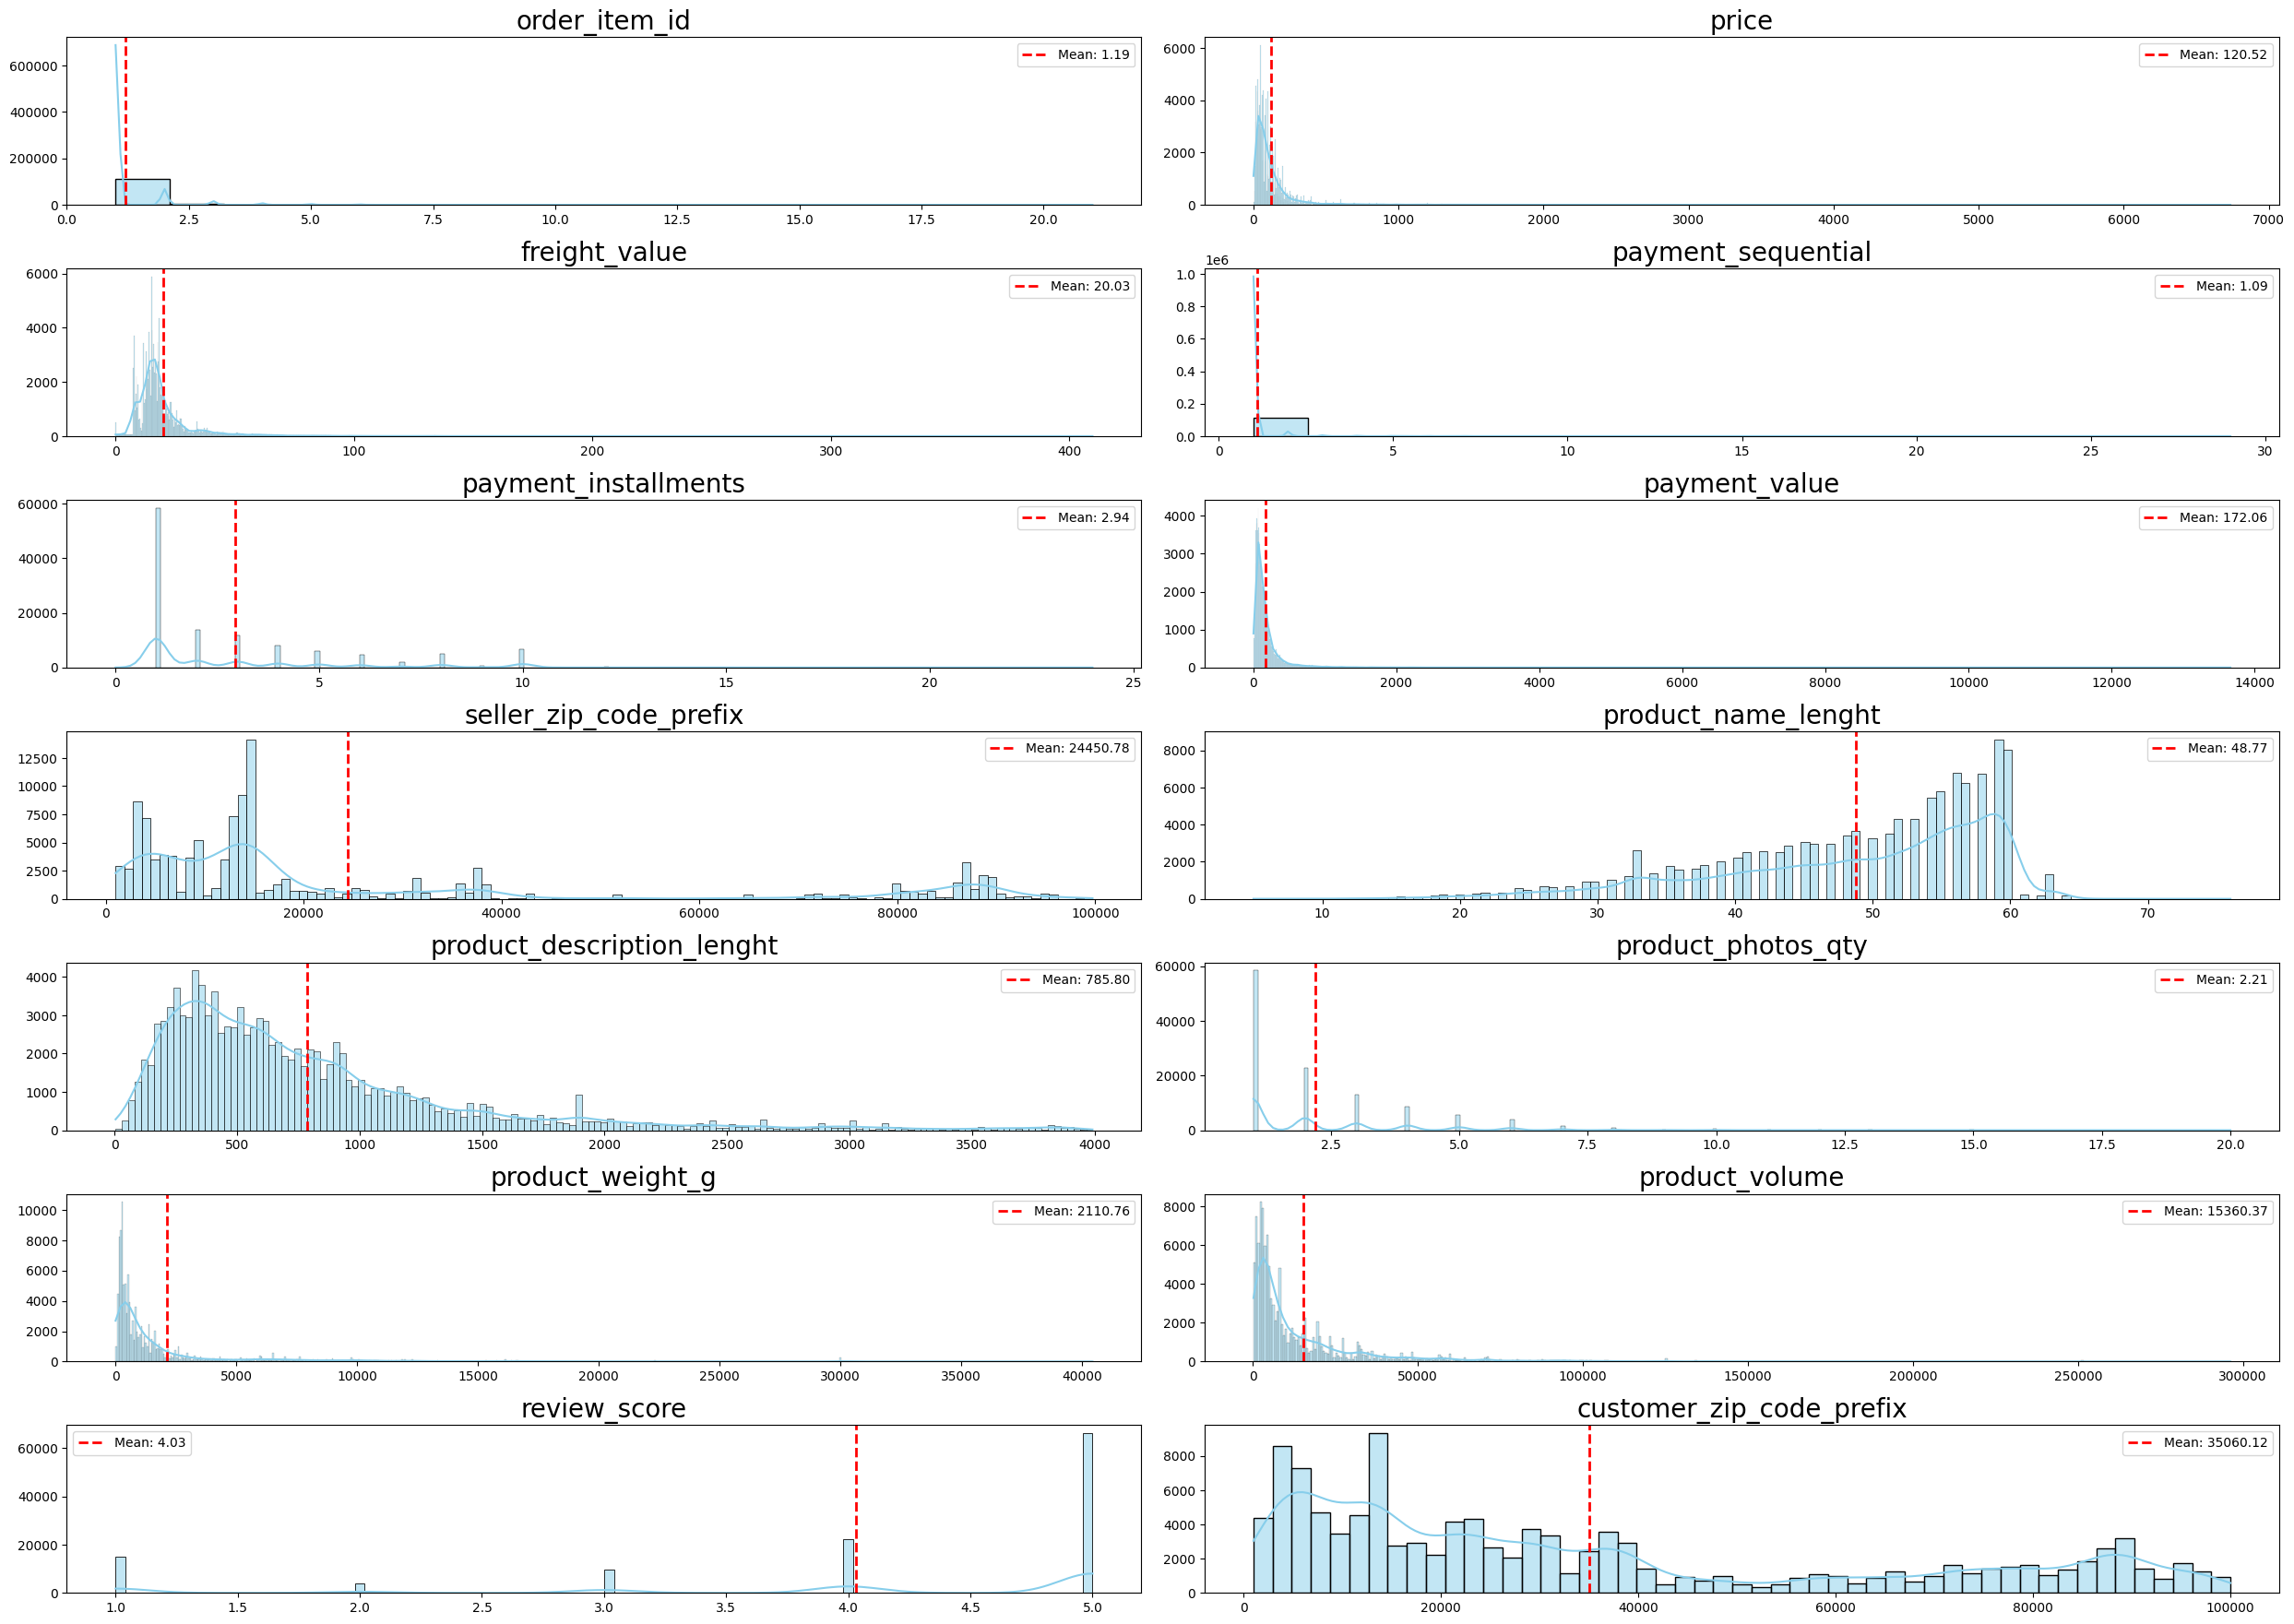

In [55]:
plt.figure(figsize=(25, 25))
plotnumber = 1
num_features = df_olist.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(10, 2, plotnumber)
    
    # Gunakan palet warna yang berbeda untuk setiap plot
    sns.histplot(data=df_olist, x=feature, color='skyblue', kde=True)
    
    # Tambahkan garis rata-rata atau nilai lain yang relevan
    mean_val = df_olist[feature].mean()
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    plt.title(feature, fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    
    plotnumber += 1

plt.tight_layout()
plt.show()

**Insight**:

Distribusi data pada visualisasi Histogram di atas menunjukkan adanya sejumlah outlier dan asumsi normalitas tidak terpenuhi, sehingga untuk menentukan central tendensi, kami akan menggunakan median. Untuk fitur-fitur tersebut diatas, kami tidak akan menggunakan seller_zip_code_prefix  dan customer_zip_code_prefix sebagai fitur untuk modelling karena datanya tidak relevan. Selain itu, kami juga tidak akan menggunakan fitur review_score karena sifatnya diskrit, algoritma seperti K-Means baik digunakan ketika datanya bersifat continue.

In [56]:
# Perform Normality Test on Each Features 
import scipy.stats as stats

num_features = df_olist.select_dtypes(include='number').columns

for k, dataset in enumerate([num_features]):
    prompt = ' Normality Test of DataSet '
    print('\n'+prompt.center(61,'='))
    cols, stats_val, p_val, result = [], [], [], []

    for i in dataset:
        stat, pvalue = stats.kstest(
            df_olist[i],
            np.random.normal(
                df_olist[i].mean(),
                df_olist[i].std(),
                size=len(df_olist[i])
            )
        )

        cols.append(i)
        stats_val.append(stat)
        p_val.append('> 0.05' if pvalue > 0.05 else '< 0.05')
        result.append(True if pvalue > 0.05 else False)

    display(pd.DataFrame(
        data={
            'Statistic':stats_val,
            'P-Value':p_val,
            'Normally Distributed':result
        },
        index=cols
    ))


================= Normality Test of DataSet =================


Statistic P-Value  Normally Distributed
order_item_id                0.490416  < 0.05                 False
price                        0.263788  < 0.05                 False
freight_value                0.219494  < 0.05                 False
payment_sequential           0.509073  < 0.05                 False
payment_installments         0.256424  < 0.05                 False
payment_value                0.259612  < 0.05                 False
seller_zip_code_prefix       0.293448  < 0.05                 False
product_name_lenght          0.137468  < 0.05                 False
product_description_lenght   0.131954  < 0.05                 False
product_photos_qty           0.255776  < 0.05                 False
product_weight_g             0.293380  < 0.05                 False
product_volume               0.262723  < 0.05                 False
review_score                 0.321182  < 0.05                 False
customer_zip_code_prefix     0.147210  < 0.05                 False

## **Data Cleaning and Feature Engineering**

Pada tahap ini kami akan melakukan pembersihan data, seperti menangani nilai yang hilang atau missing value, menangani duplikasi data, mengelompokkan atau mereduksi dimensi dan mengonversi tipe data jika diperlukan sehingga kita bisa mengoptimalkan penggunaan data dalam proses modelling.

In [57]:
df = df_olist.copy()

In [58]:
df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0 2017-09-19 09:45:35   58.9          13.29                   1  credit_card   
1 2017-07-05 02:44:11   55.9          17.96                   1       boleto   
2 2018-05-23 10:56:25   64.9          18.33                   1  credit_card   
3 2017-08-07 18:55:08   58.9          16.17                   1  credit_card   
4 2017-08-16 22:05:11   58.9          13.29                   1  credit_card   

   payment_installments  payment_value  seller_zip_code_prefix    seller_city  \
0                     2          72.19                   27277  volta redonda   
1                     1          73.86                   27277  volta redonda   
2                     2          83.23                   27277  volta redonda   
3                     3          75.07                   27277  volta redonda   
4                     4          72.19                   27277  volta redonda   

  seller_state  product_name_lenght  product_description_lenght  \
0           SP                 58.0                       598.0   
1           SP                 58.0                       598.0   
2           SP                 58.0                       598.0   
3           SP                 58.0                       598.0   
4           SP                 58.0                       598.0   

   product_photos_qty  product_weight_g  product_volume  \
0                 4.0             650.0          3528.0   
1                 4.0             650.0          3528.0   
2                 4.0             650.0          3528.0   
3                 4.0             650.0          3528.0   
4                 4.0             650.0          3528.0   

  product_category_name_english                         review_id  \
0                    cool_stuff  97ca439bc427b48bc1cd7177abe71365   
1                    cool_stuff  b11cba360bbe71410c291b764753d37f   
2                    cool_stuff  af01c4017c5ab46df6cc810e069e654a   
3                    cool_stuff  8304ff37d8b16b57086fa283fe0c44f8   
4                    cool_stuff  426f43a82185969503fb3c86241a9535   

   review_score review_creation_date review_answer_timestamp  \
0             5           2017-09-21     2017-09-22 10:57:03   
1             5           2017-07-14     2017-07-17 12:50:07   
2             4           2018-06-05     2018-06-06 21:41:12   
3             5           2017-08-10     2017-08-13 03:35:17   
4             5           2017-08-25     2017-08-28 00:51:18   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  e6eecc5a77de221464d1c4eaff0a9b64    delivered      2017-06-28 11:52:20   
2  4ef55bf80f711b372afebcb7c715344a    delivered      2018-05-18 10:25:53   
3  30407a72ad8b3f4df4d15369126b20c9    delivered      2017-08-01 18:38:42   
4  91a792fef70ecd8cc69d3c7feb3d12da    delivered      2017-08-10 21:48:40   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-19 18:34:16           2017-09-20 23:43:48   
1          2017-07-05 12:00:33           2017-07-13 20:39:29   
2          2018-05-23 14:05:00           2018-06-04 18:34:26   
3          2017-08

**Clearing column names, and engineering new/important columns**

In [59]:
# Clearing column names
df['customer_city'] = df['customer_city'].str.title()
df['product_category_name_english'] = df['product_category_name_english'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
df['product_category_name_english'] = df['product_category_name_english'].str.replace('_', ' ')

In [60]:
# Engineering new/important columns
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df['order_purchase_month_year'] = df['order_purchase_timestamp'].dt.to_period('M')
df['order_purchase_month_int'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.to_period('D')
df['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
hours_bins = [-0.1, 5, 11, 17, 20, 24]
hours_labels = ['late at night','morning', 'afternoon', 'evening', 'late evening']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

**Replace Value**

In [61]:
df['customer_state'].unique()

array(['RJ', 'GO', 'MG', 'PR', 'BA', 'PE', 'RS', 'SP', 'CE', 'ES', 'SC',
       'AL', 'RN', 'PA', 'DF', 'MA', 'RO', 'MS', 'MT', 'PB', 'AP', 'AM',
       'PI', 'TO', 'RR', 'SE', 'AC'], dtype=object)

In [62]:
df['customer_state'] = df['customer_state'].replace({
         'RJ':'Rio de Janeiro',
         'GO':'Goias',
         'MG':'Minas Gerais',
         'PR':'Parana',
         'BA':'Bahia',
         'PE':'Pernambuco',
         'RS':'Rio Grande do Sul',
         'SP':'Sao Paulo',
         'CE':'Ceara',
         'ES':'Espirito Santo',
         'SC':'Santa Catarina',
         'AL':'Alagoas',
         'RN':'Rio Grande do Norte',
         'PA':'Para',
         'DF':'Distrito Federal',
         'MA':'Maranhao',
         'RO':'Rondonia',
         'MS':'Mato Grosso do Sul',
         'MT':'Mato Grosso',
         'PB':'Paraiba',
         'AP':'Amapa',
         'AM':'Amazonas',
         'PI':'Piaui',
         'TO':'Tocantins',
         'RR':'Roraima',
         'SE':'Sergipe',
         'AC':'Acre'
})

df['customer_state'].unique()

array(['Rio de Janeiro', 'Goias', 'Minas Gerais', 'Parana', 'Bahia',
       'Pernambuco', 'Rio Grande do Sul', 'Sao Paulo', 'Ceara',
       'Espirito Santo', 'Santa Catarina', 'Alagoas',
       'Rio Grande do Norte', 'Para', 'Distrito Federal', 'Maranhao',
       'Rondonia', 'Mato Grosso do Sul', 'Mato Grosso', 'Paraiba',
       'Amapa', 'Amazonas', 'Piaui', 'Tocantins', 'Roraima', 'Sergipe',
       'Acre'], dtype=object)

In [63]:
df['seller_state'].unique()

array(['SP', 'MG', 'RJ', 'PR', 'SC', 'RS', 'CE', 'ES', 'RN', 'BA', 'DF',
       'SE', 'PE', 'GO', 'PB', 'MA', 'MT', 'MS', 'PI', 'RO', 'PA', 'AM',
       'AC'], dtype=object)

In [64]:
df['seller_state'] = df['seller_state'].replace({
         'RJ':'Rio de Janeiro',
         'GO':'Goias',
         'MG':'Minas Gerais',
         'PR':'Parana',
         'BA':'Bahia',
         'PE':'Pernambuco',
         'RS':'Rio Grande do Sul',
         'SP':'Sao Paulo',
         'CE':'Ceara',
         'ES':'Espirito Santo',
         'SC':'Santa Catarina',
         'RN':'Rio Grande do Norte',
         'PA':'Para',
         'DF':'Distrito Federal',
         'MA':'Maranhao',
         'RO':'Rondonia',
         'MS':'Mato Grosso do Sul',
         'MT':'Mato Grosso',
         'PB':'Paraiba',
         'AM':'Amazonas',
         'PI':'Piaui',
         'SE':'Sergipe',
         'AC':'Acre'
})

df['seller_state'].unique()

array(['Sao Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Parana',
       'Santa Catarina', 'Rio Grande do Sul', 'Ceara', 'Espirito Santo',
       'Rio Grande do Norte', 'Bahia', 'Distrito Federal', 'Sergipe',
       'Pernambuco', 'Goias', 'Paraiba', 'Maranhao', 'Mato Grosso',
       'Mato Grosso do Sul', 'Piaui', 'Rondonia', 'Para', 'Amazonas',
       'Acre'], dtype=object)

In [65]:
def population(x):
    if 'Rio de Janeiro' in x:
        return 16055174
    elif 'Goias' in x:
        return 7056495
    elif 'Minas Gerais' in x:
        return 20539989
    elif 'Parana' in x:
        return 11444380
    elif 'Bahia' in x:
        return 14141626
    elif 'Pernambuco' in x:
        return 9058931
    elif 'Rio Grande do Sul' in x:
        return 10882965
    elif 'Sao Paulo' in x:
        return 44411238
    elif 'Ceara' in x:
        return 8794957
    elif 'Espirito Santo' in x:
        return 3833712
    elif 'Santa Catarina' in x:
        return 7610361
    elif 'Alagoas' in x:
        return 3127683
    elif 'Rio Grande do Norte' in x:
        return 3302729
    elif 'Para' in x:
        return 8121025
    elif 'Distrito Federal' in x:
        return 2817381
    elif 'Maranhao' in x:
        return 6775805
    elif 'Rondonia' in x:
        return 1581196
    elif 'Mato Grosso do Sul' in x:
        return 2757013
    elif 'Mato Grosso' in x:
        return 3658649
    elif 'Paraiba' in x:
        return 3974687
    elif 'Amapa' in x:
        return 733759
    elif 'Amazonas' in x:
        return 3941613
    elif 'Piaui' in x:
        return 3271199
    elif 'Tocantins' in x:
        return 1511460
    elif 'Roraima' in x:
        return 636707
    elif 'Sergipe' in x:
        return 2210004
    elif 'Acre' in x:
        return 830018
    else:
        return 0 

# Menambahkan kolom "population"
df['population'] = df['customer_state'].apply(population)

### **Check for Missing Value**

In [66]:
df.isna().sum()/df.shape[0]*100

order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
product_name_lenght              1.444656
product_description_lenght       1.444656
product_photos_qty               1.444656
product_weight_g                 0.017046
product_volume                   0.017046
product_category_name_english    1.465963
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
review_answer_timestamp          0

<Axes: >

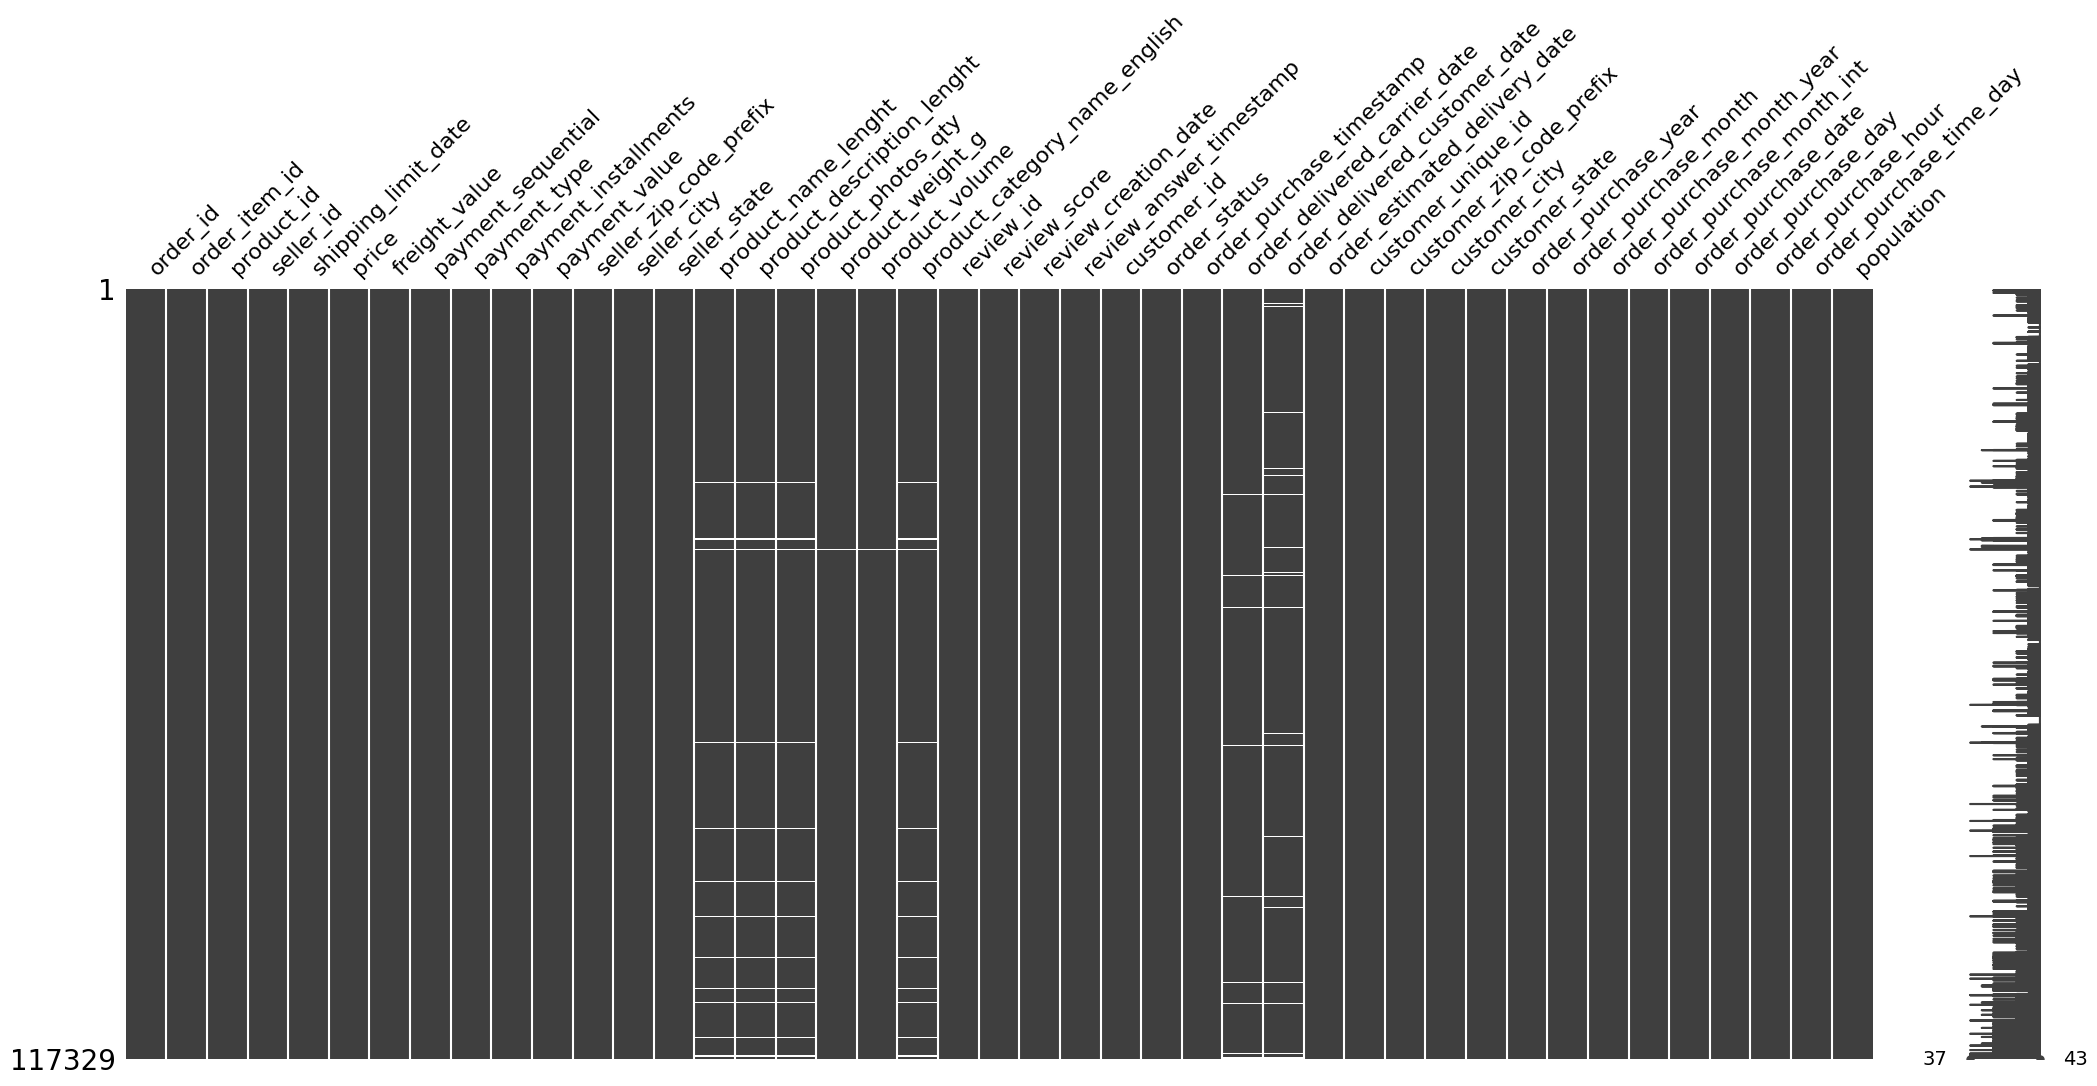

In [67]:
import missingno
missingno.matrix(df)

<Axes: >

<Figure size 1200x1200 with 0 Axes>

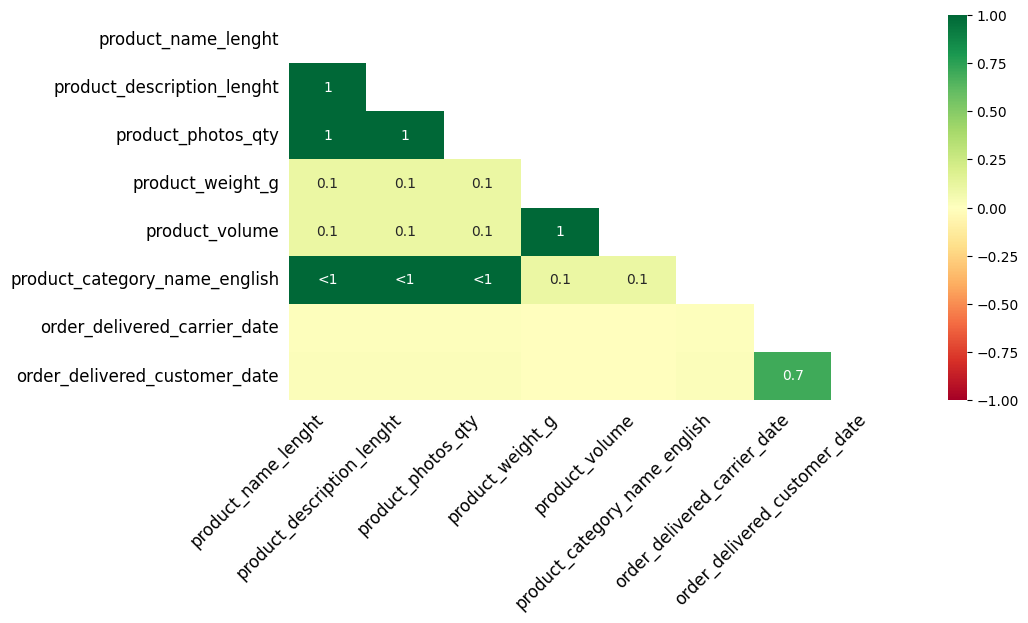

In [68]:
plt.figure(figsize=(12,12))
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

**Insight**:

Dilihat dari heatmap di atas, dapat disimpulkan bahwa missing value dalam dataset ini saling berhubungan, terutama terkait dengan pesanan yang belum sampai atau memiliki status selain delivered. Sebagian besar missing value terutama berkaitan dengan tipe data timestamp.

### **Handling Missing Values**

#### 1. Missing value pada `Kolom Numerik`

Karena data pada kolom numerik tidak terdistribusi normal, kami akan mengisi nilai NaN dengan nilai median pada kolom tersebut.

In [69]:
# Menghitung median dari product_name_lenght 
median_product_name_lenght = df['product_name_lenght'].median()

# Mengisi nilai NaN dengan median
df['product_name_lenght'].fillna(median_product_name_lenght, inplace=True)

In [70]:
# Menghitung median dari product_description_lenght 
median_product_description_lenght = df['product_description_lenght'].median()

# Mengisi nilai NaN dengan median
df['product_description_lenght'].fillna(median_product_description_lenght, inplace=True)

In [71]:
# Menghitung median dari product_photos_qty
median_product_photos_qty = df['product_photos_qty'].median()

# Mengisi nilai NaN dengan median
df['product_photos_qty'].fillna(median_product_photos_qty, inplace=True)

In [72]:
# Menghitung median dari product_weight_g 
median_product_weight_g = df['product_weight_g'].median()

# Mengisi nilai NaN dengan median
df['product_weight_g'].fillna(median_product_weight_g, inplace=True)

In [73]:
# Menghitung median dari product volume 
median_product_volume = df['product_volume'].median()

# Mengisi nilai NaN dengan median
df['product_volume'].fillna(median_product_volume, inplace=True)

#### 2. Missing value pada `product_category_name_english`

Pada `product_category_name_english` kami tidak menemukan pola apapun, artinya missing value terjadi karena data pada kolom tersebut benar-benar hilang. Untuk mengisi nilai NaN, kami memutuskan untuk mengisinya dengan nilai Modus (nilai yang paling sering muncul pada kolom tersebut).

In [74]:
# Menghitung modus dari product_category_name
modus_product_category = df['product_category_name_english'].mode()[0]

# Mengisi nilai NaN dengan modus
df['product_category_name_english'].fillna(modus_product_category, inplace=True)

#### 3. Missing value pada `order_delivered_carrier_date` dengan `order_status delivered`

Pesanan dengan status `delivered` artinya pesanan tersebut telah diterima oleh pelanggan dan seharusnya pesanan tersebut memiliki tanggal dan waktu pengiriman. Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman artinya datanya benar-benar hilang, sehingga kita perlu melakukan drop pada baris tersebut.

In [75]:
delivered_nan_carrier_date = df[(df['order_status'] == 'delivered') & (df['order_delivered_carrier_date'].isna())]
delivered_nan_carrier_date

order_id  order_item_id  \
107854  2d858f451373b04fb5c984a1cc2defaf              1   
113804  2aa91108853cecb43c84a5dc5b277475              1   

                              product_id                         seller_id  \
107854  30b5b5635a79548a48d04162d971848f  f9bbdd976532d50b7816d285a22bd01e   
113804  44c2baf621113fa7ac95fa06b4afbc68  3f2af2670e104d1bcb54022274daeac5   

       shipping_limit_date  price  freight_value  payment_sequential  \
107854 2017-06-04 23:30:16  179.0          15.00                   1   
113804 2017-10-18 10:07:16  179.0          14.98                   1   

       payment_type  payment_installments  payment_value  \
107854  Credit Card                     4         194.00   
113804  Credit Card                     1         193.98   

        seller_zip_code_prefix seller_city seller_state  product_name_lenght  \
107854                    5319   sao paulo    Sao Paulo                 43.0   
113804                   87240   terra boa       Parana                 54.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
107854                      1873.0                 2.0             900.0   
113804                       984.0                 2.0            7000.0   

        product_volume product_category_name_english  \
107854         17576.0                Sports Leisure   
113804         44000.0               Furniture Decor   

                               review_id  review_score review_creation_date  \
107854  4e755f114e50d33b9ac6a56e0d7d3ea9             5           2017-06-25   
113804  e945d1831a3d98008913fc31dcbb804d             5           2017-10-17   

       review_answer_timestamp                       customer_id order_status  \
107854     2017-06-27 01:49:04  e08caf668d499a6d643dafd7c5cc498a    delivered   
113804     2017-10-17 10:56:02  afeb16c7f46396c0ed54acb45ccaaa40    delivered   

       order_purchase_timestamp order_delivered_carrier_date  \
107854      2017-05-25 23:22:43                          NaT   
113804      2017-09-29 08:52:58                          NaT   

       order_delivered_customer_date order_estimated_delivery_date  \
107854                           NaT                    2017-06-23   
113804           2017-11-20 19:44:47                    2017-11-14   

                      customer_unique_id  customer_zip_code_prefix  \
107854  d77cf4be2654aa70ef150f8bfec076a6                     91330   
113804  a2ac81ecc3704410ae240e74d4f0af40                     13334   

       customer_city     customer_state  order_purchase_year  \
107854  Porto Alegre  Rio Grande do Sul                 2017   
113804    Indaiatuba          Sao Paulo                 2017   

       order_purchase_month order_purchase_month_year  \
107854                  May                   2017-05   
113804                  Sep                   2017-09   

        order_purchase_month_int order_purchase_date order_purchase_day  \
107854                         5          2017-05-25                Thu   
113804                         9          2017-09-29                Fri   

        order_purchase_hour order_purchase_time_day  population  
107854                   23            late evening    10882965  
113804                    8                 morning    44411238

Kami menggunakan fungsi df.loc untuk menyeleksi baris NaN, karena kami hanya menghapus baris NaN pada order_delivered_carrier_date berdasarkan kondisi tertentu.

Pada kasus ini, kita menggunakan ~ (not) untuk membalikkan kondisi, sehingga baris yang memenuhi syarat (order_status adalah 'delivered' dan order_delivered_carrier_date adalah NaN) dihapus dari DataFrame.

In [76]:
# dropped missing value

df = df.loc[~((df['order_status'] == 'delivered') & (df['order_delivered_carrier_date'].isna()))]

#### 4. Missing value pada `order_delivered_customer_date` dengan `order_status delivered`

Pesanan dengan status `delivered` artinya pesanan tersebut telah diterima oleh pelanggan dan seharusnya pesanan tersebut memiliki tanggal dan waktu penerimaan pesanan. Jika pesanan tersebut tidak memiliki tanggal dan waktu penerimaan artinya datanya benar-benar hilang, sehingga kita perlu melakukan drop pada baris tersebut.

In [77]:
delivered_nan_customer_date = df[(df['order_status'] == 'delivered') & (df['order_delivered_customer_date'].isna())]
delivered_nan_customer_date

order_id  order_item_id  \
48480   2d1e2d5bf4dc7227b3bfebb81328c15f              1   
83494   2ebdfc4f15f23b91474edf87475f108e              1   
83502   e69f75a717d64fc5ecdfae42b2e8e086              1   
88562   ab7c89dc1bf4a1ead9d6ec1ec8968a84              1   
92773   20edc82cf5400ce95e1afacc25798b31              1   
105930  0d3268bad9b086af767785e3f0fc0133              1   
113264  f5dd62b788049ad9fc0526e3ad11a097              1   

                              product_id                         seller_id  \
48480   a50acd33ba7a8da8e9db65094fa990a4  8581055ce74af1daba164fdbd55a40de   
83494   e7d5464b94c9a5963f7c686fc80145ad  58f1a6197ed863543e0136bdedb3fce2   
83502   e7d5464b94c9a5963f7c686fc80145ad  58f1a6197ed863543e0136bdedb3fce2   
88562   a2a7efc985315e86d4f0f705701b342b  ed4acab38528488b65a9a9c603ff024a   
92773   55bfa0307d7a46bed72c492259921231  343e716476e3748b069f980efbaa294e   
105930  ec165cd31c50585786ffda6feff5d0a6  8bdd8e3fd58bafa48af76b2c5fd71974   
113264  2167c8f6252667c0eb9edd51520706a1  0bb738e4d789e63e2267697c42d35a2d   

       shipping_limit_date   price  freight_value  payment_sequential  \
48480  2017-12-04 17:56:40  117.30          17.53                   1   
83494  2018-07-05 17:15:12  139.00          19.07                   1   
83502  2018-07-05 22:15:14  139.00          19.07                   1   
88562  2018-06-18 12:30:35  110.99           9.13                   1   
92773  2018-07-03 16:29:30   45.90           9.07                   1   
105930 2018-07-05 21:29:54  188.99          15.63                   1   
113264 2018-06-26 07:19:05  329.00          25.24                   1   

       payment_type  payment_installments  payment_value  \
48480   Credit Card                     3         134.83   
83494   Credit Card                     3         158.07   
83502   Credit Card                     1         158.07   
88562   Credit Card                     5         120.12   
92773   Credit Card                     1          54.97   
105930  Credit Card                     4         204.62   
113264   Debit Card                     1         354.24   

        seller_zip_code_prefix           seller_city  seller_state  \
48480                     7112             guarulhos     Sao Paulo   
83494                    36407  conselheiro lafaiete  Minas Gerais   
83502                    36407  conselheiro lafaiete  Minas Gerais   
88562                     8260             sao paulo     Sao Paulo   
92773                    13033              campinas     Sao Paulo   
105930                    1552             sao paulo     Sao Paulo   
113264                   18130             sao roque     Sao Paulo   

        product_name_lenght  product_description_lenght  product_photos_qty  \
48480                  53.0                       555.0                 1.0   
83494                  42.0                       938.0                 5.0   
83502                  42.0                       938.0                 5.0   
88562                  45.0                       837.0                 1.0   
92773                  43.0                       838.0                 1.0   
105930                 12.0                       503.0                 1.0   
113264                 48.0                      1581.0                 1.0   

        product_weight_g  product_volume   product_category_name_english  \
48480             4105.0         44890.0                            Auto   
83494              275.0          3136.0                   Watches Gifts   
83502              275.0          3136.0                   Watches Gifts   
88562             1133.0          4800.0           Computers Accessories   
92773              550.0          6552.0          Books General Interest   
105930             967.0         22977.0                            Toys   
113264            7750.0         33048.0  Industry Commerce And Business   

                               review_id  review_score review_cre

In [78]:
# dropped missing value

df = df.loc[~((df['order_status'] == 'delivered') & (df['order_delivered_customer_date'].isna()))]

#### 5. Missing value pada `order_delivered_carrier_date` dengan `order_status shipped`

Pesanan dengan status `shipped` artinya pesanan tersebut sedang dalam tahap pengiriman oleh penjual dan seharusnya pesanan tersebut memiliki tanggal dan waktu pengiriman pesanan. Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman artinya datanya benar-benar hilang, sehingga kita perlu melakukan drop pada baris tersebut.

In [79]:
shipped_nan_carrier_date = df[(df['order_status'] == 'shipped') & (df['order_delivered_carrier_date'].isna())]
shipped_nan_carrier_date

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, payment_sequential, payment_type, payment_installments, payment_value, seller_zip_code_prefix, seller_city, seller_state, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_volume, product_category_name_english, review_id, review_score, review_creation_date, review_answer_timestamp, customer_id, order_status, order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_purchase_year, order_purchase_month, order_purchase_month_year, order_purchase_month_int, order_purchase_date, order_purchase_day, order_purchase_hour, order_purchase_time_day, population]
Index: []

Terlihat pada tabel diatas, bahwa tidak ada baris yang memiliki missing value.

#### 6. Missing value pada `order_delivered_customer_date` dengan `order_status shipped`

Pesanan dengan status `shipped` artinya pesanan tersebut sedang dalam tahap pengiriman, namun belum sampai ketangan pelanggan. Jika terdapat missing value pada kolom `order_delivered_customer_date` hal tersebut sangat wajar karena memang pesanan belum diterima oleh pelanggan. Sehingga nilai missing value akan kami isi dengan nilai perkiraan pesanan akan tiba `(order_estimated_delivery_date)`.

In [80]:
shipped_nan_customer_date = df[(df['order_status'] == 'shipped') & (df['order_delivered_customer_date'].isna())]
shipped_nan_customer_date

order_id  order_item_id  \
18      bf3b217e5505e5e9d746120dbb93b562              1   
212     088683f795a3d30bfd61152c4fabdfb2              1   
393     ed2f80d07bcb176e6097b0a730d3d53d              1   
401     2df094c40051a8f5ed95344421039ced              1   
630     42a7750bca23818abc83ea9c3298eace              1   
...                                  ...            ...   
116128  d190601c7afe54080287732ad2b95941              1   
116733  907057c26859398070400de963028855              1   
116772  94b85615d0bf9757c6a3b1a20be1a9cf              1   
117236  dd0e00343af091774fc1399707418777              1   
117299  f73b31435ce6dec43df056154c39a1ce              1   

                              product_id                         seller_id  \
18      ec02a5d380128f7a188e9ce8f3ddd832  48436dade18ac8b2bce089ec2a041202   
212     86742dc5c815f1c8c04c6e323e3c1865  dd7ddc04e1b6c2c614352b383efe2d36   
393     ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
401     1c2862e8f831c73dd953c24b3fd5b9e2  df560393f3a51e74553ab94004ba5c87   
630     2b104f2d1b2c3cc5a0cc98c1212e29c9  7040e82f899a04d1b434b795a43b4617   
...                                  ...                               ...   
116128  00cf06147ed4880ec5fbba2adbb20e1d  15ead3a5037a918ddb520dfe39a3d2b9   
116733  e987172c2818cc16b2555bc130ac5fac  578460d8319c51dab351cd9db95eadfe   
116772  0c08876047d07cc4448ba14159a454e7  20d53aad4fe5ee93a64f8839609d3586   
117236  6a944207f516a3e570fb1205489438bf  83d458c0d6d4f94295d63f091460bd60   
117299  5ece1e51ece4648de249ec6e9d007fd6  da4d149c0ddbac90557103ac0a0ec356   

       shipping_limit_date  price  freight_value  payment_sequential  \
18     2017-08-30 07:25:13  132.9          18.18                   1   
212    2017-07-20 02:25:54   29.9          16.92                   1   
393    2017-05-11 12:36:20  199.9          19.99                   1   
401    2017-03-17 18:44:18   31.5          16.05                   1   
630    2018-06-20 17:25:59   34.9           8.99                   1   
...                    ...    ...            ...                 ...   
116128 2018-04-12 08:50:15   21.0          18.23                   1   
116733 2017-08-25 15:15:10  235.0          35.45                   1   
116772 2018-05-16 09:30:52   37.4          22.06                   1   
117236 2017-03-15 04:25:28   89.9          15.84                   1   
117299 2018-08-24 15:34:56  730.0          45.98                   1   

       payment_type  payment_installments  payment_value  \
18      Credit Card                     4         151.08   
212          Boleto                     1          46.82   
393          Boleto                     1         219.89   
401     Credit Card                     2          47.55   
630      Debit Card                     1          43.89   
...             ...                   ...            ...   
116128  Credit Card                     1          39.23   
116733  Credit Card                     1         270.45   
116772  Credit Card                     3          59.46   
117236       Boleto                     1         105.74   
117299  Credit Card                    10         775.98   

        seller_zip_code_prefix            seller_city  seller_state  \
18                       27277          volta redonda     Sao Paulo   
212                       3471              sao paulo     Sao Paulo   
393                      87900                 loanda        Parana   
401                      87900                 loanda        Parana   
630                       1026              sao paulo     Sao Paulo   
...                        ...                    ...           ...   
116128                   36401   conselheiro lafaiete  Minas Gerais   
116733                   74550                goiania         Goias   
116772                   37540  santa rita do sapucai  Minas Gerais   
117236                   29101             vila velha     Sao Paulo   
117299             

In [81]:
# Mengganti nilai NaN pada kolom order_delivered_customer_date menjadi nilai yang ada pada order_estimated_delivery_date
mask = (df['order_status'] == 'shipped') & (df['order_delivered_customer_date'].isna())
df.loc[mask, 'order_delivered_customer_date'] = df.loc[mask, 'order_estimated_delivery_date']

#### 7. Missing value pada `order_delivered_carrier_date` dan `order_delivered_customer_date` dengan `order_status canceled`

Pesanan dengan status `canceled` artinya pesanan tersebut telah dibatalkan oleh pelanggan, Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman serta tanggal dan waktu penerimaan pesanan, hal tersebut sangat wajar karena pesanan tidak jadi dikirim oleh penjual. Sehingga kita perlu melakukan drop pada baris tersebut.

In [82]:
cancel_nan_carrier_date = df[(df['order_status'] == 'canceled') & (df['order_delivered_carrier_date'].isna())]
cancel_nan_carrier_date

order_id  order_item_id  \
495     eb79d602c28b8782807ca17e4ba806cc              1   
665     7106ae47c0242d76f336f5430d3ae0fc              1   
666     7106ae47c0242d76f336f5430d3ae0fc              2   
679     7ef8671acf9060d60ac3eb8616a99627              1   
784     29b81e2d5bebb9616041efb0ebbc931d              1   
...                                  ...            ...   
117235  dccb282b858f9b481824964de4cda528              1   
117251  e20f1823b7c3cea563148b3d9864132f              1   
117252  e20f1823b7c3cea563148b3d9864132f              1   
117296  f5f8998eee8ec7bc513dc52847d64ce0              1   
117301  f7dca277a6bb273200598f0e36319d94              1   

                              product_id                         seller_id  \
495     7c4a8bec217df1de0df2b5aaf8175b65  7040e82f899a04d1b434b795a43b4617   
665     0f24b7516c5b67c9c686848db9759d88  7040e82f899a04d1b434b795a43b4617   
666     0f24b7516c5b67c9c686848db9759d88  7040e82f899a04d1b434b795a43b4617   
679     1ec5253cf0b6d3a31b822770cfa139b5  7040e82f899a04d1b434b795a43b4617   
784     2dc0d95288983b8c91627bab326284ae  a416b6a846a11724393025641d4edd5e   
...                                  ...                               ...   
117235  3799649bfcc7821635d757a711ae7357  86649b1632b1c0e6c0bcb2c90a8b75d8   
117251  2804f6c4f96a5c917461534b63faf357  fa18c782a4866d313cadab567097f8f1   
117252  2804f6c4f96a5c917461534b63faf357  fa18c782a4866d313cadab567097f8f1   
117296  51bd37bb8517d5bfdb1f54c11fb01d27  f09e26011d833ddab11593c1a097a92a   
117301  ad30079acfcea22be08f603414dbc0fe  2078fe5066350e7d220c0ad3a3bbc6c1   

       shipping_limit_date   price  freight_value  payment_sequential  \
495    2017-10-31 02:26:16   19.90           7.78                   1   
665    2017-12-19 13:11:58  119.90           9.03                   1   
666    2017-12-19 13:11:58  119.90           9.03                   1   
679    2018-06-24 23:57:01  229.90          59.69                   1   
784    2018-07-27 15:50:18   96.35          13.97                   1   
...                    ...     ...            ...                 ...   
117235 2017-09-04 04:26:12   59.99          17.67                   1   
117251 2017-05-23 22:25:13   58.99          19.65                   2   
117252 2017-05-23 22:25:13   58.99          19.65                   1   
117296 2018-03-08 12:20:32   79.90          22.19                   1   
117301 2018-04-04 03:15:23   29.90          38.14                   1   

       payment_type  payment_installments  payment_value  \
495          Boleto                     1          27.68   
665     Credit Card                     1         257.86   
666     Credit Card                     1         257.86   
679     Credit Card                     8         289.59   
784     Credit Card                     5         110.32   
...             ...                   ...            ...   
117235       Boleto                     1          77.66   
117251      Voucher                     1          61.98   
117252  Credit Card                     1          16.66   
117296  Credit Card                     2         102.09   
117301       Boleto                     1          68.04   

        seller_zip_code_prefix     seller_city  seller_state  \
495                       1026       sao paulo     Sao Paulo   
665                       1026       sao paulo     Sao Paulo   
666                       1026       sao paulo     Sao Paulo   
679                       1026       sao paulo     Sao Paulo   
784                       3702       sao paulo     Sao Paulo   
...                        ...             ...           ...   
117235                   85884      medianeira        Parana   
117251                   31535  belo horizonte  Minas Gerais   
117252                   31535  belo horizonte  Minas Gerais   
117296                   13632    pirassununga     Sao Paulo   
117301                   86707       arapongas        Parana   

        product_nam

In [83]:
cancel_nan_customer_date = df[(df['order_status'] == 'canceled') & (df['order_delivered_customer_date'].isna())]
cancel_nan_customer_date

order_id  order_item_id  \
495     eb79d602c28b8782807ca17e4ba806cc              1   
665     7106ae47c0242d76f336f5430d3ae0fc              1   
666     7106ae47c0242d76f336f5430d3ae0fc              2   
679     7ef8671acf9060d60ac3eb8616a99627              1   
784     29b81e2d5bebb9616041efb0ebbc931d              1   
...                                  ...            ...   
117235  dccb282b858f9b481824964de4cda528              1   
117251  e20f1823b7c3cea563148b3d9864132f              1   
117252  e20f1823b7c3cea563148b3d9864132f              1   
117296  f5f8998eee8ec7bc513dc52847d64ce0              1   
117301  f7dca277a6bb273200598f0e36319d94              1   

                              product_id                         seller_id  \
495     7c4a8bec217df1de0df2b5aaf8175b65  7040e82f899a04d1b434b795a43b4617   
665     0f24b7516c5b67c9c686848db9759d88  7040e82f899a04d1b434b795a43b4617   
666     0f24b7516c5b67c9c686848db9759d88  7040e82f899a04d1b434b795a43b4617   
679     1ec5253cf0b6d3a31b822770cfa139b5  7040e82f899a04d1b434b795a43b4617   
784     2dc0d95288983b8c91627bab326284ae  a416b6a846a11724393025641d4edd5e   
...                                  ...                               ...   
117235  3799649bfcc7821635d757a711ae7357  86649b1632b1c0e6c0bcb2c90a8b75d8   
117251  2804f6c4f96a5c917461534b63faf357  fa18c782a4866d313cadab567097f8f1   
117252  2804f6c4f96a5c917461534b63faf357  fa18c782a4866d313cadab567097f8f1   
117296  51bd37bb8517d5bfdb1f54c11fb01d27  f09e26011d833ddab11593c1a097a92a   
117301  ad30079acfcea22be08f603414dbc0fe  2078fe5066350e7d220c0ad3a3bbc6c1   

       shipping_limit_date   price  freight_value  payment_sequential  \
495    2017-10-31 02:26:16   19.90           7.78                   1   
665    2017-12-19 13:11:58  119.90           9.03                   1   
666    2017-12-19 13:11:58  119.90           9.03                   1   
679    2018-06-24 23:57:01  229.90          59.69                   1   
784    2018-07-27 15:50:18   96.35          13.97                   1   
...                    ...     ...            ...                 ...   
117235 2017-09-04 04:26:12   59.99          17.67                   1   
117251 2017-05-23 22:25:13   58.99          19.65                   2   
117252 2017-05-23 22:25:13   58.99          19.65                   1   
117296 2018-03-08 12:20:32   79.90          22.19                   1   
117301 2018-04-04 03:15:23   29.90          38.14                   1   

       payment_type  payment_installments  payment_value  \
495          Boleto                     1          27.68   
665     Credit Card                     1         257.86   
666     Credit Card                     1         257.86   
679     Credit Card                     8         289.59   
784     Credit Card                     5         110.32   
...             ...                   ...            ...   
117235       Boleto                     1          77.66   
117251      Voucher                     1          61.98   
117252  Credit Card                     1          16.66   
117296  Credit Card                     2         102.09   
117301       Boleto                     1          68.04   

        seller_zip_code_prefix     seller_city  seller_state  \
495                       1026       sao paulo     Sao Paulo   
665                       1026       sao paulo     Sao Paulo   
666                       1026       sao paulo     Sao Paulo   
679                       1026       sao paulo     Sao Paulo   
784                       3702       sao paulo     Sao Paulo   
...                        ...             ...           ...   
117235                   85884      medianeira        Parana   
117251                   31535  belo horizonte  Minas Gerais   
117252                   31535  belo horizonte  Minas Gerais   
117296                   13632    pirassununga     Sao Paulo   
117301                   86707       arapongas        Parana   

        product_nam

In [84]:
# dropped missing value

df = df[df['order_status'] != 'canceled']

#### 8. Missing value pada `order_delivered_carrier_date` dengan `order_status invoiced`

Pesanan dengan status `invoiced` artinya pesanan tersebut sedang dalam proses pembayaran oleh pelanggan, Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman, hal tersebut sangat wajar karena pesanan memang belum dikirim oleh penjual. Sehingga untuk mengisi nilai NaN, kami akan mengisi dengan nilai rata-rata antara waktu pembelian dan waktu pesanan dikirim oleh penjual.

In [85]:
invoiced_nan_carrier_date = df[(df['order_status'] == 'invoiced') & (df['order_delivered_carrier_date'].isna())]
invoiced_nan_carrier_date

order_id  order_item_id  \
57      1856dd06ccd053bf3456e3d5bf73f2e3              1   
149     8e78a66489b3861f846342d4b158c8f4              1   
185     afef48d3c8a0b1b7c9b7f8f922fb5674              1   
1315    1a3ccc1695931b2cb7a95065e0c81e4b              2   
1316    1a3ccc1695931b2cb7a95065e0c81e4b              2   
...                                  ...            ...   
117151  c894fad29c885c81201d9bdd80cd68c5              2   
117152  c894fad29c885c81201d9bdd80cd68c5              3   
117153  c894fad29c885c81201d9bdd80cd68c5              4   
117154  c894fad29c885c81201d9bdd80cd68c5              5   
117169  d7254b8b021b5a531c35571bdc25abeb              1   

                              product_id                         seller_id  \
57      54e5939fcd9ae70ad0f59f612d6d29bd  48436dade18ac8b2bce089ec2a041202   
149     2423252b2432f1803e4f29e0974c6cf7  48436dade18ac8b2bce089ec2a041202   
185     31945c8811d04df20bf86224210b4084  48436dade18ac8b2bce089ec2a041202   
1315    2b4609f8948be18874494203496bc318  cc419e0650a3c5ba77189a1882b7556a   
1316    2b4609f8948be18874494203496bc318  cc419e0650a3c5ba77189a1882b7556a   
...                                  ...                               ...   
117151  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117152  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117153  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117154  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117169  8fbf9021a217075b130d33b3485e8fb3  eb4a59a06b3948e851a7d7a830bcbc42   

       shipping_limit_date   price  freight_value  payment_sequential  \
57     2017-10-05 20:23:08   42.90          16.11                   1   
149    2017-10-09 19:14:27  139.90          18.23                   1   
185    2017-11-17 16:50:47  134.90          18.51                   1   
1315   2017-10-26 02:56:40   89.99          22.22                   1   
1316   2017-10-26 02:56:40   89.99          22.22                   1   
...                    ...     ...            ...                 ...   
117151 2017-12-26 09:51:49   41.33           9.34                   1   
117152 2017-12-26 09:51:49   41.33           9.34                   1   
117153 2017-12-26 09:51:49   41.33           9.34                   1   
117154 2017-12-26 09:51:49   41.33           9.34                   1   
117169 2018-05-18 15:30:49   32.00          22.85                   1   

       payment_type  payment_installments  payment_value  \
57      Credit Card                     2          59.01   
149     Credit Card                     2         158.13   
185     Credit Card                     5         153.41   
1315         Boleto                     1         156.46   
1316         Boleto                     1         156.46   
...             ...                   ...            ...   
117151       Boleto                     1         253.35   
117152       Boleto                     1         253.35   
117153       Boleto                     1         253.35   
117154       Boleto                     1         253.35   
117169  Credit Card                     2          54.85   

        seller_zip_code_prefix    seller_city seller_state  \
57                       27277  volta redonda    Sao Paulo   
149                      27277  volta redonda    Sao Paulo   
185                      27277  volta redonda    Sao Paulo   
1315                      9015    santo andre    Sao Paulo   
1316                      9015    santo andre    Sao Paulo   
...                        ...            ...          ...   
117151                    6033         osasco    Sao Paulo   
117152                    6033         osasco    Sao Paulo   
117153                    6033         osasco    Sao Paulo   
117154                    6033         osasco    Sao Paulo   
117169                   41820       salvador        Bahia   

        product_name_lenght  product_descri

In [86]:
# Hitung selisih waktu antara order_delivered_carrier_date dan order_purchase_timestime
df['delivery_carrier_time'] = df['order_delivered_carrier_date'] - df['order_purchase_timestamp']

# Hitung rata-rata waktu pesanan akan dikirim
mean_delivery_carrier_time = df['delivery_carrier_time'].mean()

print("\nRata-rata waktu pesanan akan dikirim:", mean_delivery_carrier_time)


Rata-rata waktu pesanan akan dikirim: 3 days 06:49:54.186041700


In [87]:
# Mengganti nilai NaN pada kolom order_delivered_carrier_date dengan mean_delivery_carrier_time
mask = (df['order_status'] == 'invoiced') & (df['order_delivered_carrier_date'].isna())
df.loc[mask, 'order_delivered_carrier_date'] = df.loc[mask, 'order_purchase_timestamp'] + mean_delivery_carrier_time

#### 9. Missing value pada `order_delivered_customer_date` dengan `order_status invoiced`

Pesanan dengan status `invoiced` artinya pesanan tersebut sedang dalam proses pembayaran oleh pelanggan, Jika pesanan tersebut tidak memiliki tanggal dan waktu penerimaan pesanan, hal tersebut sangat wajar karena pesanan memang belum dikirim oleh penjual. Sehingga untuk mengisi nilai NaN, kami akan mengisi dengan nilai rata-rata antara waktu pembelian dan waktu pesanan diterima oleh penjual.

In [88]:
invoiced_nan_customer_date = df[(df['order_status'] == 'invoiced') & (df['order_delivered_customer_date'].isna())]
invoiced_nan_customer_date

order_id  order_item_id  \
57      1856dd06ccd053bf3456e3d5bf73f2e3              1   
149     8e78a66489b3861f846342d4b158c8f4              1   
185     afef48d3c8a0b1b7c9b7f8f922fb5674              1   
1315    1a3ccc1695931b2cb7a95065e0c81e4b              2   
1316    1a3ccc1695931b2cb7a95065e0c81e4b              2   
...                                  ...            ...   
117151  c894fad29c885c81201d9bdd80cd68c5              2   
117152  c894fad29c885c81201d9bdd80cd68c5              3   
117153  c894fad29c885c81201d9bdd80cd68c5              4   
117154  c894fad29c885c81201d9bdd80cd68c5              5   
117169  d7254b8b021b5a531c35571bdc25abeb              1   

                              product_id                         seller_id  \
57      54e5939fcd9ae70ad0f59f612d6d29bd  48436dade18ac8b2bce089ec2a041202   
149     2423252b2432f1803e4f29e0974c6cf7  48436dade18ac8b2bce089ec2a041202   
185     31945c8811d04df20bf86224210b4084  48436dade18ac8b2bce089ec2a041202   
1315    2b4609f8948be18874494203496bc318  cc419e0650a3c5ba77189a1882b7556a   
1316    2b4609f8948be18874494203496bc318  cc419e0650a3c5ba77189a1882b7556a   
...                                  ...                               ...   
117151  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117152  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117153  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117154  0c40401eba358c9ef2ff2df80b6eab52  3bfad056cf05c00dabe2f895925d83b1   
117169  8fbf9021a217075b130d33b3485e8fb3  eb4a59a06b3948e851a7d7a830bcbc42   

       shipping_limit_date   price  freight_value  payment_sequential  \
57     2017-10-05 20:23:08   42.90          16.11                   1   
149    2017-10-09 19:14:27  139.90          18.23                   1   
185    2017-11-17 16:50:47  134.90          18.51                   1   
1315   2017-10-26 02:56:40   89.99          22.22                   1   
1316   2017-10-26 02:56:40   89.99          22.22                   1   
...                    ...     ...            ...                 ...   
117151 2017-12-26 09:51:49   41.33           9.34                   1   
117152 2017-12-26 09:51:49   41.33           9.34                   1   
117153 2017-12-26 09:51:49   41.33           9.34                   1   
117154 2017-12-26 09:51:49   41.33           9.34                   1   
117169 2018-05-18 15:30:49   32.00          22.85                   1   

       payment_type  payment_installments  payment_value  \
57      Credit Card                     2          59.01   
149     Credit Card                     2         158.13   
185     Credit Card                     5         153.41   
1315         Boleto                     1         156.46   
1316         Boleto                     1         156.46   
...             ...                   ...            ...   
117151       Boleto                     1         253.35   
117152       Boleto                     1         253.35   
117153       Boleto                     1         253.35   
117154       Boleto                     1         253.35   
117169  Credit Card                     2          54.85   

        seller_zip_code_prefix    seller_city seller_state  \
57                       27277  volta redonda    Sao Paulo   
149                      27277  volta redonda    Sao Paulo   
185                      27277  volta redonda    Sao Paulo   
1315                      9015    santo andre    Sao Paulo   
1316                      9015    santo andre    Sao Paulo   
...                        ...            ...          ...   
117151                    6033         osasco    Sao Paulo   
117152                    6033         osasco    Sao Paulo   
117153                    6033         osasco    Sao Paulo   
117154                    6033         osasco    Sao Paulo   
117169                   41820       salvador        Bahia   

        product_name_lenght  product_descri

In [89]:
# Hitung selisih waktu antara order_delivered_customer_date dan order_purchase_timestime
df['delivery_customer_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

# Hitung rata-rata waktu pesanan akan diterima oleh pelanggan
mean_delivery_customer_time = df['delivery_customer_time'].mean()

print("\nRata-rata waktu pesanan akan diterima pelanggan:", mean_delivery_customer_time)



Rata-rata waktu pesanan akan diterima pelanggan: 12 days 13:45:19.330537765


In [90]:
# Mengganti nilai NaN pada kolom order_delivered_customer_date dengan mean_delivery_customer_time
mask = (df['order_status'] == 'invoiced') & (df['order_delivered_customer_date'].isna())
df.loc[mask, 'order_delivered_customer_date'] = df.loc[mask, 'order_purchase_timestamp'] + mean_delivery_customer_time

#### 10. Missing value pada `order_delivered_carrier_date` dengan `order_status processing`

Pesanan dengan status `processing` artinya pesanan tersebut sedang dalam tahap pemprosessan oleh penjual, Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman, hal tersebut sangat wajar karena pesanan memang belum dikirim oleh penjual. Sehingga untuk mengisi nilai NaN, kami akan mengisi dengan nilai rata-rata antara waktu pembelian dan waktu pesanan dikirim oleh penjual.

In [91]:
processing_nan_carrier_date = df[(df['order_status'] == 'processing') & (df['order_delivered_carrier_date'].isna())]
processing_nan_carrier_date

order_id  order_item_id  \
169     ea6c1bccedd9137975bff2495dfd90ae              1   
7315    34d3825176b5e4ae141843ed4e313c7d              1   
7316    34d3825176b5e4ae141843ed4e313c7d              1   
7349    d233c4818e81c8e59a0b974210ae88a7              1   
8121    36543b4a82c2c12ec60edfe8b5f67e3c              1   
...                                  ...            ...   
117316  fc3078fa5d882e59237a658341f57738              2   
117317  fc32248629afaea92d59f7086de552d3              1   
117318  fc32248629afaea92d59f7086de552d3              2   
117319  fc32248629afaea92d59f7086de552d3              3   
117320  fc8a4fcbc1b484046b9ff15de7c73577              1   

                              product_id                         seller_id  \
169     2423252b2432f1803e4f29e0974c6cf7  05f51e13da97139648b8125c31e5f51b   
7315    54668f8d7fb456c8977d5ca817dab50c  530ec6109d11eaaf87999465c6afee01   
7316    54668f8d7fb456c8977d5ca817dab50c  530ec6109d11eaaf87999465c6afee01   
7349    c34a95f3587a27afcfdc7b4ba554ce37  530ec6109d11eaaf87999465c6afee01   
8121    6ab41d7f15e7af9d6c7cd912055acc1a  a2e85714b56b1cb6bb24a9a6e6cad36f   
...                                  ...                               ...   
117316  b5d652cabeb01249ad1cf910eef3230b  b57e8460909fa137df7951b4a3b5ea84   
117317  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117318  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117319  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117320  86133a7d6682fcb51debce06e6514f93  101921376b577a4540dc30e9009133ca   

       shipping_limit_date  price  freight_value  payment_sequential  \
169    2018-01-31 17:16:27  164.9          13.28                   1   
7315   2017-10-05 12:07:21   91.9          16.40                   1   
7316   2017-10-05 12:07:21   91.9          16.40                   2   
7349   2017-10-03 03:05:58   79.9          15.31                   1   
8121   2017-11-06 15:06:50  114.9          18.46                   1   
...                    ...    ...            ...                 ...   
117316 2017-03-08 08:05:18   99.0          42.07                   1   
117317 2017-11-28 02:46:53   49.9           8.72                   1   
117318 2017-11-28 02:46:53   49.9           8.72                   1   
117319 2017-11-28 02:46:53   49.9           8.72                   1   
117320 2017-06-26 03:55:21  373.0          21.49                   1   

       payment_type  payment_installments  payment_value  \
169     Credit Card                     2         178.18   
7315    Credit Card                     1          10.61   
7316        Voucher                     1          97.69   
7349         Boleto                     1          95.21   
8121    Credit Card                     1         252.40   
...             ...                   ...            ...   
117316  Credit Card                     1         282.14   
117317       Boleto                     1         175.86   
117318       Boleto                     1         175.86   
117319       Boleto                     1         175.86   
117320       Boleto                     1         394.49   

        seller_zip_code_prefix     seller_city       seller_state  \
169                      31910  belo horizonte       Minas Gerais   
7315                     85807        cascavel             Parana   
7316                     85807        cascavel             Parana   
7349                     85807        cascavel             Parana   
8121                     14530    miguelopolis          Sao Paulo   
...                        ...             ...                ...   
117316                   90640    porto alegre  Rio Grande do Sul   
117317                    4276       sao paulo          Sao Paulo   
117318                    4276       sao paulo          Sao Paulo   
117319                    4276       sao paulo          Sao Paulo   
117320                   13505       rio 

In [92]:
# Hitung selisih waktu antara order_delivered_carrier_date dan order_purchase_timestime
df['delivery_carrier_time'] = df['order_delivered_carrier_date'] - df['order_purchase_timestamp']

# Hitung rata-rata waktu pesanan akan dikirim
mean_delivery_carrier_time = df['delivery_carrier_time'].mean()

print("\nRata-rata waktu pesanan akan dikirim:", mean_delivery_carrier_time)


Rata-rata waktu pesanan akan dikirim: 3 days 06:49:54.186041700


In [93]:
# Mengganti nilai NaN pada kolom order_delivered_carrier_date dengan mean_delivery_carrier_time
mask = (df['order_status'] == 'processing') & (df['order_delivered_carrier_date'].isna())
df.loc[mask, 'order_delivered_carrier_date'] = df.loc[mask, 'order_purchase_timestamp'] + mean_delivery_carrier_time

#### 11. Missing value pada `order_delivered_customer_date` dengan `order_status processing`

Pesanan dengan status `processing` artinya pesanan tersebut sedang dalam tahap pemprosessan oleh penjual, Jika pesanan tersebut tidak memiliki tanggal dan waktu penerimaan pesanan, hal tersebut sangat wajar karena pesanan memang belum dikirim oleh penjual. Sehingga untuk mengisi nilai NaN, kami akan mengisi dengan nilai rata-rata antara waktu pembelian dan waktu pesanan diterima oleh penjual.

In [94]:
processing_nan_customer_date = df[(df['order_status'] == 'processing') & (df['order_delivered_customer_date'].isna())]
processing_nan_customer_date

order_id  order_item_id  \
169     ea6c1bccedd9137975bff2495dfd90ae              1   
7315    34d3825176b5e4ae141843ed4e313c7d              1   
7316    34d3825176b5e4ae141843ed4e313c7d              1   
7349    d233c4818e81c8e59a0b974210ae88a7              1   
8121    36543b4a82c2c12ec60edfe8b5f67e3c              1   
...                                  ...            ...   
117316  fc3078fa5d882e59237a658341f57738              2   
117317  fc32248629afaea92d59f7086de552d3              1   
117318  fc32248629afaea92d59f7086de552d3              2   
117319  fc32248629afaea92d59f7086de552d3              3   
117320  fc8a4fcbc1b484046b9ff15de7c73577              1   

                              product_id                         seller_id  \
169     2423252b2432f1803e4f29e0974c6cf7  05f51e13da97139648b8125c31e5f51b   
7315    54668f8d7fb456c8977d5ca817dab50c  530ec6109d11eaaf87999465c6afee01   
7316    54668f8d7fb456c8977d5ca817dab50c  530ec6109d11eaaf87999465c6afee01   
7349    c34a95f3587a27afcfdc7b4ba554ce37  530ec6109d11eaaf87999465c6afee01   
8121    6ab41d7f15e7af9d6c7cd912055acc1a  a2e85714b56b1cb6bb24a9a6e6cad36f   
...                                  ...                               ...   
117316  b5d652cabeb01249ad1cf910eef3230b  b57e8460909fa137df7951b4a3b5ea84   
117317  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117318  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117319  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117320  86133a7d6682fcb51debce06e6514f93  101921376b577a4540dc30e9009133ca   

       shipping_limit_date  price  freight_value  payment_sequential  \
169    2018-01-31 17:16:27  164.9          13.28                   1   
7315   2017-10-05 12:07:21   91.9          16.40                   1   
7316   2017-10-05 12:07:21   91.9          16.40                   2   
7349   2017-10-03 03:05:58   79.9          15.31                   1   
8121   2017-11-06 15:06:50  114.9          18.46                   1   
...                    ...    ...            ...                 ...   
117316 2017-03-08 08:05:18   99.0          42.07                   1   
117317 2017-11-28 02:46:53   49.9           8.72                   1   
117318 2017-11-28 02:46:53   49.9           8.72                   1   
117319 2017-11-28 02:46:53   49.9           8.72                   1   
117320 2017-06-26 03:55:21  373.0          21.49                   1   

       payment_type  payment_installments  payment_value  \
169     Credit Card                     2         178.18   
7315    Credit Card                     1          10.61   
7316        Voucher                     1          97.69   
7349         Boleto                     1          95.21   
8121    Credit Card                     1         252.40   
...             ...                   ...            ...   
117316  Credit Card                     1         282.14   
117317       Boleto                     1         175.86   
117318       Boleto                     1         175.86   
117319       Boleto                     1         175.86   
117320       Boleto                     1         394.49   

        seller_zip_code_prefix     seller_city       seller_state  \
169                      31910  belo horizonte       Minas Gerais   
7315                     85807        cascavel             Parana   
7316                     85807        cascavel             Parana   
7349                     85807        cascavel             Parana   
8121                     14530    miguelopolis          Sao Paulo   
...                        ...             ...                ...   
117316                   90640    porto alegre  Rio Grande do Sul   
117317                    4276       sao paulo          Sao Paulo   
117318                    4276       sao paulo          Sao Paulo   
117319                    4276       sao paulo          Sao Paulo   
117320                   13505       rio 

In [95]:
# Hitung selisih waktu antara order_delivered_customer_date dan order_purchase_timestime
df['delivery_customer_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

# Hitung rata-rata waktu pesanan akan diterima oleh pelanggan
mean_delivery_customer_time = df['delivery_customer_time'].mean()

print("\nRata-rata waktu pesanan akan diterima pelanggan:", mean_delivery_customer_time)


Rata-rata waktu pesanan akan diterima pelanggan: 12 days 13:45:19.330537765


In [96]:
# Mengganti nilai NaN pada kolom order_delivered_customer_date dengan mean_delivery_customer_time
mask = (df['order_status'] == 'processing') & (df['order_delivered_customer_date'].isna())
df.loc[mask, 'order_delivered_customer_date'] = df.loc[mask, 'order_purchase_timestamp'] + mean_delivery_customer_time

#### 12. Missing value pada `order_delivered_carrier_date` dengan `order_status unavailable`

Pesanan dengan status `unavailable` artinya pesanan tersebut tidak tersedia. Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman, hal tersebut sangat wajar karena memang tidak ada pesanan yang dikirim, sehingga kita perlu melakukan drop pada baris tersebut.

In [97]:
unavailable_nan_carrier_date = df[(df['order_status'] == 'unavailable') & (df['order_delivered_carrier_date'].isna())]
unavailable_nan_carrier_date

order_id  order_item_id  \
36174   1a47da1d66c70489c8e35fe2b5433ab7              1   
36602   4dd47e84e6b8ff4a63d0b8425e6d788e              1   
114321  2fd1c83dd4714cf3cf796fffb6c8de62              1   
114322  2fd1c83dd4714cf3cf796fffb6c8de62              2   
115035  3c3ca08854ca922fe8e9cedfd6841c8a              1   
115840  54bb06e1ca86bd99ee2a8d6288bf4ede              1   
117233  dc18a044b56ed174037ca164cdf2e921              1   

                              product_id                         seller_id  \
36174   eba7488e1c67729f045ab43fac426f2e  620c87c171fb2a6dd6e8bb4dec959fc6   
36602   2aa489c905e1d41d8c716a6d6912d8c2  620c87c171fb2a6dd6e8bb4dec959fc6   
114321  17c7ec33a1657924ad493e6978b4bf91  3d01d1c414c44b5943a09619ff3853cb   
114322  966a067b38634929844120e39b1576bc  61f159ef6da2d441951d2c0efa719362   
115035  ac6c24af9f913c9375a3ea77883bda6e  5206cc4bc2297c833e6061c49bf9c43f   
115840  bef13288a0f8b26d763411ced1dfa268  cf281cf8b7affbdfe751b29cc85580e1   
117233  faa268ecc8a8434cb4ebee091b3222d6  f0563bacf40c311f1c4d3d6b67b8a7a7   

       shipping_limit_date    price  freight_value  payment_sequential  \
36174  2016-10-11 18:53:48   249.90          20.85                   1   
36602  2016-10-11 01:09:09   299.90          13.68                   1   
114321 2016-10-10 15:55:42    99.00           9.12                   1   
114322 2016-10-10 15:55:41    59.99          24.08                   1   
115035 2016-10-12 13:21:35    35.00          10.96                   1   
115840 2016-10-29 09:43:46    64.90          25.33                   1   
117233 2016-10-21 16:18:52  1199.00          28.78                   1   

       payment_type  payment_installments  payment_value  \
36174   Credit Card                     5         270.75   
36602   Credit Card                     2         313.58   
114321  Credit Card                     7         192.19   
114322  Credit Card                     7         192.19   
115035  Credit Card                     3          45.96   
115840  Credit Card                     1          90.23   
117233  Credit Card                    10        1227.78   

        seller_zip_code_prefix seller_city    seller_state  \
36174                    25645  petropolis  Rio de Janeiro   
36602                    25645  petropolis  Rio de Janeiro   
114321                   13040    campinas       Sao Paulo   
114322                   29160       serra  Espirito Santo   
115035                    6192      osasco       Sao Paulo   
115840                   61760     eusebio           Ceara   
117233                   88704     tubarao  Santa Catarina   

        product_name_lenght  product_description_lenght  product_photos_qty  \
36174                  43.0                       259.0                 1.0   
36602                  35.0                       776.0                 1.0   
114321                 31.0                       594.0                 6.0   
114322                 34.0                       496.0                 2.0   
115035                 28.0                       325.0                 6.0   
115840                 50.0                       450.0                 2.0   
117233                 48.0                      2276.0                 4.0   

        product_weight_g  product_volume product_category_name_english  \
36174              610.0          4928.0                     Perfumery   
36602              635.0          5780.0                     Perfumery   
114321             950.0         12320.0                          Baby   
114322            2050.0         12441.0                          Baby   
115035             300.0          2730.0                          Auto   
115840             350.0         24000.0                    Cool Stuff   
117233            1800.0         49500.0                   Electronics   

                               review_id  review_score review_creation_date  \
36174   35fa5e7e3020710116f5ff6df38b2a59             5    

In [98]:
# dropped missing value

df = df.loc[~((df['order_status'] == 'unavailable') & (df['order_delivered_carrier_date'].isna()))]

#### 13. Missing value pada `order_delivered_customer_date` dengan `order_status unavailable`

Pesanan dengan status `unavailable` artinya pesanan tersebut tidak tersedia. Jika pesanan tersebut tidak memiliki tanggal dan waktu penerimaan pesanan, hal tersebut sangat wajar karena memang tidak ada pesanan yang dikirim, sehingga kita perlu melakukan drop pada baris tersebut.

In [99]:
unavailable_nan_customer_date = df[(df['order_status'] == 'unavailable') & (df['order_delivered_customer_date'].isna())]
unavailable_nan_customer_date

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, payment_sequential, payment_type, payment_installments, payment_value, seller_zip_code_prefix, seller_city, seller_state, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_volume, product_category_name_english, review_id, review_score, review_creation_date, review_answer_timestamp, customer_id, order_status, order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_purchase_year, order_purchase_month, order_purchase_month_year, order_purchase_month_int, order_purchase_date, order_purchase_day, order_purchase_hour, order_purchase_time_day, population, delivery_carrier_time, delivery_customer_time]
Index: []

Terlihat bahwa tidak ada missing value pada tabel diatas, hal itu dikarenakan order_delivered_customer_date dan order_delivered_carrier_date pada baris tersebut sama-sama memiliki nilai NaN, Sehingga tidak ada lagi nilai NaN karena telah dilakukan drop pada proses sebelumnya.

#### 14. Missing value pada `order_delivered_carrier_date` dengan `order_status approved`

Pesanan dengan status `approved` artinya pesanan tersebut telah disetujui oleh penjual, namun belum dilakukan pengiriman. Jika pesanan tersebut tidak memiliki tanggal dan waktu pengiriman, hal tersebut sangat wajar karena memang pesanan belum dikirim oleh penjual, sehingga untuk mengisi nilai NaN, kami akan mengisi dengan nilai rata-rata antara waktu pembelian dan waktu pesanan dikirim oleh penjual.

In [100]:
approved_nan_carrier_date = df[(df['order_status'] == 'approved') & (df['order_delivered_carrier_date'].isna())]
approved_nan_carrier_date

order_id  order_item_id  \
71641   a2e4c44360b4a57bdff22f3a4630c173              1   
71642   a2e4c44360b4a57bdff22f3a4630c173              2   
109229  132f1e724165a07f6362532bfb97486e              1   

                              product_id                         seller_id  \
71641   dcecb611ba878d5d8c7853585b285c12  8cc6a0e5738e61a87b03c78b2ba9db4b   
71642   dcecb611ba878d5d8c7853585b285c12  8cc6a0e5738e61a87b03c78b2ba9db4b   
109229  c4a1c4638fa9e2e4861d141d6e0259e7  5444b12c82f21c923f2639ebc722c1ea   

       shipping_limit_date   price  freight_value  payment_sequential  \
71641  2017-02-10 20:18:17   19.85          10.96                   1   
71642  2017-02-10 20:18:17   19.85          10.96                   1   
109229 2017-05-08 20:32:41  169.90           9.56                   1   

       payment_type  payment_installments  payment_value  \
71641   Credit Card                     1          61.62   
71642   Credit Card                     1          61.62   
109229  Credit Card                     5         179.46   

        seller_zip_code_prefix seller_city  seller_state  product_name_lenght  \
71641                    37795    andradas  Minas Gerais                 52.0   
71642                    37795    andradas  Minas Gerais                 52.0   
109229                    2051    sao pauo     Sao Paulo                 26.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
71641                        589.0                 1.0             100.0   
71642                        589.0                 1.0             100.0   
109229                        52.0                 6.0              50.0   

        product_volume product_category_name_english  \
71641           4864.0         Computers Accessories   
71642           4864.0         Computers Accessories   
109229         11448.0                    Housewares   

                               review_id  review_score review_creation_date  \
71641   624af81e4bae04a0f7a9d1440ecf0c4a             1           2017-03-03   
71642   624af81e4bae04a0f7a9d1440ecf0c4a             1           2017-03-03   
109229  c9d705e0fcf5363bbcca93db2063c07f             4           2017-05-24   

       review_answer_timestamp                       customer_id order_status  \
71641      2017-03-13 22:27:45  8886130db0ea6e9e70ba0b03d7c0d286     approved   
71642      2017-03-13 22:27:45  8886130db0ea6e9e70ba0b03d7c0d286     approved   
109229     2017-05-24 15:10:54  b2191912d8ad6eac2e4dc3b6e1459515     approved   

       order_purchase_timestamp order_delivered_carrier_date  \
71641       2017-02-06 20:18:17                          NaT   
71642       2017-02-06 20:18:17                          NaT   
109229      2017-04-25 01:25:34                          NaT   

       order_delivered_customer_date order_estimated_delivery_date  \
71641                            NaT                    2017-03-01   
71642                            NaT                    2017-03-01   
109229                           NaT                    2017-05-22   

                      customer_unique_id  customer_zip_code_prefix  \
71641   7b9d52d22310baecad0f9df64872208d                     35590   
71642   7b9d52d22310baecad0f9df64872208d                     35590   
109229  6a068ccd3a149b5c8ceb4e04c83feb8a                      8255   

         customer_city customer_state  order_purchase_year  \
71641   Lagoa Da Prata   Minas Gerais                 2017   
71642   Lagoa Da Prata   Minas Gerais                 2017   
109229       Sao Paulo      Sao Paulo                 2017   

       order_purchase_month order_purchase_month_year  \
71641                   Feb                   2017-02   
71642                   Feb                   2017-02   
109229                  Apr                   2017-04   

        order_purchase_month_int order_purchase_date order_purchase_day  \
71641                          2          2017-02-06                Mon   
7164

In [101]:
# Hitung selisih waktu antara order_delivered_carrier_date dan order_purchase_timestime
df['delivery_carrier_time'] = df['order_delivered_carrier_date'] - df['order_purchase_timestamp']

# Hitung rata-rata waktu pesanan akan dikirim
mean_delivery_carrier_time = df['delivery_carrier_time'].mean()

print("\nRata-rata waktu pesanan akan dikirim:", mean_delivery_carrier_time)


Rata-rata waktu pesanan akan dikirim: 3 days 06:49:54.186041700


In [102]:
# Mengganti nilai NaN pada kolom order_delivered_carrier_date dengan mean_delivery_carrier_time
mask = (df['order_status'] == 'approved') & (df['order_delivered_carrier_date'].isna())
df.loc[mask, 'order_delivered_carrier_date'] = df.loc[mask, 'order_purchase_timestamp'] + mean_delivery_carrier_time

#### 15. Missing value pada `order_delivered_customer_date` dengan `order_status approved`

Pesanan dengan status `approved` artinya pesanan tersebut telah disetujui oleh penjual, namun belum dilakukan pengiriman. Jika pesanan tersebut tidak memiliki tanggal dan waktu penerimaan pesanan, hal tersebut sangat wajar karena memang pesanan belum dikirim oleh penjual, sehingga untuk mengisi nilai NaN, kami akan mengisi dengan nilai rata-rata antara waktu pembelian dan waktu pesanan diterima oleh pelanggan.

In [103]:
approved_nan_customer_date = df[(df['order_status'] == 'approved') & (df['order_delivered_customer_date'].isna())]
approved_nan_customer_date

order_id  order_item_id  \
71641   a2e4c44360b4a57bdff22f3a4630c173              1   
71642   a2e4c44360b4a57bdff22f3a4630c173              2   
109229  132f1e724165a07f6362532bfb97486e              1   

                              product_id                         seller_id  \
71641   dcecb611ba878d5d8c7853585b285c12  8cc6a0e5738e61a87b03c78b2ba9db4b   
71642   dcecb611ba878d5d8c7853585b285c12  8cc6a0e5738e61a87b03c78b2ba9db4b   
109229  c4a1c4638fa9e2e4861d141d6e0259e7  5444b12c82f21c923f2639ebc722c1ea   

       shipping_limit_date   price  freight_value  payment_sequential  \
71641  2017-02-10 20:18:17   19.85          10.96                   1   
71642  2017-02-10 20:18:17   19.85          10.96                   1   
109229 2017-05-08 20:32:41  169.90           9.56                   1   

       payment_type  payment_installments  payment_value  \
71641   Credit Card                     1          61.62   
71642   Credit Card                     1          61.62   
109229  Credit Card                     5         179.46   

        seller_zip_code_prefix seller_city  seller_state  product_name_lenght  \
71641                    37795    andradas  Minas Gerais                 52.0   
71642                    37795    andradas  Minas Gerais                 52.0   
109229                    2051    sao pauo     Sao Paulo                 26.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
71641                        589.0                 1.0             100.0   
71642                        589.0                 1.0             100.0   
109229                        52.0                 6.0              50.0   

        product_volume product_category_name_english  \
71641           4864.0         Computers Accessories   
71642           4864.0         Computers Accessories   
109229         11448.0                    Housewares   

                               review_id  review_score review_creation_date  \
71641   624af81e4bae04a0f7a9d1440ecf0c4a             1           2017-03-03   
71642   624af81e4bae04a0f7a9d1440ecf0c4a             1           2017-03-03   
109229  c9d705e0fcf5363bbcca93db2063c07f             4           2017-05-24   

       review_answer_timestamp                       customer_id order_status  \
71641      2017-03-13 22:27:45  8886130db0ea6e9e70ba0b03d7c0d286     approved   
71642      2017-03-13 22:27:45  8886130db0ea6e9e70ba0b03d7c0d286     approved   
109229     2017-05-24 15:10:54  b2191912d8ad6eac2e4dc3b6e1459515     approved   

       order_purchase_timestamp  order_delivered_carrier_date  \
71641       2017-02-06 20:18:17 2017-02-10 03:08:11.186041700   
71642       2017-02-06 20:18:17 2017-02-10 03:08:11.186041700   
109229      2017-04-25 01:25:34 2017-04-28 08:15:28.186041700   

       order_delivered_customer_date order_estimated_delivery_date  \
71641                            NaT                    2017-03-01   
71642                            NaT                    2017-03-01   
109229                           NaT                    2017-05-22   

                      customer_unique_id  customer_zip_code_prefix  \
71641   7b9d52d22310baecad0f9df64872208d                     35590   
71642   7b9d52d22310baecad0f9df64872208d                     35590   
109229  6a068ccd3a149b5c8ceb4e04c83feb8a                      8255   

         customer_city customer_state  order_purchase_year  \
71641   Lagoa Da Prata   Minas Gerais                 2017   
71642   Lagoa Da Prata   Minas Gerais                 2017   
109229       Sao Paulo      Sao Paulo                 2017   

       order_purchase_month order_purchase_month_year  \
71641                   Feb                   2017-02   
71642                   Feb                   2017-02   
109229                  Apr                   2017-04   

        order_purchase_month_int order_purchase_date order_purchase_day  \
71641                          2          2017-02-06                Mon   


In [104]:
# Hitung selisih waktu antara order_delivered_customer_date dan order_purchase_timestime
df['delivery_customer_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

# Hitung rata-rata waktu pesanan akan dikirim
mean_delivery_customer_time = df['delivery_customer_time'].mean()

print("\nRata-rata waktu pesanan akan diterima pelanggan:", mean_delivery_customer_time)


Rata-rata waktu pesanan akan diterima pelanggan: 12 days 13:45:19.330537765


In [105]:
# Mengganti nilai NaN pada kolom order_delivered_customer_date dengan mean_delivery_customer_time
mask = (df['order_status'] == 'approved') & (df['order_delivered_customer_date'].isna())
df.loc[mask, 'order_delivered_customer_date'] = df.loc[mask, 'order_purchase_timestamp'] + mean_delivery_customer_time

In [106]:
# dropped kolom delivery_carrier_time dan delivery_customer_time

df = df.drop(['delivery_carrier_time', 'delivery_customer_time'], axis=1, errors='ignore')

In [107]:
df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_volume                   0
product_category_name_english    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_cust

<Axes: >

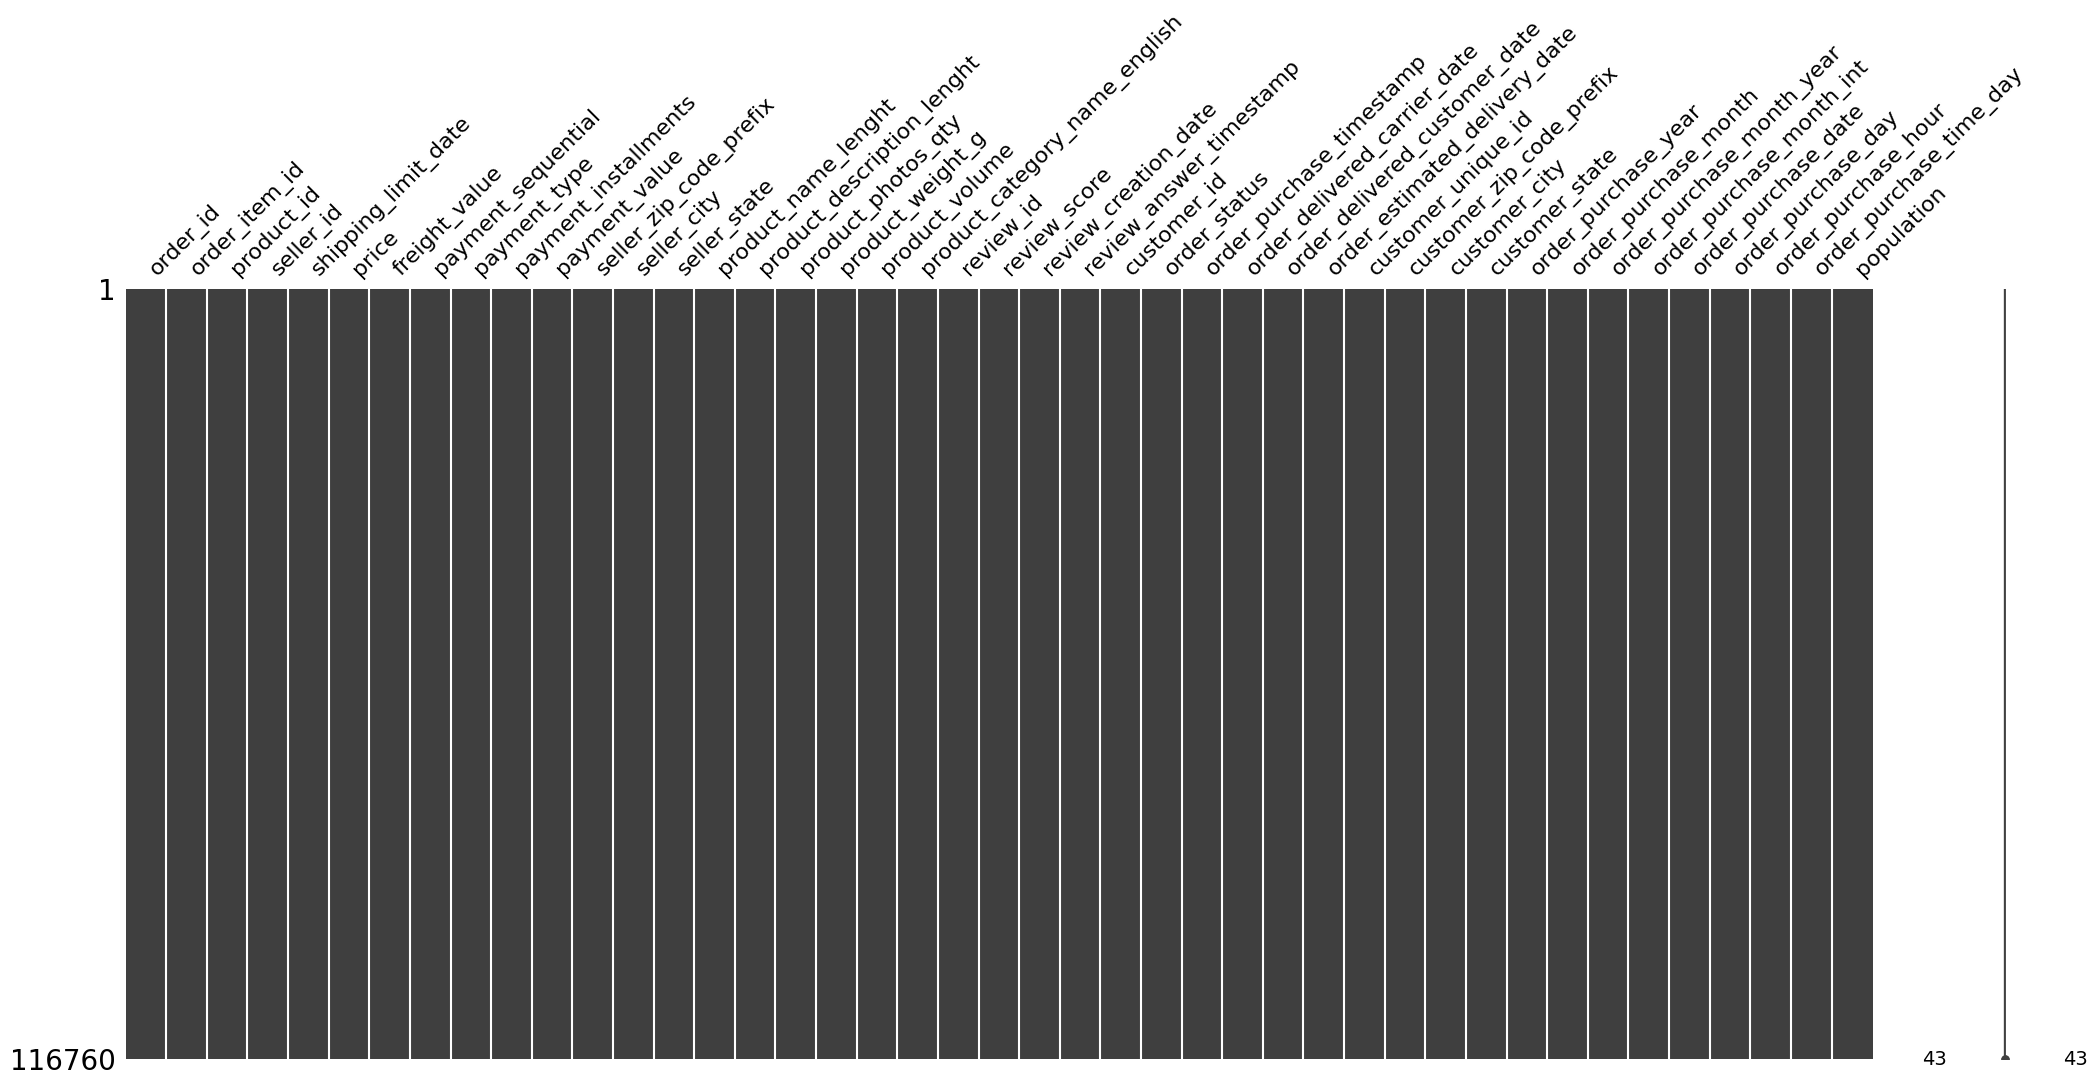

In [108]:
missingno.matrix(df)

**Insight**:

Terlihat bahwa data sudah tidak ada lagi missing value.

### **Check Data Duplication**

In [109]:
df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential'])==True]

order_id  order_item_id  \
8       c9ef97d2854afe64a3b4488bc2836af6              1   
14      d829ae9ca5e0a9749f2574b62eb7ac10              2   
43      1a45c130db33df3cb0e3cd16f0a8ae9d              2   
48      a62de6fa1ce225032f7220425c941b50              1   
82      3102ea2ab7ac2a1a88a1286fe68d8ed8              2   
...                                  ...            ...   
117316  fc3078fa5d882e59237a658341f57738              2   
117318  fc32248629afaea92d59f7086de552d3              2   
117319  fc32248629afaea92d59f7086de552d3              3   
117324  fd607d0a02cb276bc764a15f80f0423f              2   
117328  ff701a7c869ad21de22a6994237c8a00              2   

                              product_id                         seller_id  \
8       436c8d57ff8d4aa254318e9bd9b48c83  48436dade18ac8b2bce089ec2a041202   
14      7f1a77bec0639e473392e91a504272a5  48436dade18ac8b2bce089ec2a041202   
43      c43ab4269cbf91b373263db4c2973cad  48436dade18ac8b2bce089ec2a041202   
48      c43ab4269cbf91b373263db4c2973cad  48436dade18ac8b2bce089ec2a041202   
82      d65b6607952f9e0d705b1cbdc92ac027  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
117316  b5d652cabeb01249ad1cf910eef3230b  b57e8460909fa137df7951b4a3b5ea84   
117318  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117319  9754ea6652dc3e06be088797f85f4ee5  7a188843479798ca813108fa7b959286   
117324  02ad78835ec3f72e750d1dfa6a7e11b3  2a73cba571d90c694b7caca072ccf6ce   
117328  5ff4076c0f01eeba4f728c9e3fa2653c  3e35a8bb43569389d3cebef0ce820f69   

       shipping_limit_date   price  freight_value  payment_sequential  \
8      2017-08-14 04:25:34   58.90          17.83                   1   
14     2017-07-19 02:56:03   55.90          27.72                   1   
43     2017-08-10 02:25:21   48.90          19.33                   1   
48     2017-05-30 12:03:48   45.90          19.33                   1   
82     2017-08-24 21:45:07   48.90          11.58                   1   
...                    ...     ...            ...                 ...   
117316 2017-03-08 08:05:18   99.00          42.07                   1   
117318 2017-11-28 02:46:53   49.90           8.72                   1   
117319 2017-11-28 02:46:53   49.90           8.72                   1   
117324 2018-08-02 02:24:15  171.39          19.35                   1   
117328 2018-04-18 20:10:33   27.90          14.44                   1   

       payment_type  payment_installments  payment_value  \
8            Boleto                     1         153.75   
14           Boleto                     1         167.51   
43           Boleto                     1         130.01   
48      Credit Card                     2         123.02   
82      Credit Card                     3         124.26   
...             ...                   ...            ...   
117316  Credit Card                     1         282.14   
117318       Boleto                     1         175.86   
117319       Boleto                     1         175.86   
117324       Boleto                     1         381.48   
117328  Credit Card                     1          84.68   

        seller_zip_code_prefix         seller_city       seller_state  \
8                        27277       volta redonda          Sao Paulo   
14                       27277       volta redonda          Sao Paulo   
43                       27277       volta redonda          Sao Paulo   
48                       27277       volta redonda          Sao Paulo   
82                       27277       volta redonda          Sao Paulo   
...                        ...                 ...                ...   
117316                   90640        porto alegre  Rio Grande do Sul   
117318                    4276           sao paulo          Sao Paulo   
117319                    4276           sao paulo          Sao Paulo   
117324                    9560  sao caetano do sul        

In [110]:
df.iloc[7:9] #menunjukan data duplicate

order_id  order_item_id  \
7  c9ef97d2854afe64a3b4488bc2836af6              2   
8  c9ef97d2854afe64a3b4488bc2836af6              1   

                         product_id                         seller_id  \
7  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
8  436c8d57ff8d4aa254318e9bd9b48c83  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  freight_value  payment_sequential payment_type  \
7 2017-08-14 04:25:34   58.9          18.12                   1       Boleto   
8 2017-08-14 04:25:34   58.9          17.83                   1       Boleto   

   payment_installments  payment_value  seller_zip_code_prefix    seller_city  \
7                     1         153.75                   27277  volta redonda   
8                     1         153.75                   27277  volta redonda   

  seller_state  product_name_lenght  product_description_lenght  \
7    Sao Paulo                 58.0                       598.0   
8    Sao Paulo                 54.0                       599.0   

   product_photos_qty  product_weight_g  product_volume  \
7                 4.0             650.0          3528.0   
8                 6.0             530.0          3780.0   

  product_category_name_english                         review_id  \
7                    Cool Stuff  dbacd3ac90ace7ad49fe8b31bbad2808   
8                    Cool Stuff  dbacd3ac90ace7ad49fe8b31bbad2808   

   review_score review_creation_date review_answer_timestamp  \
7             5           2017-08-15     2017-08-24 19:35:04   
8             5           2017-08-15     2017-08-24 19:35:04   

                        customer_id order_status order_purchase_timestamp  \
7  0a29abf475fb8039d2775913d6f0b6f0    delivered      2017-08-05 16:59:05   
8  0a29abf475fb8039d2775913d6f0b6f0    delivered      2017-08-05 16:59:05   

  order_delivered_carrier_date order_delivered_customer_date  \
7          2017-08-10 16:40:11           2017-08-14 18:13:03   
8          2017-08-10 16:40:11           2017-08-14 18:13:03   

  order_estimated_delivery_date                customer_unique_id  \
7                    2017-09-06  840f10bde3c94907105e032d9c2fec3b   
8                    2017-09-06  840f10bde3c94907105e032d9c2fec3b   

   customer_zip_code_prefix customer_city customer_state  order_purchase_year  \
7                     75903     Rio Verde          Goias                 2017   
8                     75903     Rio Verde          Goias                 2017   

  order_purchase_month order_purchase_month_year  order_purchase_month_int  \
7                  Aug                   2017-08                         8   
8                  Aug                   2017-08                         8   

  order_purchase_date order_purchase_day  order_purchase_hour  \
7          2017-08-05                Sat                   16   
8          2017-08-05                Sat                   16   

  order_purchase_time_day  population  
7               afternoon     7056495  
8               afternoon     7056495

In [111]:
order_items[order_items['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

order_id  order_item_id  \
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
112640  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112641  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

       shipping_limit_date  price  freight_value  
112640 2017-11-03 02:55:58   55.0          34.19  
112641 2017-11-03 02:55:58   55.0          34.19  
112642 2017-11-03 02:55:58   55.0          34.19  
112643 2017-11-03 02:55:58   55.0          34.19

In [112]:
df=df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential'},keep='first').reset_index(drop=True)

terdapat 14968 data duplicate yang kita drop, karena memiliki payment value yang sama karena payment sequential dan payment type nya sama.
sedangkan sisa nya memiliki payment type dan payment sequential yang berbeda sehingga payment value nya berbeda. Untuk `order_item_id` yang berbeda, hal itu disebabkan karena pelanggan memesan lebih dari satu produk dalam satu kali pesanan, jika pelanggan memesan 3 produk dalam 1 kali pesanan, maka akan ada order_item_id 1, 2, dan 3. Sehingga baris tersebut tetap kami anggap duplikat, karena dalam modelling ini kami ingin mengetahui cluster mana saja yang melakukan pembelian ulang, bukan pelanggan yang memesan lebih dari 1 produk dalam 1 kali pesanan.

## **Exploratory Data Analysis**

In [113]:
df_eda = df.copy()

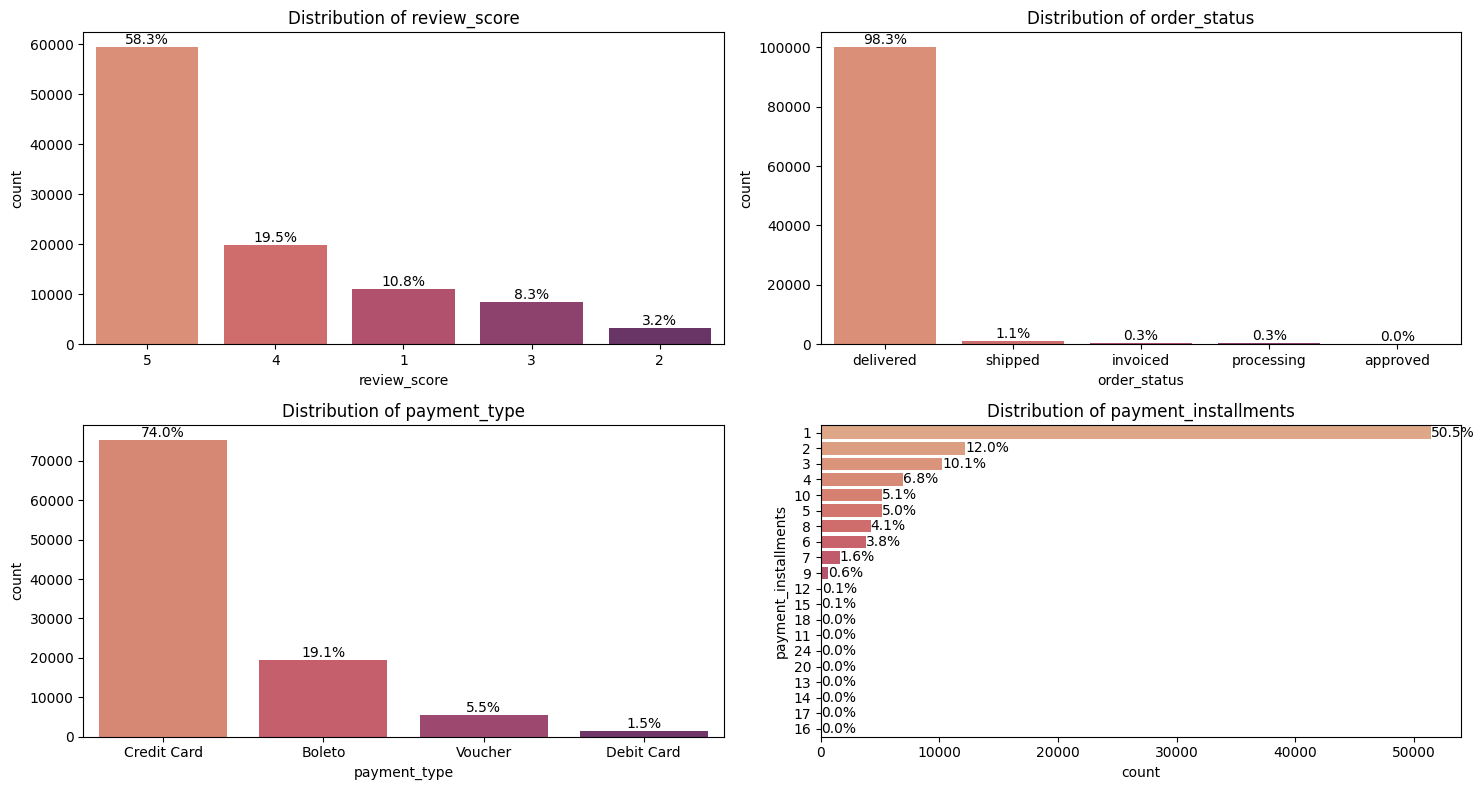

In [114]:
from matplotlib.gridspec import GridSpec

# Selecting the relevant columns
col_list = ['review_score', 'order_status', 'payment_type', 'payment_installments']

# Creating subplots with more customization
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 2, figure=fig)

# Define the order of columns for each subplot
subplot_order = [
    ['review_score', 'payment_type'],
    ['order_status', 'payment_installments']
]

for i, col_list in enumerate(subplot_order):
    for j, col in enumerate(col_list):
        # Bar plot
        ax = plt.subplot(gs[j, i])

        if col in ['payment_installments']:
            sns.countplot(y=col, data=df_eda, order=df_eda[col].value_counts().head(20).index, ax=ax, palette='flare')
            total = len(df_eda[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width() / total)
                x = p.get_x() + p.get_width() + 0.02
                y = p.get_y() + p.get_height() / 2
                ax.text(x, y, percentage, ha='left', va='center')
        else:
            sns.countplot(x=col, data=df_eda, order=df_eda[col].value_counts().head(20).index, ax=ax, palette='flare')
            total = len(df_eda[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + 0.02
                ax.text(x, y, percentage, ha='center', va='bottom')

        ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insight**:

#### **Review Score**
Berdasarkan barplot diatas, dapat kita lihat bahwa pelanggan paling banyak memberikan review score bintang 5 dengan persentase 58,3%, kemudian disusul dengan review score bintang 4 dengan persentase 19,5%. Dari review score ini, dapat kita simpulkan bahwa sebagian besar pelanggan merasa puas berbelanja di Olist.
***
#### **Order Status**
Berdasarkan barplot diatas, sebagian besar order status adalah delivered (telah diterima oleh pelanggan) dengan persentase 98,3%, 1,1% dengan status shipped (sedang dalam tahap pengiriman), 0,3% dengan status invoiced (sedang dalam tahap pembayaran oleh pelanggan), dan 0,3% dengan status processing (sedang diproses oleh penjual).
***
#### **Payment Type**
Berdasarkan barplot diatas, 74% pelanggan melakukan pembayaran menggunakan `kartu kredit`. Berdasarkan artikel dari [ebanx.com](https://blog.ebanx.com/en/payment-methods-in-brazil/) kartu kredit merupakan metode pembayaran paling populer di Brasil dengan merek kartu kredit terkemuka yaitu Visa, Mastercard, American Express, Elo, dan Hipercard. Kemudian disusul `Boleto` dengan persentase sebesar 19,1%, menurut artikel dari [ebanx.com](https://blog.ebanx.com/en/payment-methods-in-brazil/) boleto merupakan metode pembayaran terpopuler ketiga di Brazil. Sehingga `rekomendasi` yang dapat diberikan adalah pemberian diskon Khusus bagi pengguna Kartu Kredit dan boleto berupa potongan harga, cashback ataupun gratis ongkos kirim. <br> Selain itu, penting juga untuk mempertimbangkan menambah tipe pembayaran lainnya. Menurut artikel dari [ebanx.com](https://blog.ebanx.com/en/payment-methods-in-brazil/) studi menunjukkan bahwa menawarkan berbagai opsi pembayaran dapat meningkatkan tingkat konversi hingga 30%. Bahkan lebih dari 70% konsumen Brasil menganggap ketersediaan metode pembayaran yang berbeda sebagai faktor penentu ketika memilih toko online. Sehingga `rekomendasi` yang dapat diberikan adalah menambah tipe pembayaran populer lainnya di Brazil seperti PIX, Digital Wallets, dan “Buy Now, Pay Later”. Menurut studi Beyond Borders 2022-2023, metode “Buy Now, Pay Later” telah mendapatkan popularitas di kalangan konsumen Brasil, berpotensi mencapai lebih dari R$ 80 miliar per tahun, mengingat banyak transaksi yang ditolak karena batasan kartu kredit.
***
#### **payment installments**
Berdasarkan barplot diatas, sebagian besar pelanggan Olist melakukan transaksi dengan metode tanpa cicilan, yaitu dengan persentase 50,5%. Menurut [adyen.com](https://www.adyen.com/payment-methods-guides/latin-america/brazil) 80% pembayaran e-niaga oleh konsumen Brazil dilakukan dengan mencicil. Untuk menarik pelanggan dan keuntungan yang lebih besar, perusahaan bisa memanfaatkan pembayaran dengan metode cicilan tersebut. Rekomendasi yang dapat diberikan untuk meningkatkan minat pelanggan terhadap metode pembayaran dengan cicilan yaitu: <br>
1. Memberikan diskon Khusus untuk Pembayaran Cicilan: Berikan diskon atau potongan harga tambahan bagi pelanggan yang memilih metode pembayaran cicilan. Misalnya, berikan diskon sebesar X% untuk pembayaran dengan cicilan.
2. Program Loyalitas untuk Pengguna Cicilan: Bangun program loyalitas khusus bagi pelanggan yang menggunakan metode pembayaran cicilan. Tawarkan poin atau hadiah ekstra untuk setiap transaksi cicilan yang mereka lakukan.
3. Pemberitahuan Langsung untuk Penawaran Cicilan: Kirimkan pemberitahuan langsung melalui email atau aplikasi kepada pelanggan yang telah menunjukkan minat dalam produk atau telah menambahkannya ke keranjang belanja, menginformasikan opsi cicilan yang tersedia.

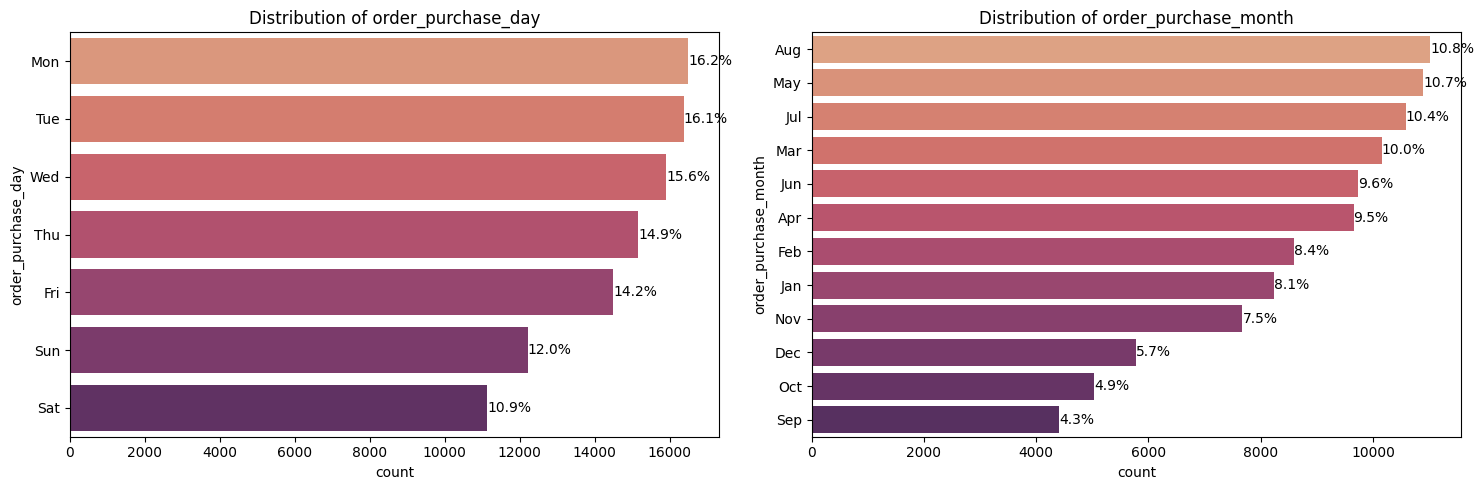

In [115]:
# Selecting the relevant columns
col_list = ['order_purchase_day', 'order_purchase_month']

# Creating subplots with more customization
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 2, figure=fig)

# Define the order of columns for each subplot
subplot_order = [
    ['order_purchase_day'],
    ['order_purchase_month']
]

for i, col_list in enumerate(subplot_order):
    for j, col in enumerate(col_list):
        # Bar plot
        ax = plt.subplot(gs[j, i])

        sns.countplot(y=col, data=df_eda, order=df_eda[col].value_counts().head(20).index, ax=ax, palette='flare')
        total = len(df_eda[col])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height() / 2
            ax.text(x, y, percentage, ha='left', va='center')

        ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insight**:

#### **Jumlah Transaksi per Hari**
Berdasarkan barplot diatas, terlihat bahwa transaksi terbesar terjadi pada hari senin dan selasa, dan transaksi terkecil terjadi pada weekend yaitu hari sabtu dan minggu. Hal tersebut mungkin terjadi karena pada weekend banyak dari pelanggan yang berbelanja di mall atau offline store. Sehingga rekomendasi yang dapat diberikan adalah mengadakan promosi mingguan pada hari senin dan selasa dimana pada hari tersebut pelanggan paling banyak mengunjungi olist. Adapun rekomendasi yang dapat diberikan untuk meningkatkan pembelian pada waktu weekend adalah:
1. Weekend Sale atau Flash Sale: Penawaran khusus atau diskon besar-besaran selama akhir pekan dapat menciptakan urgensi dan memotivasi pelanggan untuk segera berbelanja.
2. Bundling Weekend Special: Buat paket penawaran atau bundling produk yang berlaku khusus selama akhir pekan. Ini bisa termasuk kombinasi produk dengan harga diskon atau penawaran tambahan.
3. Kode Promo Ekstra untuk Weekend: Berikan kode promo tambahan yang hanya berlaku pada hari akhir pekan. Hal ini dapat menjadi insentif yang menarik bagi pelanggan untuk berbelanja selama waktu tersebut.
4. Cashback Akhir Pekan: Tawarkan program cashback atau rewards khusus untuk pembelian yang dilakukan selama akhir pekan. Ini dapat menjadi cara yang baik untuk meningkatkan loyalitas pelanggan.
5. Pengiriman Gratis Akhir Pekan: Tawarkan gratis ongkos kirim selama akhir pekan untuk memikat pelanggan yang mungkin merencanakan pembelian mereka pada hari tersebut.
6. Pre-order atau Early Access: Berikan pelanggan yang berbelanja pada akhir pekan kesempatan untuk pre-order produk baru atau memberikan akses eksklusif ke penawaran spesial.
7. Konten Sosial Media Tematis Akhir Pekan: Gunakan media sosial untuk mempromosikan penawaran akhir pekan dengan konten yang menarik, seperti gambar atau video tematis akhir pekan.
8. Giveaway atau Kontes: Selenggarakan giveaway atau kontes dengan hadiah menarik untuk menarik perhatian dan meningkatkan partisipasi pelanggan selama akhir pekan.
9. Event Live Streaming atau Webinar: Buat event live streaming atau webinar yang dapat menarik perhatian pelanggan selama akhir pekan. Bisa berupa sesi demo produk, diskusi tentang tren terbaru, atau acara yang bersifat interaktif.
10. Program Loyalitas Akhir Pekan: Tawarkan bonus poin loyalitas atau reward eksklusif untuk pelanggan setia yang berbelanja pada hari akhir pekan.
***
#### **Jumlah Transaksi per Bulan**
Berdasarkan barplot diatas, terlihat bahwa transaksi terbesar ada pada bulan Agustus dan Mei. Berdasarkan riset yang kami lakukan, pada bulan agustus dan mei terdapat hari besar yang menyebabkan pembelian meningkat.
1. Mother's Day (Minggu kedua bulan Mei): produk yang banyak dibeli berupa, Pakaian dan Aksesoris mewah, Perhiasan, Produk Kecantikan dan Perawatan Diri, Peralatan Dapur dan Perlengkapan Rumah Tangga.
2. Father's Day (Minggu kedua bulan Agustus): produk yang banyak dibeli berupa, Pakaian dan Aksesoris mewah, Alat Elektronik, Olahraga dan Aktivitas Luar Ruangan, Parfum atau Produk Perawatan Pria.

Selain itu, kita juga perlu menganalisis event-event lainnya yang mungkin dapat meningkatkan konversi pembelian pelanggan, dimana tim marketing harus menyesuaikan jenis produk yang akan dipromosikan sesuai dengan event-event yang sedang berlangsung.
1. Black Friday (Jumat, akhir November): yaitu acara ritel dengan diskon besar dan berlangsung sekitar satu minggu di Brasil. Rekomendasi produk yang diberikan diskon pada event ini adalah barang-barang dengan harga mahal, seperti ponsel pintar, komputer, peralatan rumah tangga, pakaian, alas kaki olahraga, dan wewangian.
2. Consumer’s Day: yaitu acara e-commerce tahunan yang berlangsung pada tanggal 15 Maret setiap tahunnya. Ini dianggap sebagai Black Friday Q1 karena potensi penjualannya yang tinggi. Rekomendasi produk yang diberikan diskon pada event ini adalah Elektronik, Pakaian dan sandang, Kecantikan dan Peralatan rumah tangga.
3. Cyber ​​Monday: berlangsung pada hari Senin setelah Thanksgiving; tanggalnya jatuh antara 26 November dan 2 Desember, tergantung tahunnya. Rekomendasi produk yang diberikan diskon pada event ini adalah Elektronik dan Gadget, Mode dan Pakaian, Perlengkapan Olahraga dan Rekreasi, serta Perawatan Pribadi dan Kecantikan.
4. Children's Day (12 Oktober): Permulaan belanja online Hari Anak biasanya dimulai sekitar 3 hingga 2 minggu sebelum acara, sedikit berbeda berdasarkan kategori setiap hadiah. Puncak penjualan online biasanya terjadi pada rentang waktu 1 hingga 2 minggu sebelum acara. Rekomendasi produk yang diberikan diskon pada event ini adalah Mainan, Mainan Pendidikan dan Pembelajaran, Elektronik, Peralatan outdoor dan Taman Bermain dan Buku.
5. Valentines Day (12 Juni): pada saat menjelang valentines day, rekomendasi produk yang diberikan diskon adalah Pakaian, Parfum dan Kosmetik, Aksesoris, Sepatu dan Elektronik.
6. Natal (25 Desember): pada saat menjelang hari natal, rekomendasi produk yang diberikan diskon adalah Peralatan Rumah Tangga, Fashion & Aksesoris, Ponsel, Buku, dan Peralatan Perawatan Pribadi, seperti Rias Wajah dan Parfum.

In [116]:
import plotly.express as px
import plotly.graph_objects as go

# Creating an aggregation
sales_per_purchase_month = df_eda.groupby(['order_purchase_month_int', 'order_purchase_month', 'order_purchase_day'], as_index=False).payment_value.sum()
sales_per_purchase_month = sales_per_purchase_month.sort_values(by=['order_purchase_month_int'], ascending=True)

# Plotting with Plotly
fig = go.Figure()

# Plot each day of the week separately
for day, data in sales_per_purchase_month.groupby('order_purchase_day'):
    fig.add_trace(go.Scatter(x=data['order_purchase_month'], y=data['payment_value'], mode='lines', name=f'Day {day}'))

fig.update_layout(
    title="Sales Each Month & Each Day of Week",
    xaxis=dict(title="Months"),
    yaxis=dict(title="Sales (in $$)"),
    legend=dict(title='Day of Week'),
    showlegend=True,
    autosize=False,
    width=1500,
    height=500,
)

fig.show()

**Insight**:

Jika kita lihat pada bulan november, transaksi terbanyak ada pada hari jumat dimana pada hari itu bertepatan dengan event black friday yang biasanya diselenggarakan pada hari jumat akhir bulan november.

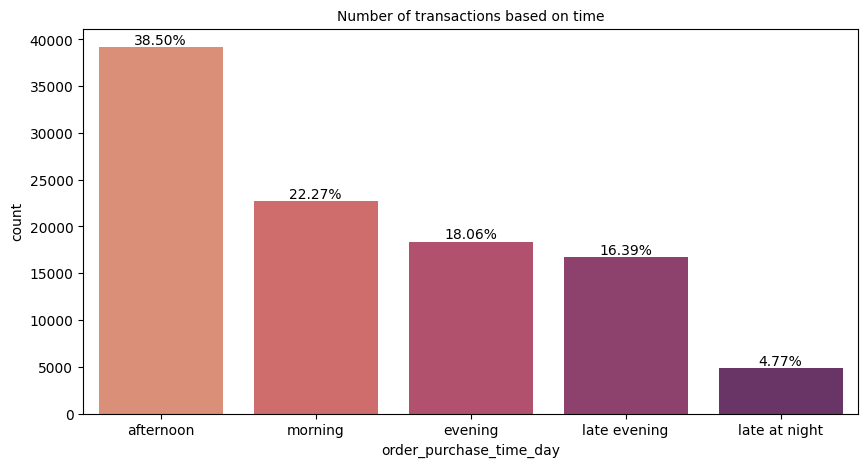

In [117]:
# Menghitung jumlah transaksi berdasarkan waktu
count_by_time = df_eda['order_purchase_time_day'].value_counts()
sorted_time = count_by_time.index

plt.figure(figsize=(10,5))
sns.countplot(x="order_purchase_time_day", data=df_eda, order=sorted_time, palette='flare')

plt.title('Number of transactions based on time', size=10)
plt.xlabel('order_purchase_time_day', size=10)
plt.ylabel('count', size=10)

total_data = len(df_eda['order_purchase_time_day'])
for i, value in enumerate(count_by_time):
    percentage = (value / total_data) * 100
    plt.text(i, value + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

**Insight**:

Berdasarkan Barplot di atas, pembagian waktu dibagi berdasarkan :
- late at night : 00.00 - 05.00
- morning : 05.00 - 11.00
- afternoon : 12.00 - 17.00
- evening : 18.00 - 20.00
- late evening : 21.00 - 24.00

Terlihat bahwa jumlah transaksi terbanyak terdapat pada waktu "afternoon" dimana 38.50% transaksi terjadi pada waktu tersebut, sehingga team marketing dapat menjadikan opsi waktu tersebut untuk melakukan aktivitas pemasaran seperti:
1. Flash Sale Sesi Tengah Hari: Menawarkan diskon besar atau penawaran spesial selama periode tertentu dalam jendela waktu tengah hari dapat memancing minat pelanggan. Gunakan istilah seperti "Flash Sale" atau "Limited Time Offer" untuk menciptakan urgensi.
2. Diskon Khusus Waktu Tengah Hari: Berikan diskon atau kode promo spesifik yang berlaku hanya selama jam 12.00 - 17.00. Hal ini dapat memberikan insentif kepada pelanggan untuk berbelanja selama periode waktu tersebut.
3. Bundling Produk: Buat paket penawaran khusus yang mencakup beberapa produk dengan harga yang lebih murah jika dibeli bersamaan. Strategi bundling dapat meningkatkan nilai belanja pelanggan.
4. Cashback atau Voucher: Tawarkan cashback atau voucher khusus untuk pembelian selama waktu tengah hari. Ini dapat menjadi insentif yang menarik bagi pelanggan untuk melakukan transaksi pada jam tersebut.
5. Promosi Produk Unggulan: Fokuskan promosi pada produk unggulan atau produk baru yang ingin Anda promosikan. Berikan penawaran khusus atau bonus untuk pembelian produk tersebut selama waktu tertentu.
6. Program Loyalitas dan Rewards: Berikan poin bonus, diskon tambahan, atau hadiah kepada pelanggan setia yang berbelanja selama jam-jam tertentu dalam sehari.
7. Konten Sosial Media Berjadwal: Rencanakan unggahan konten promosi di platform media sosial Anda pada waktu yang strategis, seperti pukul 12.00 - 13.00 atau sekitar jam makan siang, untuk menangkap perhatian pelanggan yang sedang online.
8. Live Streaming atau Webinar: Gunakan live streaming atau webinar untuk memperkenalkan produk, memberikan tips, atau memberikan penawaran eksklusif kepada penonton selama waktu tengah hari.

**Transactions Every Hour of the Day**

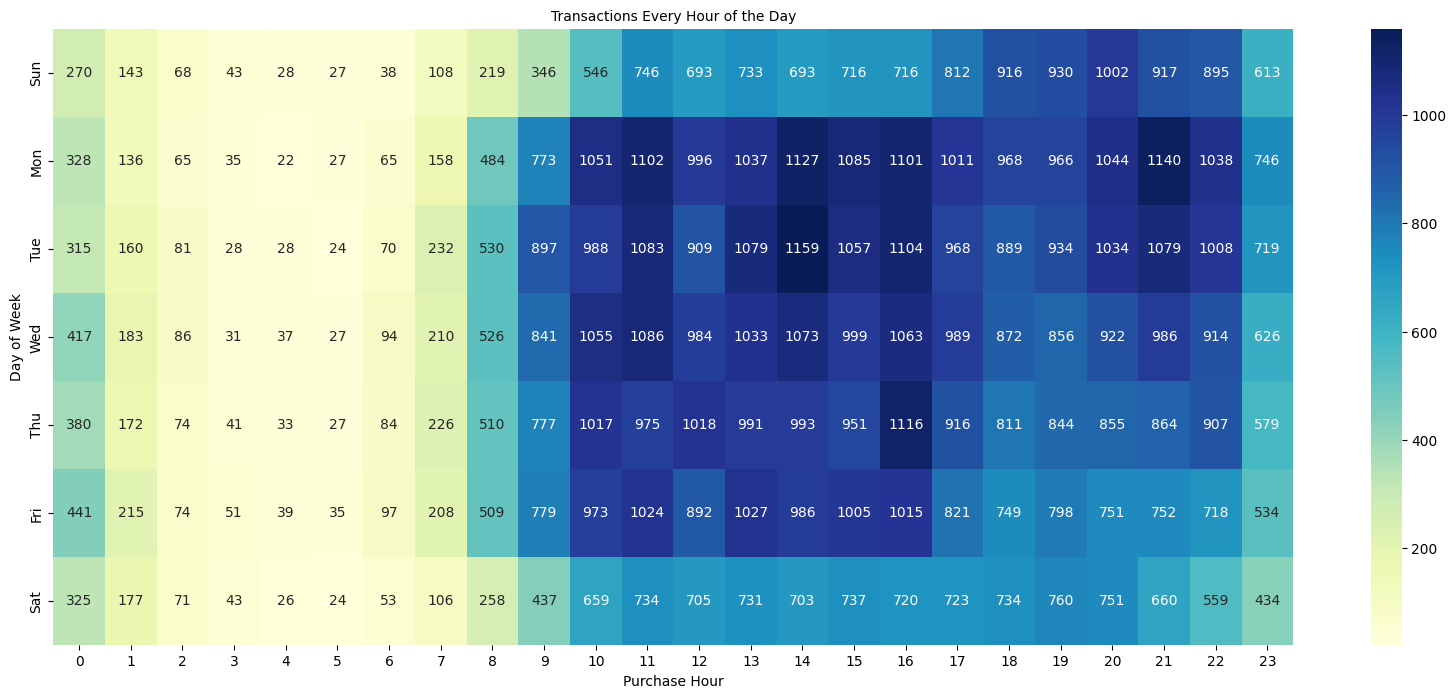

In [118]:
purchase_count = df_eda.groupby(['order_purchase_day', 'order_purchase_hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()
purchase_count['order_purchase_day'] = pd.Categorical(purchase_count['order_purchase_day'], categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)
# Menggunakan pivot_table()
purchase_count = purchase_count.pivot_table(index='order_purchase_day', columns='order_purchase_hour', values='freq', aggfunc='sum')
plt.figure(figsize=(20, 8))
sns.heatmap(purchase_count, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Purchase Hour')
plt.ylabel('Day of Week')
plt.title("Transactions Every Hour of the Day", size=10)
plt.show()


**Insight**:

Berdasarkan heatmap diatas, transaksi mulai banyak terjadi mulai dari jam 8 pagi hingga jam 10 malam, dimana diantara waktu tersebut transaksi terbesar berada pada jam 10 pagi hingga jam 5 sore, hal tersebut sesuai dengan analisis kita sebelumnya dimana afternoon merupakan waktu transaksi terbesar. Selain itu, jumlah transaksi terbesar berada dihari weekdays, dimana hal ini juga sesuai dengan analisis kita sebelumnya yaitu pada analisis jumlah transaksi per hari. 

**Total Transaksi dan Orders per Tahun**

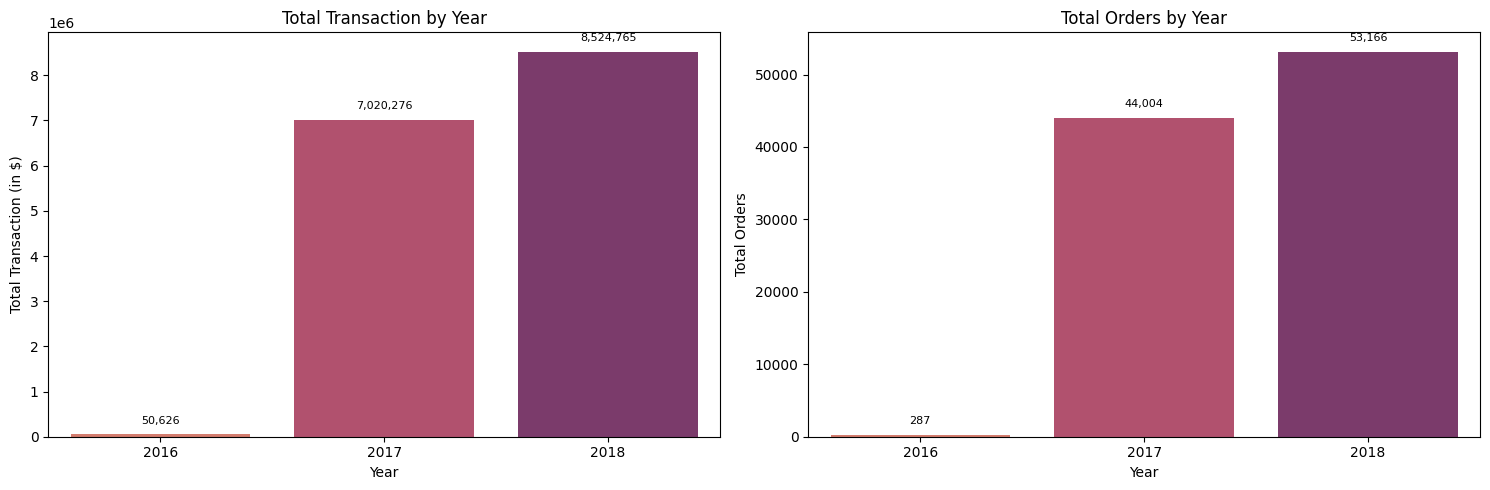

In [119]:
# Grouping data by year and calculating total revenue
total_rev_per_year = df_eda.groupby(['order_purchase_year'], as_index=False).payment_value.sum()

# Grouping data by year and calculating total orders
total_orders = df_eda.groupby(['order_purchase_year'], as_index=False).order_id.nunique()

# Creating subplots with more customization
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])

# Bar plot for total revenue on the left side
ax0 = plt.subplot(gs[0])
sns.barplot(x='order_purchase_year', y='payment_value', data=total_rev_per_year, ax=ax0, palette='flare')
ax0.set_title('Total Transaction by Year')
ax0.set_xlabel('Year')
ax0.set_ylabel('Total Transaction (in $)')

# Adding count labels on top of bars
for p in ax0.patches:
    ax0.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Bar plot for total orders on the right side
ax1 = plt.subplot(gs[1])
sns.barplot(x='order_purchase_year', y='order_id', data=total_orders, ax=ax1, palette='flare')
ax1.set_title('Total Orders by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Orders')

# Adding count labels on top of bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

**Insight**:

Berdasarkan barplot diatas, terlihat bahwa transaksi di Olist menunjukkan tren positif dimana mengalami kenaikan transaksi yang cukup signifikan dari tahun ketahunnya.

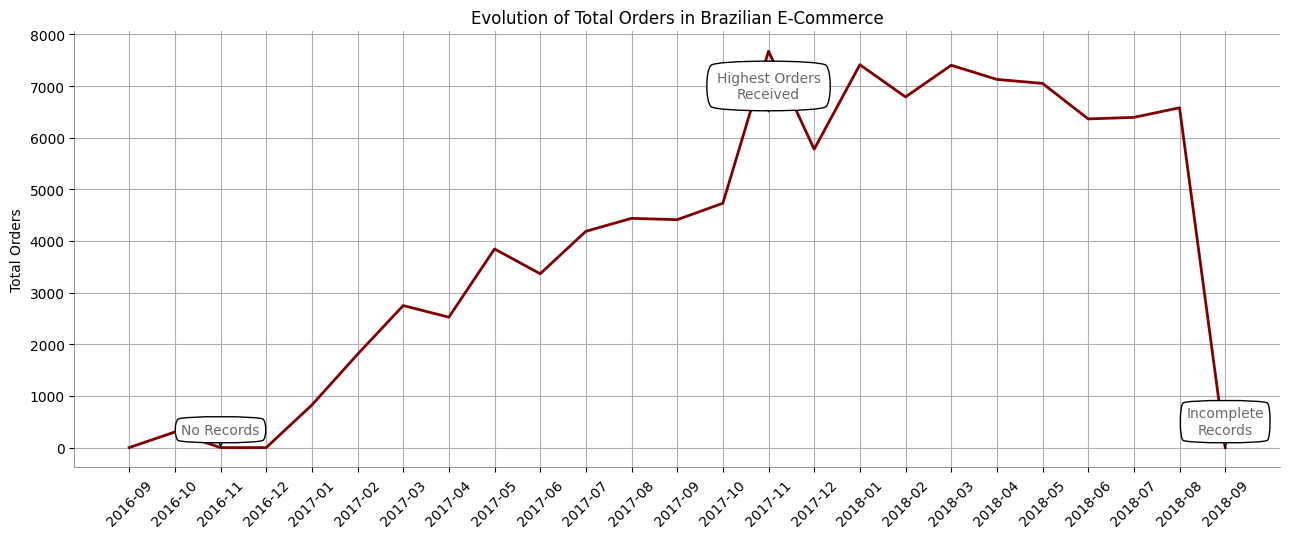

In [120]:
import matplotlib.gridspec as gridspec

# convert 'order_purchase_month_year' to data type string
df_eda['order_purchase_month_year'] = df_eda['order_purchase_month_year'].astype('str')

# Make an Evolution of Total Orders in Brazilian E-Commerce Plot
fig = plt.figure(constrained_layout=True, figsize=(13, 10))
spec = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(spec[0, :])

# Lineplot - Evolution of e-commerce orders along time
evolution_data = pd.concat([df_eda['order_purchase_month_year'].value_counts(), pd.Series({'2016-11': 0})]).sort_index()
sns.lineplot(data=evolution_data, ax=ax1, color='maroon', linewidth=2)

for i, note_text in zip([(14, 6500), (24, 0), (2, 0)], ['Highest Orders\nReceived', 'Incomplete\nRecords', 'No Records']):
    ax1.annotate(
        note_text,
        xy=i,
        xytext=(0, 10), 
        textcoords='offset points',
        bbox=dict(
            boxstyle="round4",
            fc="w",
            pad=.8 if note_text == 'Highest Orders\nReceived' else 0.5
        ),
        arrowprops=dict(
            arrowstyle='-|>',
            fc='w'
        ),
        color='dimgrey',
        ha='center'
    )

ax1.spines['bottom'].set_color('#666666')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_color('#666666')
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.patch.set_facecolor('white')
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=12, color='black')
ax1.set_ylabel('Total Orders')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(True)

plt.tight_layout()
plt.show()


**Insight**:

Berdasarkan line plot diatas, terlihat bahwa transaksi memiliki tren positif dari tahun ketahunnya, dimana pada bulan november 2017 merupakan transaksi tertinggi karena terdapat beberapa event besar pada bulan november seperti Black Friday dan Cyber Monday.


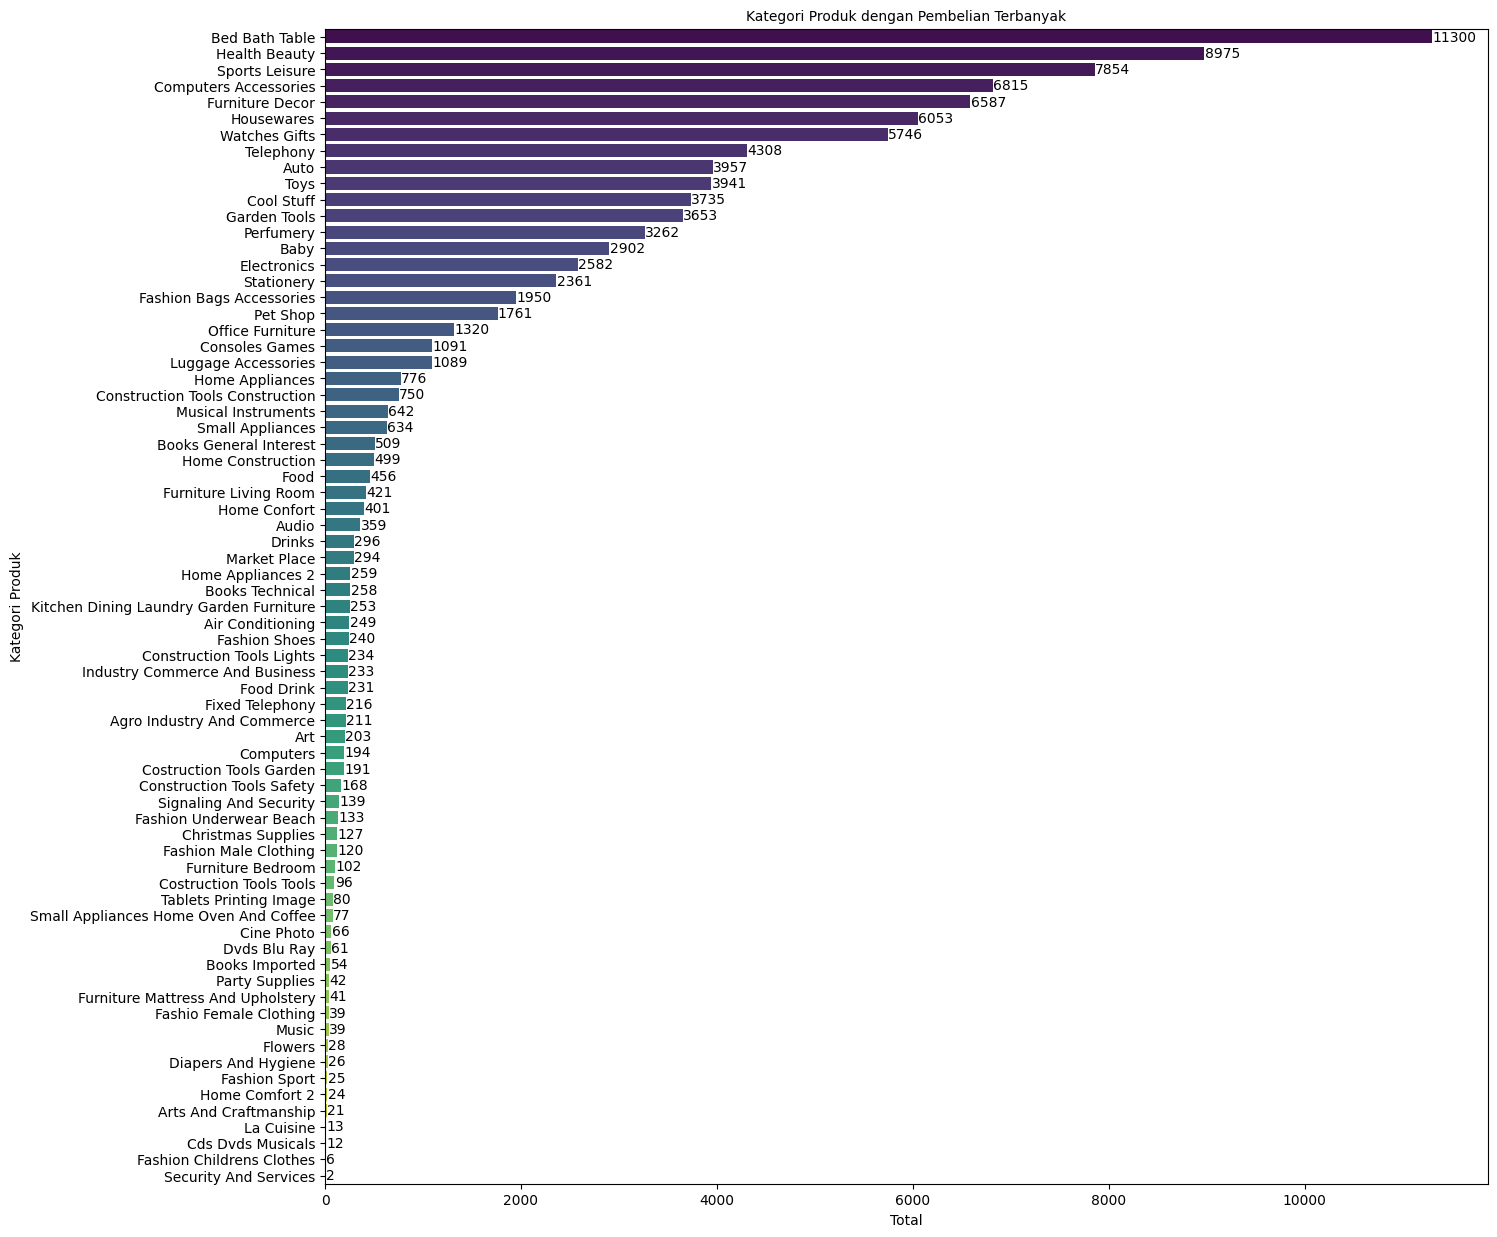

In [121]:
plt.figure(figsize=(15,15))
ax = sns.countplot(y="product_category_name_english", data=df_eda, 
                   order=df_eda['product_category_name_english'].value_counts().index, 
                   palette='viridis')

plt.title('Kategori Produk dengan Pembelian Terbanyak', size=10)
plt.xlabel('Total', size=10)
plt.ylabel('Kategori Produk', size=10)

for i, v in enumerate(df_eda['product_category_name_english'].value_counts()):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=10, ha='left')

plt.show()

**Insight**:

Berdasarkan barplot diatas, kategori produk dengan pembelian terbanyak adalah Bed Bath Table, Health Beauty, Sports Leisure, Furniture Decor, dan Computers Accessories, dimana produk-produk tersebut sebagian besarnya merupakan produk dengan pembelian ulang yang cukup lama. Jika kita perhatikan, ada ketimpangan yang sangat besar dimana masih banyak jenis kategori produk lainnya yang kurang diminati namun memiliki potensi yang cukup besar terhadap pembelian berulang seperti kategori produk bayi, buku dan peralatan alat tulis, produk-produk fashion, serta makanan dan minuman. Sehingga rekomendasi yang dapat diberikan adalah  melakukan kampanye marketing pada kategori produk yang memiliki potensi besar tersebut seperti:
1. Buat flashsale pada kategori produk tersebut dan ditampilkan pada halaman utama aplikasi
2. Buat konten yang edukatif atau inspiratif yang berkaitan dengan produk dalam kategori tersebut. Misalnya, berbagi tips perawatan bayi, ulasan buku, tutorial fashion, atau resep makanan untuk menarik minat pelanggan.
3. Kombinasikan produk dari kategori yang kurang diminati dengan produk dari kategori populer dalam satu paket yang menarik. Tawarkan harga khusus untuk pembelian paket tersebut.
4. Manfaatkan media sosial untuk mempromosikan produk secara kreatif. Buat konten visual menarik dan ajak pelanggan untuk berpartisipasi dalam kontes atau giveaway terkait produk.
5. Optimalisasi halaman produk untuk mesin pencari (SEO) untuk meningkatkan visibilitas online. Gunakan kampanye iklan terarah untuk menargetkan pelanggan yang berpotensi tertarik pada kategori produk tersebut.

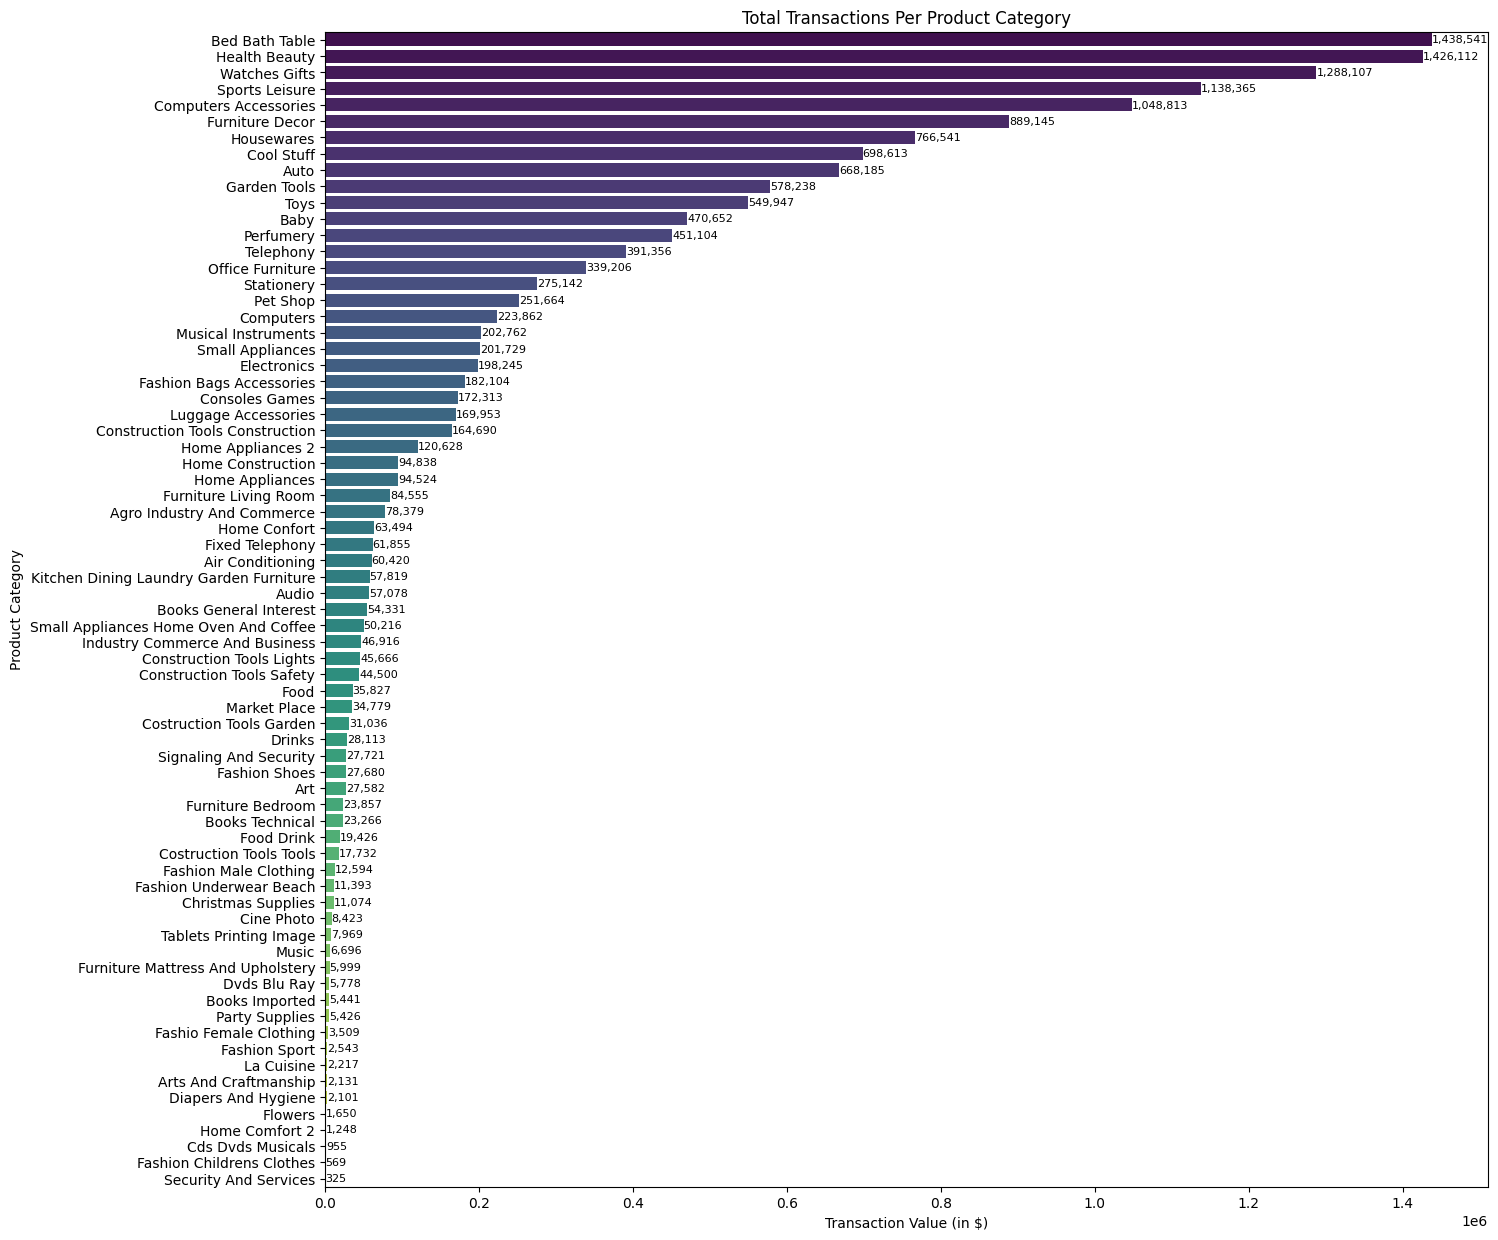

In [122]:
# Grouping data by product category and calculating total sales revenue
sales_per_category = df_eda.groupby(['product_category_name_english'], as_index=False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by=['payment_value'], ascending=False)
sales_per_category.columns = ['Product Category', 'Transaction Value']

# Create a bar plot using seaborn
plt.figure(figsize=(15, 15))
ax = sns.barplot(x='Transaction Value', y='Product Category', data=sales_per_category, palette='viridis')

# Add total values on top of the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2,
             f'{width:,.0f}', ha='left', va='center', fontsize=8)

plt.title('Total Transactions Per Product Category')
plt.xlabel('Transaction Value (in $)')
plt.ylabel('Product Category')
plt.show()


**Insight**:

Berdasarkan barplot diatas, Bed Bath Table, Health Beauty, Computers Accessories, Furniture Decor, Watches Gifts dan Sports Leisure adalah kategori produk dengan nilai transaksi tertinggi, hal itu dikarenakan kategori produk tersebut merupakan kategori produk dengan jumlah pembelian terbanyak.

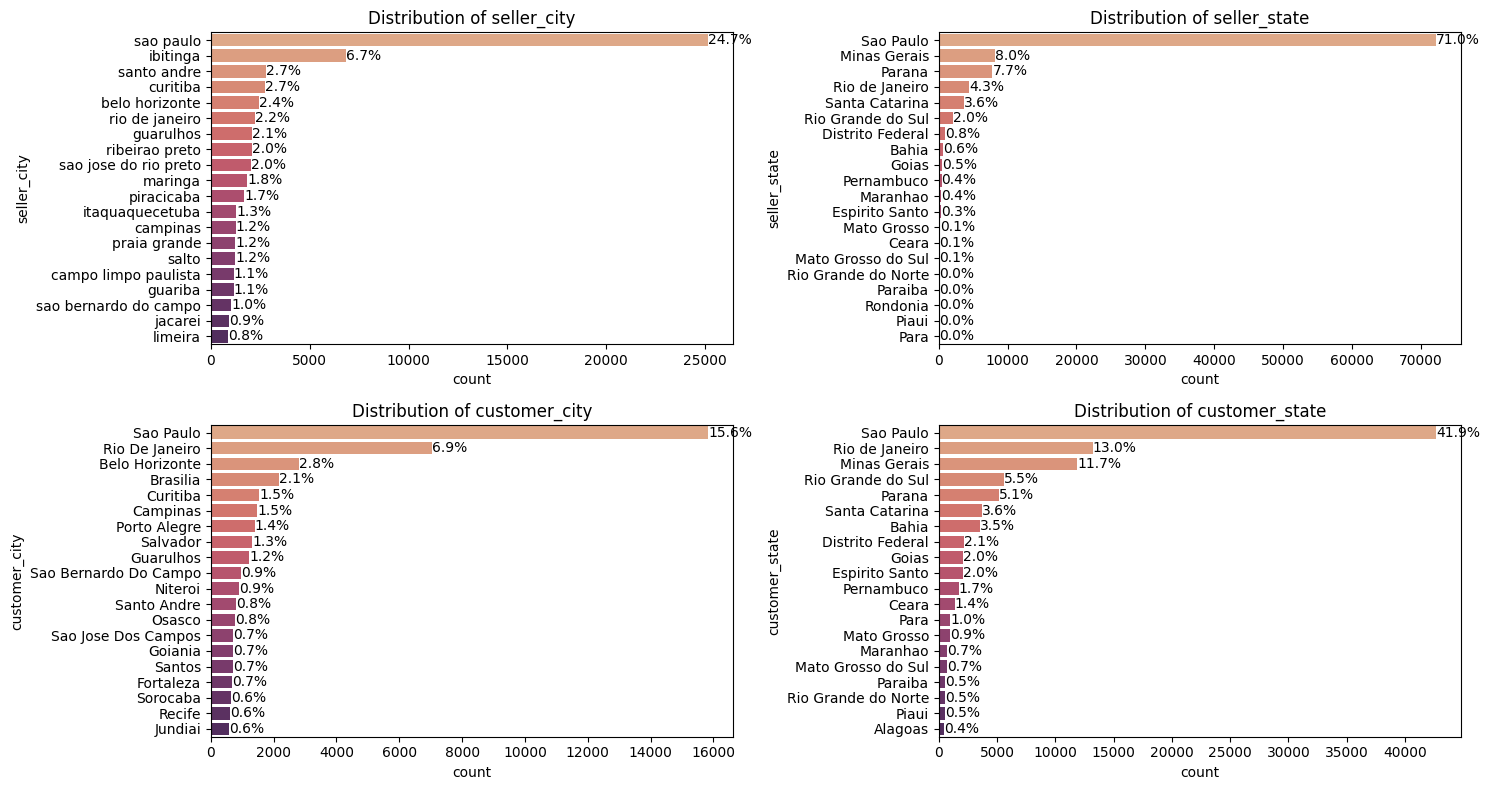

In [123]:
col_list = ['seller_city', 'seller_state', 'customer_city', 'customer_state']

# Creating subplots with more customization
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 2, figure=fig)

# Define the order of columns for each subplot
subplot_order = [
    ['seller_city', 'customer_city'],
    ['seller_state', 'customer_state']
]

for i, col_list in enumerate(subplot_order):
    for j, col in enumerate(col_list):
        # Bar plot
        ax = plt.subplot(gs[j, i])

        sns.countplot(y=col, data=df_eda, order=df_eda[col].value_counts().head(20).index, ax=ax, palette='flare')
        total = len(df_eda[col])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height() / 2
            ax.text(x, y, percentage, ha='left', va='center')

        ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

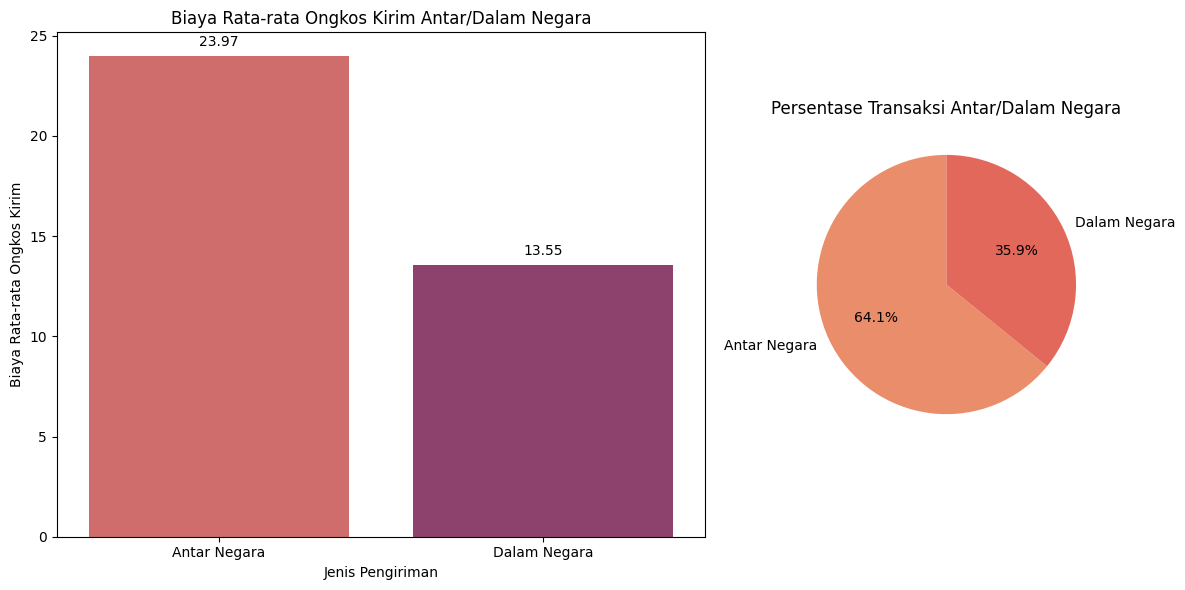

In [124]:
# biaya rata-rata ongkos kirim antar negara
avg_freight_inter = df_eda[df_eda['customer_state'] != df_eda['seller_state']]['freight_value'].mean()

# biaya rata-rata ongkos kirim dalam negara
avg_freight_intra = df_eda[df_eda['customer_state'] == df_eda['seller_state']]['freight_value'].mean()

# Membuat DataFrame untuk visualisasi biaya ongkos kirim
data_freight = {'Jenis Pengiriman': ['Antar Negara', 'Dalam Negara'],
                'Biaya Rata-rata Ongkos Kirim': [avg_freight_inter, avg_freight_intra]}

df_visualization_freight = pd.DataFrame(data_freight)

# persentase transaksi antar negara bagian
percentage_inter_state = df_eda[df_eda['customer_state'] != df_eda['seller_state']].shape[0] / df.shape[0] * 100

# persentase transaksi dalam negara bagian
percentage_intra_state = df_eda[df_eda['customer_state'] == df_eda['seller_state']].shape[0] / df.shape[0] * 100

# Membuat DataFrame untuk visualisasi persentase transaksi
data_transaction = {'Jenis Transaksi': ['Antar Negara', 'Dalam Negara'],
                    'Persentase Transaksi': [percentage_inter_state, percentage_intra_state]}

df_visualization_transaction = pd.DataFrame(data_transaction)

# Membuat subplot dengan grid layout
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

# Visualisasi biaya rata-rata ongkos kirim (bar plot)
bar_plot = sns.barplot(x='Jenis Pengiriman', y='Biaya Rata-rata Ongkos Kirim', data=df_visualization_freight, ax=axes[0], palette='flare')
axes[0].set_title('Biaya Rata-rata Ongkos Kirim Antar/Dalam Negara')

# Menambahkan angka di atas batang barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Visualisasi persentase transaksi (pie chart)
axes[1].pie(df_visualization_transaction['Persentase Transaksi'], labels=df_visualization_transaction['Jenis Transaksi'],
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('flare'))
axes[1].set_title('Persentase Transaksi Antar/Dalam Negara')

plt.tight_layout()
plt.show()

In [125]:
# Hitung selisih waktu antara order_delivered_customer_date dan order_purchase_timestime
df_eda['estimate_delivery_duration'] = df_eda['order_estimated_delivery_date'] - df_eda['order_delivered_carrier_date']

In [126]:
estimated_delivery_between_countries = df_eda[df_eda['customer_state'] != df_eda['seller_state']]['estimate_delivery_duration'].mean()

print('Rata-rata estimasi durasi pengiriman antar negara yaitu:', estimated_delivery_between_countries)

Rata-rata estimasi durasi pengiriman antar negara yaitu: 23 days 23:07:12.766467360


In [127]:
estimated_delivery_within_country = df_eda[df_eda['customer_state'] == df_eda['seller_state']]['estimate_delivery_duration'].mean()

print('Rata-rata estimasi durasi pengiriman dalam negara yaitu:', estimated_delivery_within_country)

Rata-rata estimasi durasi pengiriman dalam negara yaitu: 14 days 12:05:54.416093126


**Insight**:

Berdasarkan visualisasi barplot diatas, terlihat bahwa penjual terbanyak berada di Negara Sao Paulo, yaitu sekitar 71%. Jika kita lihat pada visualisasi customer_state, pelanggan terbanyak juga berada di Negara Sao Paulo, yaitu sekitar 41,9%. Hal tersebut wajar karena Sao Paulo merupakan negara bagian dengan populasi terbesar di Brazil. Namun pada visualisasi kedua, sebesar 64,1% transaksi terjadi pada antar negara bagian. Hal tersebut terjadi karena sebagian besar penjual berada di Sao Paulo yang menyebabkan ketersediaan produk banyak berada di Sao Paulo. Namun yang menjadi masalah adalah, transaksi antar negara memiliki durasi pengiriman 2 kali lipat lebih lama dan biaya ongkos kirim dua kali lipat lebih mahal, dimana hal tersebutlah yang mungkin menyebabkan pelanggan jarang melakukan pembelian ulang di Olist. Sehingga rekomendasi yang dapat diberikan adalah:
1. Memperbanyak jumlah seller dan ketersediaan produk dinegara bagian lainnya
2. Memberikan diskon berupa potongan ongkos kirim dan juga menyediakan pengiriman kilat sehingga durasi pengiriman bisa lebih cepat.

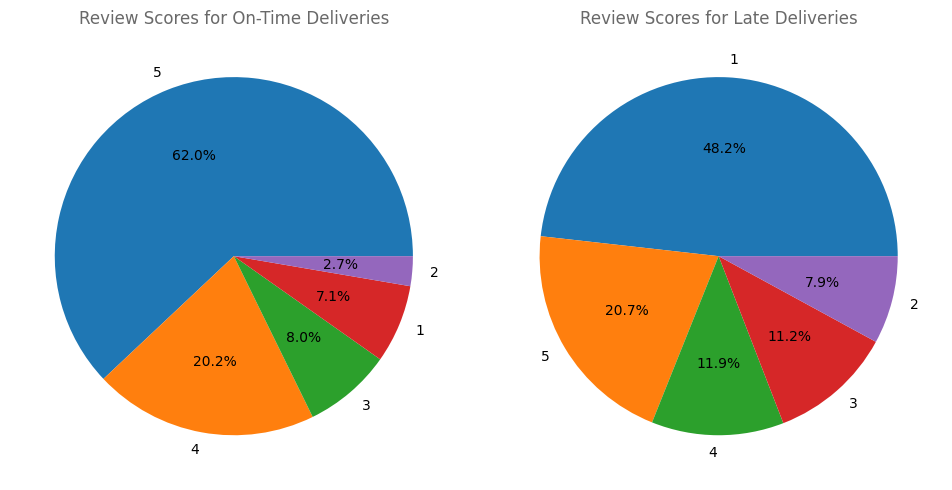

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(2):
    if i == 0:
        data = df_eda[df_eda['order_estimated_delivery_date'] > df_eda['order_delivered_customer_date']]
        prompt = 'On-Time Deliveries'
    else:
        data = df_eda[df_eda['order_estimated_delivery_date'] <= df_eda['order_delivered_customer_date']]
        prompt = 'Late Deliveries'

    axes[i].pie(
        data['review_score'].value_counts(),
        labels=data['review_score'].value_counts().index,
        autopct='%1.1f%%'
    )

    plt.tight_layout()
    axes[i].set_title(
        f'Review Scores for {prompt}',
        size=12,
        color='dimgrey'
    )

plt.show()

In [129]:
df_eda['delivery_duration']=(df_eda['order_delivered_customer_date'].dt.to_period('D')-df_eda['order_delivered_carrier_date'].dt.to_period('D')).apply(attrgetter('n'))
df_eda['estimate_delivery_duration']=(df_eda['order_estimated_delivery_date'].dt.to_period('D')-df_eda['order_delivered_carrier_date'].dt.to_period('D')).apply(attrgetter('n'))

In [130]:
df_eda['delivery_acc']=df_eda['estimate_delivery_duration']-df_eda['delivery_duration']

In [131]:
df_eda[df_eda['delivery_acc']<0].shape[0]/df.shape[0]*100

6.539806664570889

**Insight**:

Berdasarkan pie chart diatas, sebagian besar pelanggan akan memberikan rating bintang 5 jika durasi pengiriman tepat waktu, sebaliknya jika durasi pengiriman lebih lama dari estimasi durasi pengiriman, maka sebagian besar pelanggan akan memberikan rating yang buruk. Untuk masalah ini, kami akan merekomendasikan:
1. Peningkatan Jasa Pengiriman dan Penambahan Mitra Pengiriman Berkualitas:
- Evaluasi dan tingkatkan kualitas layanan pengiriman yang ada.
- Identifikasi mitra pengiriman potensial yang memiliki jangkauan dan reputasi yang lebih baik.
- Pastikan kerja sama dengan mitra pengiriman yang dapat memberikan pengalaman pengiriman yang lebih cepat dan handal.
2. Penambahan Fasilitas Tracking Barang:
- Implementasikan sistem pelacakan yang lebih canggih untuk memungkinkan pelanggan melacak barang mereka secara real-time.
- Tawarkan notifikasi dan pembaruan secara berkala kepada pelanggan untuk memberikan informasi terkini tentang status pengiriman.
3. Pembuatan Warehousing untuk Optimasi Pengiriman:
- Desain dan implementasikan fasilitas warehousing yang efisien untuk menyimpan dan mengelola inventaris dengan baik.
- Pertimbangkan lokasi warehousing yang strategis untuk mengoptimalkan jarak dan waktu pengiriman.
- Gunakan teknologi otomasi dalam operasi warehousing untuk meningkatkan efisiensi dan akurasi.

## **Cohort Analysis**

Kami melakukan cohort analysis untuk mengetahui tingkat pembelian ulang ataupun loyalitas pelanggan pada e-commerce Olist.

In [132]:
df_cohort = df.copy()

In [133]:
df_cohort.sort_values(by='order_purchase_timestamp', inplace=True)

### In this case, we want to create monthly cohort, so we will transform date into monthly format

In [134]:
# Step 1 and Step 2:
# First of all, we create cohort date as cohort month, by finding the minimum date of order_purchase_timestamp of each users
# Then we transform the format into monthly-based
df_cohort["cohort_month"] = df_cohort.groupby("customer_unique_id")["order_purchase_timestamp"].transform("min").dt.to_period("M")

# We create current activity date: current order month, just transform order_purchase_timestamp into monthly format
df_cohort["current_order_month"] = df_cohort["order_purchase_timestamp"].dt.to_period("M")
df_cohort.head()

order_id  order_item_id  \
12743   2e7a8482f6fb09756ca50c10d7bfc047              1   
51131   3b697a20d9e427646d92567910af6d57              1   
101597  be5bc2f0da14d8071e2d45451ad119d9              1   
85377   a41c8759fbe7aab36ea07e038b2d4465              1   
38930   d207cc272675637bfed0062edffd0818              1   

                              product_id                         seller_id  \
12743   c1488892604e4ba5cff5b4eb4d595400  1554a68530182680ad5c8b042c3ab563   
51131   3ae08df6bcbfe23586dd431c40bddbb7  522620dcb18a6b31cd7bdf73665113a9   
101597  fd7fd78fd3cbc1b0a6370a7909c0a629  f09b760d23495ac9a7e00d29b769007c   
85377   b72b39418216e944bb34e35f4d3ea8c7  45d33f715e24d15a6ccf5c17b3a23e3c   
38930   107177bf61755f05c604fe57e02467d6  cca3071e3e9bb7d12640c9fbe2301306   

       shipping_limit_date   price  freight_value  payment_sequential  \
12743  2016-10-26 18:25:19   39.99          31.67                   1   
51131  2016-10-21 16:27:20   29.90          15.56                   1   
101597 2016-10-21 16:33:46   21.90          17.19                   1   
85377  2016-10-21 16:18:26   36.49          17.24                   1   
38930  2016-10-21 16:23:06  119.90          13.56                   1   

       payment_type  payment_installments  payment_value  \
12743   Credit Card                     1         136.23   
51131        Boleto                     1          45.46   
101597       Boleto                     1          39.09   
85377        Boleto                     1          53.73   
38930   Credit Card                     6         133.46   

        seller_zip_code_prefix seller_city  seller_state  product_name_lenght  \
12743                    37580  monte siao  Minas Gerais                 59.0   
51131                    85801    cascavel        Parana                 63.0   
101597                   15802   catanduva     Sao Paulo                 39.0   
85377                    18015    sorocaba     Sao Paulo                 39.0   
38930                    14940    ibitinga     Sao Paulo                 55.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
12743                        426.0                 2.0            1400.0   
51131                       1642.0                 3.0             300.0   
101597                       518.0                 1.0             400.0   
85377                        141.0                 1.0             767.0   
38930                        130.0                 1.0            2050.0   

        product_volume product_category_name_english  \
12743           5376.0               Furniture Decor   
51131           4096.0                 Watches Gifts   
101597          4096.0                Sports Leisure   
85377           4160.0                Sports Leisure   
38930          14960.0               Furniture Decor   

                               review_id  review_score review_creation_date  \
12743   cef1ee03ded4d6272894a2eead6e1328             1           2016-10-22   
51131   9fe0f66724df77fd63fcc0c94a323978             4           2016-10-26   
101597  dc62f1e20d7f280e54066b6a92841086             4           2016-10-28   
85377   657654f17abc5a7ce8290f148efb3dd3             3           2016-11-04   
38930   444d04d7ca0131b3b40619f81d0facd5             1           2016-11-01   

       review_answer_timestamp                       customer_id order_status  \
12743      2016-11-15 16:00:34  08c5351a6aca1c1589a38f244edeee9d      shipped   
51131      2016-10-30 21:32:15  355077684019f7f60a031656bd7262b8    delivered   
101597     2016-10-29 11:29:53  7ec40b22510fdbea1b08921dd39e63d8    delivered   
85377      2016-11-04 23:45:17  6f989332712d3222b6571b1cf5b835ce    delivered   
38930      2016-11-02 16:52:00  b8cf418e97ae795672d326288dfab7a7    delivered   

       order_purchase_timestamp order_delivered_carrier_date  \
12743       2016-09-04 21:15:19          2016-10-18 13:14:51   
51131       2016-10-03 09:44:50      

In [135]:
# Step 3:
# To find out total distinct users, lets make an aggregation based on cohort_month and current order month
df_cohort = df_cohort.groupby(["cohort_month", "current_order_month"]) \
                    .agg(n_customers=("customer_unique_id", "nunique")) \
                    .reset_index(drop=False)
df_cohort.head()

cohort_month current_order_month  n_customers
0      2016-09             2016-09            1
1      2016-10             2016-10          282
2      2016-10             2017-04            1
3      2016-10             2017-07            1
4      2016-10             2017-09            1

In [136]:
# Step 4:
# Next, we will subtracting the cohort month vs current order month to get the month distance
from operator import attrgetter
df_cohort["period_number"] = (df_cohort.current_order_month - df_cohort.cohort_month).apply(attrgetter('n'))
df_cohort.head()

cohort_month current_order_month  n_customers  period_number
0      2016-09             2016-09            1              0
1      2016-10             2016-10          282              0
2      2016-10             2017-04            1              6
3      2016-10             2017-07            1              9
4      2016-10             2017-09            1             11

In [137]:
# Step 5. Create pivot table: index = cohort month, columns = period, value = total users
cohort_retention_pivot = df_cohort.pivot_table(index="cohort_month",
                                     columns = "period_number",
                                     values="n_customers")
cohort_retention_pivot

period_number      0     1     2     3     4     5     6     7     8     9   \
cohort_month                                                                  
2016-09           1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10         282.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   
2016-12           1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01         742.0   3.0   2.0   1.0   3.0   1.0   3.0   1.0   1.0   NaN   
2017-02        1680.0   4.0   5.0   2.0   7.0   2.0   4.0   3.0   2.0   3.0   
2017-03        2552.0  13.0   9.0  10.0   9.0   4.0   4.0   8.0   9.0   2.0   
2017-04        2308.0  14.0   5.0   4.0   7.0   6.0   8.0   7.0   7.0   4.0   
2017-05        3508.0  17.0  17.0  14.0  10.0  12.0  15.0   5.0   8.0   9.0   
2017-06        3078.0  14.0  11.0  10.0   8.0  11.0  11.0   6.0   4.0   7.0   
2017-07        3787.0  20.0  13.0   9.0  11.0   8.0  11.0   4.0   7.0  10.0   
2017-08        4101.0  28.0  14.0  11.0  14.0  22.0  11.0  11.0   6.0   6.0   
2017-09        4045.0  28.0  22.0  12.0  18.0   9.0   9.0  10.0  12.0   7.0   
2017-10        4356.0  31.0  11.0   4.0   9.0   8.0   9.0  15.0  12.0   9.0   
2017-11        7129.0  40.0  27.0  11.0  14.0  13.0   8.0  14.0   9.0   4.0   
2017-12        5385.0  10.0  15.0  18.0  12.0  11.0   9.0   1.0  12.0   NaN   
2018-01        6896.0  21.0  25.0  20.0  20.0  11.0  12.0  16.0   NaN   NaN   
2018-02        6312.0  22.0  25.0  19.0  17.0  14.0  13.0   NaN   NaN   NaN   
2018-03        6873.0  26.0  21.0  20.0   8.0   8.0   NaN   NaN   NaN   NaN   
2018-04        6648.0  39.0  20.0  16.0   9.0   NaN   NaN   NaN   NaN   NaN   
2018-05        6553.0  34.0  17.0  13.0   NaN   NaN   NaN   NaN   NaN   NaN   
2018-06        5892.0  24.0  16.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-07        5974.0  30.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-08        6186.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

period_number    10    11   12    13   14   15   16   17   19   20  
cohort_month                                                        
2016-09         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10         NaN   1.0  NaN   1.0  NaN  1.0  NaN  1.0  2.0  2.0  
2016-12         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01         3.0   1.0  5.0   3.0  1.0  1.0  2.0  3.0  1.0  NaN  
2017-02         2.0   5.0  2.0   3.0  2.0  1.0  1.0  4.0  NaN  NaN  
2017-03        10.0   3.0  6.0   3.0  4.0  6.0  2.0  4.0  NaN  NaN  
2017-04         6.0   2.0  2.0   1.0  2.0  2.0  3.0  NaN  NaN  NaN  
2017-05         9.0  11.0  9.0   1.0  7.0  8.0  NaN  NaN  NaN  NaN  
2017-06        10.0  10.0  5.0   4.0  6.0  NaN  NaN  NaN  NaN  NaN  
2017-07         8.0  11.0  5.0  10.0  NaN  NaN  NaN  NaN  NaN  NaN  
2017-08        10.0   7.0  5.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-09        11.0   3.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-10         9.0   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-11         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-12         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-02         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-03         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-04         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-05         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-06         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-07         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-08         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [138]:
# We can also transform the number into percentages:
cohort_size = cohort_retention_pivot.iloc[:,0]
retention_in_percentage = cohort_retention_pivot.divide(cohort_size, axis = 0)
retention_in_percentage

period_number   0         1         2         3         4         5   \
cohort_month                                                           
2016-09        1.0       NaN       NaN       NaN       NaN       NaN   
2016-10        1.0       NaN       NaN       NaN       NaN       NaN   
2016-12        1.0  1.000000       NaN       NaN       NaN       NaN   
2017-01        1.0  0.004043  0.002695  0.001348  0.004043  0.001348   
2017-02        1.0  0.002381  0.002976  0.001190  0.004167  0.001190   
2017-03        1.0  0.005094  0.003527  0.003918  0.003527  0.001567   
2017-04        1.0  0.006066  0.002166  0.001733  0.003033  0.002600   
2017-05        1.0  0.004846  0.004846  0.003991  0.002851  0.003421   
2017-06        1.0  0.004548  0.003574  0.003249  0.002599  0.003574   
2017-07        1.0  0.005281  0.003433  0.002377  0.002905  0.002112   
2017-08        1.0  0.006828  0.003414  0.002682  0.003414  0.005365   
2017-09        1.0  0.006922  0.005439  0.002967  0.004450  0.002225   
2017-10        1.0  0.007117  0.002525  0.000918  0.002066  0.001837   
2017-11        1.0  0.005611  0.003787  0.001543  0.001964  0.001824   
2017-12        1.0  0.001857  0.002786  0.003343  0.002228  0.002043   
2018-01        1.0  0.003045  0.003625  0.002900  0.002900  0.001595   
2018-02        1.0  0.003485  0.003961  0.003010  0.002693  0.002218   
2018-03        1.0  0.003783  0.003055  0.002910  0.001164  0.001164   
2018-04        1.0  0.005866  0.003008  0.002407  0.001354       NaN   
2018-05        1.0  0.005188  0.002594  0.001984       NaN       NaN   
2018-06        1.0  0.004073  0.002716       NaN       NaN       NaN   
2018-07        1.0  0.005022       NaN       NaN       NaN       NaN   
2018-08        1.0  0.000162       NaN       NaN       NaN       NaN   

period_number        6         7         8         9         10        11  \
cohort_month                                                                
2016-09             NaN       NaN       NaN       NaN       NaN       NaN   
2016-10        0.003546       NaN       NaN  0.003546       NaN  0.003546   
2016-12             NaN       NaN       NaN       NaN       NaN       NaN   
2017-01        0.004043  0.001348  0.001348       NaN  0.004043  0.001348   
2017-02        0.002381  0.001786  0.001190  0.001786  0.001190  0.002976   
2017-03        0.001567  0.003135  0.003527  0.000784  0.003918  0.001176   
2017-04        0.003466  0.003033  0.003033  0.001733  0.002600  0.000867   
2017-05        0.004276  0.001425  0.002281  0.002566  0.002566  0.003136   
2017-06        0.003574  0.001949  0.001300  0.002274  0.003249  0.003249   
2017-07        0.002905  0.001056  0.001848  0.002641  0.002112  0.002905   
2017-08        0.002682  0.002682  0.001463  0.001463  0.002438  0.001707   
2017-09        0.002225  0.002472  0.002967  0.001731  0.002719  0.000742   
2017-10        0.002066  0.003444  0.002755  0.002066  0.002066       NaN   
2017-11        0.001122  0.001964  0.001262  0.000561       NaN       NaN   
2017-12        0.001671  0.000186  0.002228       NaN       NaN       NaN   
2018-01        0.001740  0.002320       NaN       NaN       NaN       NaN   
2018-02        0.002060       NaN       NaN       NaN       NaN       NaN   
2018-03             NaN       NaN       NaN       NaN       NaN       NaN   
2018-04             NaN       NaN       NaN       NaN       NaN       NaN   
2018-05             NaN       NaN       NaN       NaN       NaN       NaN   
2018-06             NaN       NaN       NaN       NaN       NaN       NaN   
2018-07             NaN       NaN       NaN       NaN       NaN       NaN   
2018-08             NaN       NaN       NaN       NaN       NaN       NaN   

period_number        12        13        14        15        16        17  \
cohort_month                                                                
2016-09             NaN       NaN       NaN       NaN       NaN       NaN   
2016-10             NaN  0.003546       Na

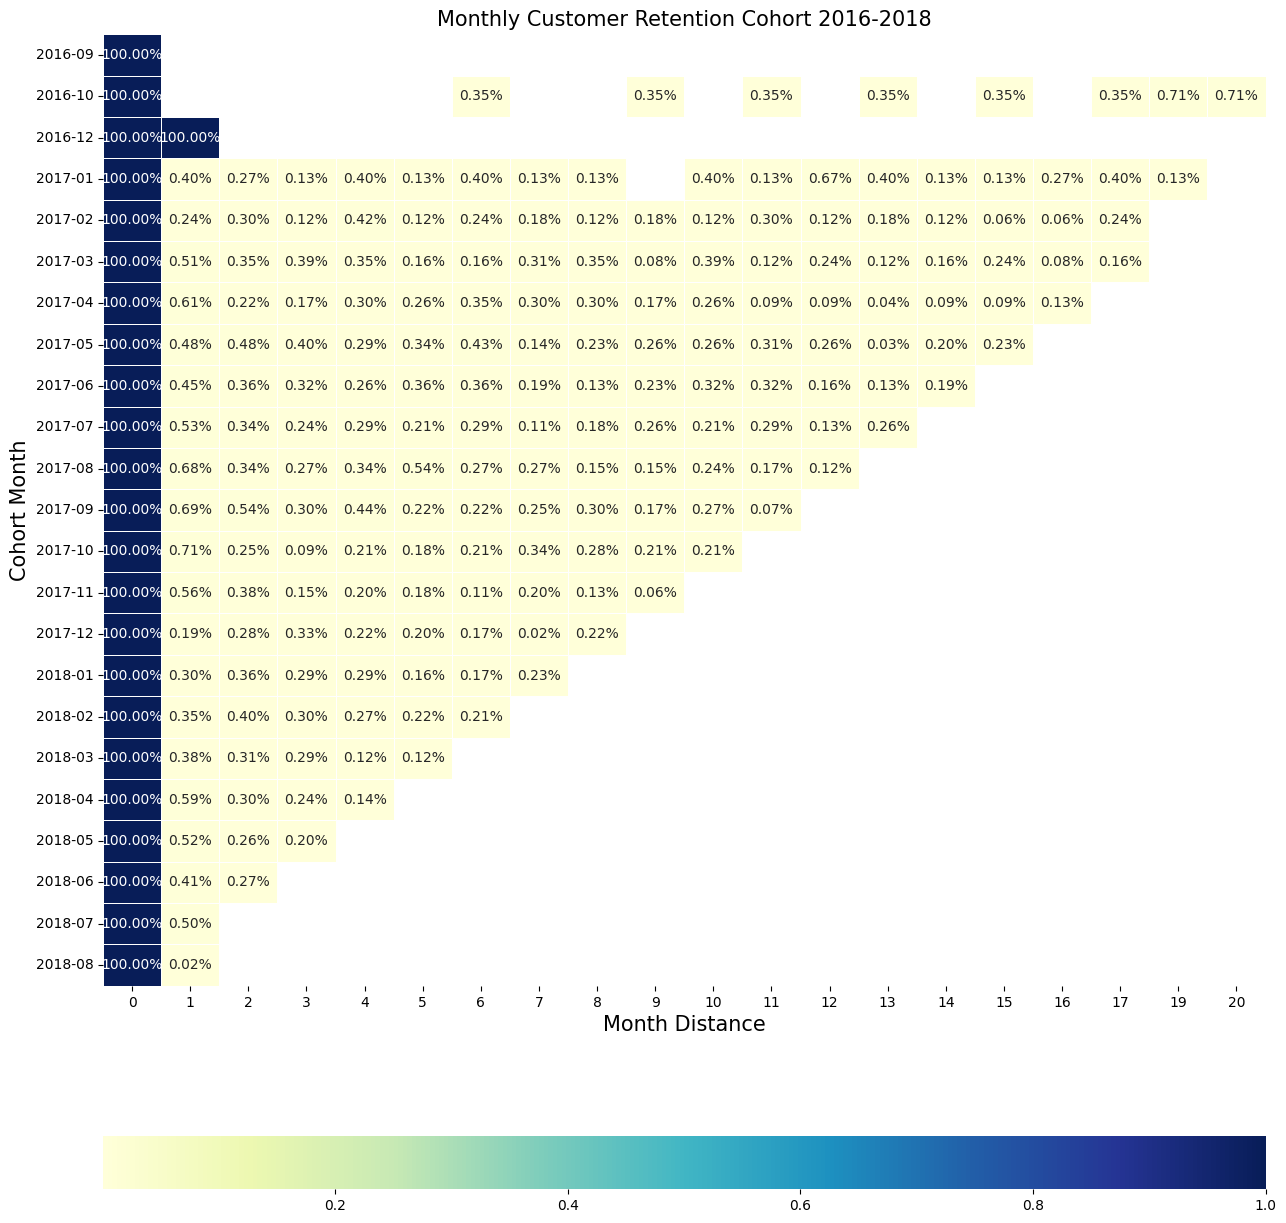

In [139]:
# Setup the space of plot
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(15,15))

# Create heatmap 
ax = sns.heatmap(retention_in_percentage, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 annot=True,
                 fmt = '.2%', 
                 linewidths=.5,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="YlGnBu")

# Set additional information
ax.set_title("Monthly Customer Retention Cohort 2016-2018",fontsize=15)
ax.set_ylabel("Cohort Month",fontsize=15) 
ax.set_xlabel("Month Distance",fontsize=15)
plt.show()

**Insight**:

Berdasarkan heatmap hasil cohort analysis di atas, terlihat bahwa persentase pengguna baru yang melakukan transaksi di bulan-bulan berikutnya tidak melebihi 1%. Hal ini menunjukkan bahwa hanya sebagian kecil dari pengguna yang kembali melakukan pembelian.

## **Customer Segmentation with RFM Analysis**

RFM Analysis adalah metode analisis pelanggan yang digunakan dalam pemasaran dan manajemen hubungan pelanggan (CRM) untuk mengklasifikasikan dan memahami perilaku pelanggan berdasarkan tiga dimensi utama: Recency (Ketidaklanjutan), Frequency (Frekuensi), dan Monetary (Moneter). Inisial "RFM" berasal dari tiga dimensi ini. Analisis ini dapat membantu bisnis untuk mengidentifikasi dan memahami segmen pelanggan yang berbeda, dan juga merancang strategi pemasaran yang lebih efektif.

In [140]:
rfm = df[['order_id','customer_unique_id','price','order_purchase_timestamp']].copy()

In [141]:
today = pd.to_datetime(rfm['order_purchase_timestamp'].max())

df_rfm = rfm.groupby(['customer_unique_id']).agg({'order_purchase_timestamp': lambda x: (today - x.max()).days,
                                                                              'order_id': 'count',
                                                                              'price': 'sum'})

df_rfm.rename(columns={
    'order_purchase_timestamp': 'recency',
    'order_id': 'frequency',
    'price': 'monetary'
}, inplace=True)

df_rfm.reset_index(inplace=True)

df_rfm.head()

customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90
2  0000f46a3911fa3c0805444483337064      541          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00

In [142]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94289 entries, 0 to 94288
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94289 non-null  object 
 1   recency             94289 non-null  int64  
 2   frequency           94289 non-null  int64  
 3   monetary            94289 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [143]:
df_rfm.isnull().sum()

customer_unique_id    0
recency               0
frequency             0
monetary              0
dtype: int64

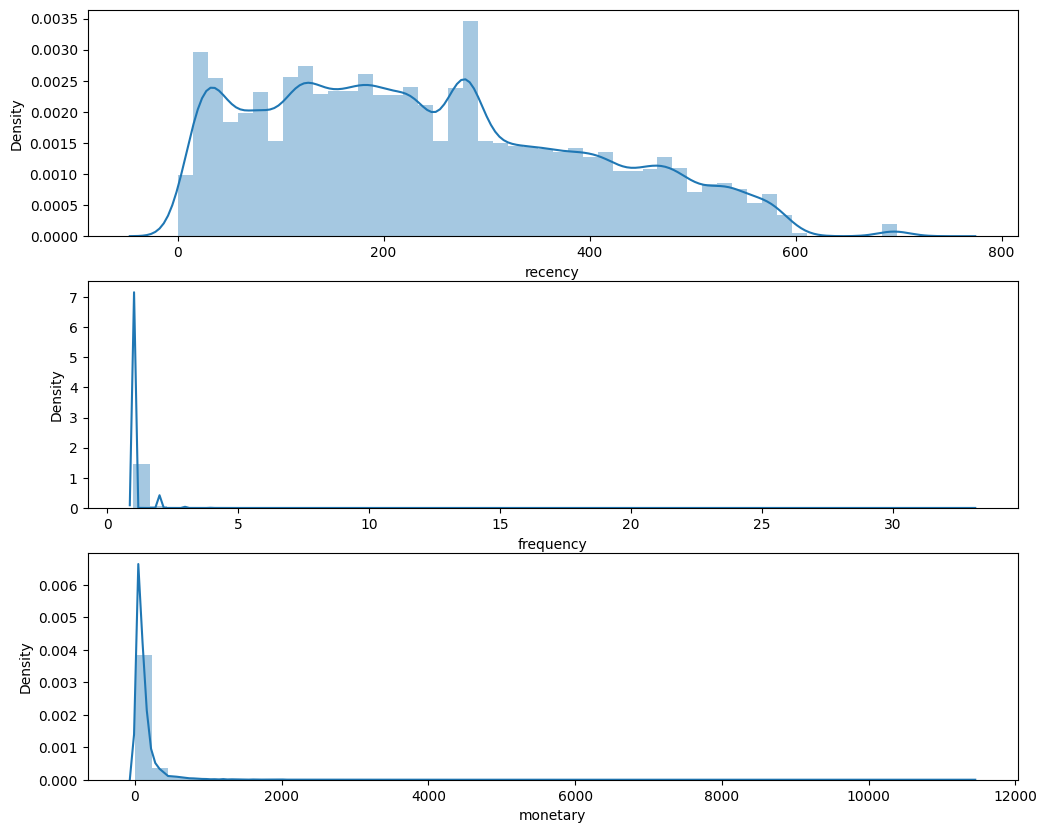

In [144]:
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(df_rfm['recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(df_rfm['frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(df_rfm['monetary'])

plt.show()

Dari histplot diatas terlihat bahwa kolom recency, monetary, dan frequency datanya terdistribusi tidak normal, karena itu kita akan menggunakan median untuk menentukan titik tengah / central tendency nya.

In [145]:
df_rfm['frequency'].value_counts(normalize=True)

frequency
1     0.941393
2     0.049200
3     0.005536
4     0.001708
5     0.000721
6     0.000530
7     0.000318
8     0.000127
9     0.000095
11    0.000074
12    0.000053
10    0.000053
13    0.000042
14    0.000032
15    0.000021
16    0.000021
19    0.000021
22    0.000011
26    0.000011
29    0.000011
33    0.000011
23    0.000011
Name: proportion, dtype: float64

In [146]:
df_rfm.describe()

recency     frequency      monetary
count  94289.000000  94289.000000  94289.000000
mean     242.280945      1.079574    135.613735
std      152.982835      0.458275    224.199007
min        0.000000      1.000000      0.850000
25%      118.000000      1.000000     44.900000
50%      223.000000      1.000000     80.900000
75%      351.000000      1.000000    149.000000
max      728.000000     33.000000  11383.950000

Berdasarkan exploratory data analysis diatas, terlihat bahwa sebagian besar pelanggan hanya melakukan sekali transaksi di Olist dengan persentase 94%. Karena feature frequency memiliki 22 values, dan nilai Q1, Q2, dan Q3 semuanya memiliki nilai yang sama (1), maka penentuan segmentasi akan dilakukan dengan pembagian sebagai berikut:

* Customer dengan frequency pembelian <=5 akan diberikan label f 1.
* Customer dengan frequency pembelian 6-10 akan diberikan label f 2.
* Customer dengan frequency pembelian 11-15 akan diberikan label f 3.
* Customer dengan frequency pembelian >16 akan diberikan label f 4.

Sedangkan pada monetary dan recency, akan dilakukan pembagian sebagai berikut:

* Customer dengan nilai monetary dan recency nya masing-masing <= Q1 akan diberikan label 1.
* Customer dengan nilai monetary dan recency nya masing-masing > Q1 & <= median akan diberikan label 2.
* Customer dengan nilai monetary dan recency nya masing-masing > median & <= Q3 akan diberikan label 3.
* Customer dengan nilai monetary dan recency nya masing-masing > Q3 akan diberikan label 4.

In [147]:
def rfm_monetary(x):
    lower_quartil=df_rfm['monetary'].quantile(.25)
    median=df_rfm['monetary'].median()
    upper_quartil=df_rfm['monetary'].quantile(.75)
    if x<=lower_quartil:
        return 1
    elif x > lower_quartil and x <= median:
        return 2
    elif x > median and x <= upper_quartil:
        return 3
    else:
        return 4

def rfm_recency(x):
    lower_quartil=df_rfm['recency'].quantile(.25)
    median=df_rfm['recency'].median()
    upper_quartil=df_rfm['recency'].quantile(.75)
    if x<=lower_quartil:
        return 1
    elif x > lower_quartil and x <= median:
        return 2
    elif x > median and x <= upper_quartil:
        return 3
    else:
        return 4

def rfm_frequency(x):
    if x <= 5:
        return 1
    elif x > 5 and x <= 10:
        return 2
    elif x > 10 and x <= 15:
        return 3
    else:
        return 4

In [148]:
df_rfm=df_rfm.assign(r= df_rfm['recency'].apply(lambda x : rfm_recency(x)),
                     f= df_rfm['frequency'].apply(lambda x : rfm_frequency(x)),
                     m= df_rfm['monetary'].apply(lambda x : rfm_monetary(x))
                    )

In [149]:
df_rfm['rfm_segment']=df_rfm['r'].map(str) + df_rfm['f'].map(str) + df_rfm['m'].map(str)
df_rfm.head()

customer_unique_id  recency  frequency  monetary  r  f  m  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90  1  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90  1  1  1   
2  0000f46a3911fa3c0805444483337064      541          1     69.00  4  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00  3  1  4   

  rfm_segment  
0         113  
1         111  
2         412  
3         311  
4         314

In [150]:
df_rfm['rfm_segment']=df_rfm['rfm_segment'].map(int)
df_rfm['rfm_score']=df_rfm[['r','f','m']].sum(axis=1)
df_rfm.head()

customer_unique_id  recency  frequency  monetary  r  f  m  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90  1  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90  1  1  1   
2  0000f46a3911fa3c0805444483337064      541          1     69.00  4  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00  3  1  4   

   rfm_segment  rfm_score  
0          113          5  
1          111          3  
2          412          7  
3          311          5  
4          314          8

In [151]:
df_rfm.describe()

recency     frequency      monetary             r             f  \
count  94289.000000  94289.000000  94289.000000  94289.000000  94289.000000   
mean     242.280945      1.079574    135.613735      2.497428      1.001856   
std      152.982835      0.458275    224.199007      1.118497      0.053579   
min        0.000000      1.000000      0.850000      1.000000      1.000000   
25%      118.000000      1.000000     44.900000      1.000000      1.000000   
50%      223.000000      1.000000     80.900000      2.000000      1.000000   
75%      351.000000      1.000000    149.000000      3.000000      1.000000   
max      728.000000     33.000000  11383.950000      4.000000      4.000000   

                  m   rfm_segment     rfm_score  
count  94289.000000  94289.000000  94289.000000  
mean       2.495381    262.256753      5.994665  
std        1.116915    111.858546      1.580402  
min        1.000000    111.000000      3.000000  
25%        1.000000    114.000000      5.000000  
50%        2.000000    214.000000      6.000000  
75%        3.000000    314.000000      7.000000  
max        4.000000    444.000000     12.000000

In [152]:
def rfm_level(df):
    if (df['rfm_segment'] >= 434 and (df['rfm_score'] >= 9)) :
        return 'VVIP - Can\'t Loose Them'
    elif ((df['rfm_score'] >= 6) and (df['f'] >= 2)) or ((df['rfm_score'] >= 8) and (df['r'] <= 2)):
        return 'Loyal Customers'
    elif ((df['rfm_segment'] >= 221) or (df['rfm_score'] >= 6)) or (((df['rfm_segment'] >= 121) and (df['r'] == 1)) or df['rfm_score'] == 5):
        return 'Need Attention'
    else:
        return 'Hibernating - Almost Lost'

In [153]:
df_rfm['customer_segment'] = df_rfm.apply(rfm_level, axis=1)

In [154]:
df_rfm.head()

customer_unique_id  recency  frequency  monetary  r  f  m  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90  1  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90  1  1  1   
2  0000f46a3911fa3c0805444483337064      541          1     69.00  4  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00  3  1  4   

   rfm_segment  rfm_score           customer_segment  
0          113          5             Need Attention  
1          111          3  Hibernating - Almost Lost  
2          412          7             Need Attention  
3          311          5             Need Attention  
4          314          8             Need Attention

In [155]:
rfm_level_agg = df_rfm.groupby('customer_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)

rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

customer_segment recency frequency monetary       
                                mean      mean     mean  count
0  Hibernating - Almost Lost    97.7       1.0     39.1  17751
1            Loyal Customers   253.3       7.7   1034.5    118
2             Need Attention   275.8       1.1    156.1  76402
3    VVIP - Can't Loose Them   485.9      16.1   2628.2     18

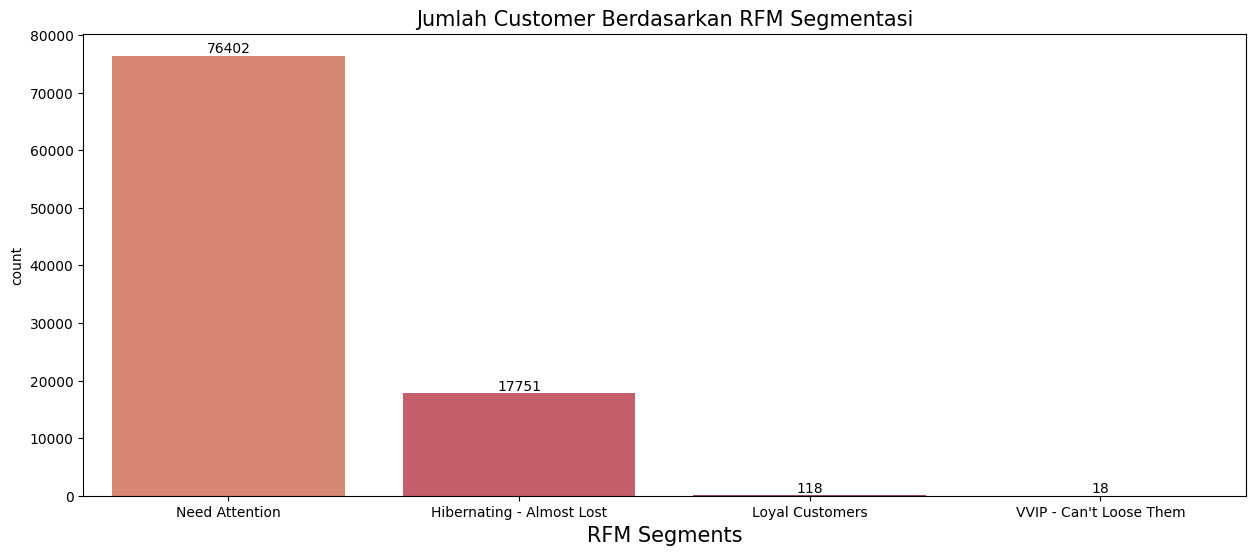

In [156]:
segment_counts = df_rfm['customer_segment'].value_counts()
sorted_segments = segment_counts.sort_values(ascending=False).index
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df_rfm, x='customer_segment', order=sorted_segments, palette='flare')
plt.xlabel('RFM Segments', size=15)
plt.title('Jumlah Customer Berdasarkan RFM Segmentasi', size=15)

for i, count in enumerate(segment_counts):
    ax.text(i, count + 0.1, f'{count}', ha='center', va='bottom', fontsize=10)

plt.show()

**Customer Segmentation menggunakan RFM dibagi berdasarkan** :

1. **VVIP - Can't Loose Them** : 
Pelanggan yang sebelumnya sering melakukan pembelian secara terus menerus dan mengeluarkan sejumlah besar uang, namun belakangan ini mereka sudah lama tidak melakukan pembelian. Penting untuk meraih kembali minat dari kelompok pelanggan ini di perusahaan. Grup ini mencerminkan sebagian pelanggan yang seiring waktu kehilangan minat terhadap perusahaan. Oleh karena itu, perusahaan perlu melakukan upaya untuk mendapatkan kembali perhatian dari kelompok pelanggan ini.

2. **Loyal Customers** : 
Melakukan pembelian dalam waktu dekat, terus menerus, dan mengeluarkan banyak uang, Mereka adalah top custemer yang mendukung perusahaan. Hubungan baik antar Olist dan kelompok customer ini perlu dijaga agar tetap terjalin dengan baik.

3. **Need Attention** : 
Melakukan pembelian dengan frekuensi kecil, namun masih memiliki potensi untuk menjadi loyal customers, menghabiskan uang dengan nominal tidak terlalu besar. Kelompok ini membutuhkan tindakan agar mereka dapat merasakan bahwa perusahaan (Olist) dapat menawarkan kondisi terbaik dan memenuhi kebutuhan mereka.

4. **Hibernating - Almost Lost** : 
Customer yang memiliki nilai rfm terkecil, dan berpotensi menjadi customer yang churn.

## **Customer Clustering with K-Means**

K-Means adalah salah satu algoritma pengelompokan atau klastering yang digunakan untuk mengelompokkan data ke dalam k kelompok atau klaster berdasarkan karakteristik yang serupa. Algoritma ini bekerja dengan cara meminimalkan varian (variance) dalam setiap klaster. Berikut adalah langkah-langkah cara kerja model K-Means:

![alt text](https://dosenit.com/wp-content/uploads/2023/06/cara-kerja-k-means.webp)

1. Pertama-tama tentukan jumlah klaster yang diinginkan (K) dan acak pilih K titik sebagai titik pusat awal klaster (centroid). Posisi awal pusat klaster dapat dipilih secara acak atau menggunakan metode inisialisasi khusus.
2. Kedua, hitung jarak antara setiap data dengan setiap titik pusat klaster. Pada langkah ini, data akan ditempatkan pada klaster yang memiliki pusat terdekat dengan data tersebut. Biasanya, jarak Euclidean digunakan sebagai metrik jarak antara data dan pusat klaster.
3. Setelah semua data ditempatkan pada klaster, hitung kembali pusat klaster baru dengan mengambil rata-rata dari semua data dalam klaster tersebut. Pusat klaster baru ini akan menjadi titik pusat baru untuk iterasi selanjutnya.
4. Ulangi langkah 2 dan 3 secara berulang sampai tidak ada perubahan dalam penempatan data pada klaster atau mencapai kondisi berhenti yang ditentukan sebelumnya. Dalam setiap iterasi, data akan ditempatkan kembali pada klaster yang sesuai berdasarkan perhitungan jarak terbaru, dan pusat klaster akan diperbarui.
5. Setelah iterasi berhenti, algoritma K-Means menghasilkan partisi data ke dalam K klaster yang berbeda. Setiap data akan tergabung dalam satu klaster berdasarkan kesamaan atributnya dengan data-data lain dalam klaster yang sama.

### **Preprocessing**

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101792 entries, 0 to 101791
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       101792 non-null  object        
 1   order_item_id                  101792 non-null  int64         
 2   product_id                     101792 non-null  object        
 3   seller_id                      101792 non-null  object        
 4   shipping_limit_date            101792 non-null  datetime64[ns]
 5   price                          101792 non-null  float64       
 6   freight_value                  101792 non-null  float64       
 7   payment_sequential             101792 non-null  int64         
 8   payment_type                   101792 non-null  object        
 9   payment_installments           101792 non-null  int64         
 10  payment_value                  101792 non-null  float64       
 11  

### **Feature Selection**

Di sini, kami tidak membutuhkan fitur kategorikal karena semua fitur kategorikal tidak relevan dengan tujuan pengelompokan. Kami juga tidak menggunakan fitur numerik yang tidak relevan seperti kode pos, garis lintang, dan garis bujur.

In [158]:
df_selected = df[['customer_unique_id',
            'order_item_id',
            'price',
            'freight_value',
            'payment_installments',
            'payment_sequential',
            'payment_value', 
            'product_name_lenght', 
            'product_description_lenght', 
            'product_photos_qty', 
            'product_weight_g', 
            'product_volume', 
            'population']].copy()

### **Grouping Based on customer_unique_id**

In [159]:
df_selected = df_selected.groupby(['customer_unique_id']).aggregate({
    'order_item_id':'sum',
    'price':'median', 
    'freight_value':'median', 
    'payment_installments':'median', 
    'payment_sequential':'median', 
    'payment_value':'median', 
    'product_name_lenght':'median', 
    'product_description_lenght':'median', 
    'product_photos_qty':'median', 
    'product_weight_g':'median', 
    'product_volume':'median', 
    'population':'max'
}).reset_index()

In [160]:
df_selected.head()

customer_unique_id  order_item_id   price  freight_value  \
0  0000366f3b9a7992bf8c76cfdf3221e2              1  129.90          12.00   
1  0000b849f77a49e4a4ce2b2a4ca5be3f              1   18.90           8.29   
2  0000f46a3911fa3c0805444483337064              1   69.00          17.22   
3  0000f6ccb0745a6a4b88665a16c9f078              1   25.99          17.63   
4  0004aac84e0df4da2b147fca70cf8255              1  180.00          16.89   

   payment_installments  payment_sequential  payment_value  \
0                   8.0                 1.0         141.90   
1                   1.0                 1.0          27.19   
2                   8.0                 1.0          86.22   
3                   4.0                 1.0          43.62   
4                   6.0                 1.0         196.89   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 60.0                       236.0                 1.0   
1                 56.0                       635.0                 1.0   
2                 49.0                       177.0                 3.0   
3                 43.0                      1741.0                 5.0   
4                 58.0                       794.0                 3.0   

   product_weight_g  product_volume  population  
0            1500.0          7616.0    44411238  
1             375.0          5148.0    44411238  
2            1500.0         43750.0     7610361  
3             150.0          1045.0     8121025  
4            6050.0           528.0    44411238

### **Adding New Features from RFM**

In [161]:
df_selected = pd.merge(df_selected, df_rfm[['customer_unique_id', 'recency', 'frequency']], 
                       on=['customer_unique_id'], how='left')

In [162]:
df_selected.head()

customer_unique_id  order_item_id   price  freight_value  \
0  0000366f3b9a7992bf8c76cfdf3221e2              1  129.90          12.00   
1  0000b849f77a49e4a4ce2b2a4ca5be3f              1   18.90           8.29   
2  0000f46a3911fa3c0805444483337064              1   69.00          17.22   
3  0000f6ccb0745a6a4b88665a16c9f078              1   25.99          17.63   
4  0004aac84e0df4da2b147fca70cf8255              1  180.00          16.89   

   payment_installments  payment_sequential  payment_value  \
0                   8.0                 1.0         141.90   
1                   1.0                 1.0          27.19   
2                   8.0                 1.0          86.22   
3                   4.0                 1.0          43.62   
4                   6.0                 1.0         196.89   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 60.0                       236.0                 1.0   
1                 56.0                       635.0                 1.0   
2                 49.0                       177.0                 3.0   
3                 43.0                      1741.0                 5.0   
4                 58.0                       794.0                 3.0   

   product_weight_g  product_volume  population  recency  frequency  
0            1500.0          7616.0    44411238      115          1  
1             375.0          5148.0    44411238      118          1  
2            1500.0         43750.0     7610361      541          1  
3             150.0          1045.0     8121025      325          1  
4            6050.0           528.0    44411238      292          1

In [163]:
df_ml = df_selected.copy()
df_ml = df_ml.drop(['customer_unique_id'], axis=1)

### **Missing Value**

In [164]:
df_ml.isnull().sum()

order_item_id                 0
price                         0
freight_value                 0
payment_installments          0
payment_sequential            0
payment_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_volume                0
population                    0
recency                       0
frequency                     0
dtype: int64

### **Scalling**

In [165]:
scaler=StandardScaler()
pca=PCA(n_components=2)
pipeline=Pipeline([
    ('preprocess',scaler),
    ('PCA',pca)
])

In [166]:
x_pca=pipeline.fit_transform(df_ml)

In [167]:
variance=[]

for i in range(2):
    variance.append(np.var(x_pca[:,i]))
print('informasi yang tersimpan pada 2 komponen pertama',round(sum(variance[:2])/sum(variance)*100,2),'%')

informasi yang tersimpan pada 2 komponen pertama 100.0 %


In [168]:
x_pca=pd.DataFrame(x_pca)
x_pca

0         1
0      -0.172863 -0.379614
1      -1.500271 -0.394484
2       0.595457 -0.228514
3      -0.548025 -0.391724
4       0.552847 -0.278817
...          ...       ...
94284  18.946325  2.826210
94285  -0.223504 -0.237110
94286  -0.409034 -0.291495
94287  -0.225821 -0.372891
94288  -0.656380 -0.354432

[94289 rows x 2 columns]

### **Silhouette Score**
Pertama kita akan melihat siluet skor untuk setiap jumlah cluster

In [169]:
score=[]
k_num= range(2,8)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(x_pca)
    labels=kmean.labels_
    sil_score=(silhouette_score(x_pca,labels,metric='euclidean'))
    score.append(sil_score)
    
    if best<sil_score:
        best=sil_score
        best_k=i

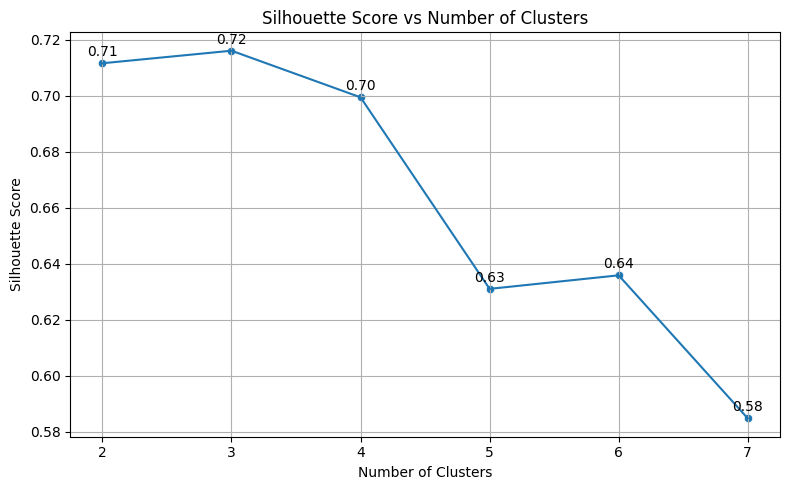

In [170]:
plt.figure(figsize=(8,5))

sns.scatterplot(x=k_num, y=score)
sns.lineplot(x=k_num, y=score)
plt.grid(True)
plt.title('Silhouette Score vs Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')

for x,y in zip(k_num, score):
    label = "{:.2f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')
plt.tight_layout()
plt.show()

Berdasarkan hasil dari sillhouette score diatas, nilai silhouette score terbesar adalah 3 cluster dengan score 0,72. Namun kami membutuhkan 4 cluster untuk mendapatkan hasil cluster yang lebih beragam. Sehingga kami memilih 4 cluster yang terbentuk dengan nilai silhouette score 0,70.

### **Elbow Method**
Kedua, kita akan memilih jumlah cluster yang optimal untuk dataset. Pada bagian ini, kita akan menggunakan Elbow Method.

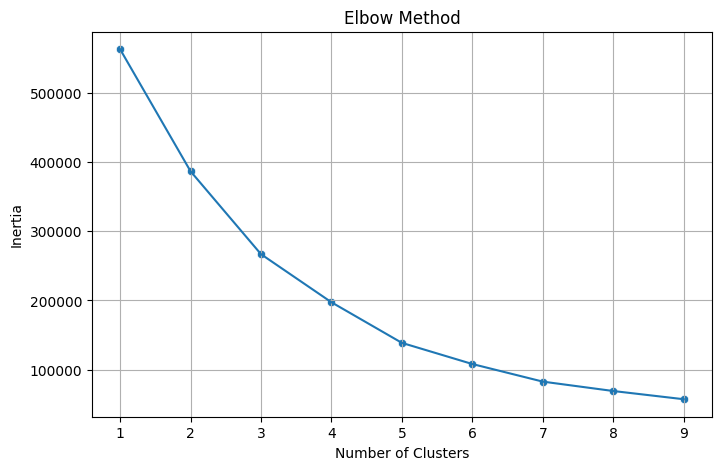

In [171]:
k=range(1,10)
inertia=[]
plt.figure(figsize=(8,5))
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x_pca)
    inertia.append(model.inertia_)

sns.lineplot(x=k, y=inertia)
sns.scatterplot(x=k, y=inertia)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

Dari Elbow Method, jumlah cluster yang optimal adalah antara 3 atau 4.

In [172]:
kmeans=KMeans(n_clusters=4, random_state=2020)
kmeans.fit(x_pca)
labels = kmeans.labels_

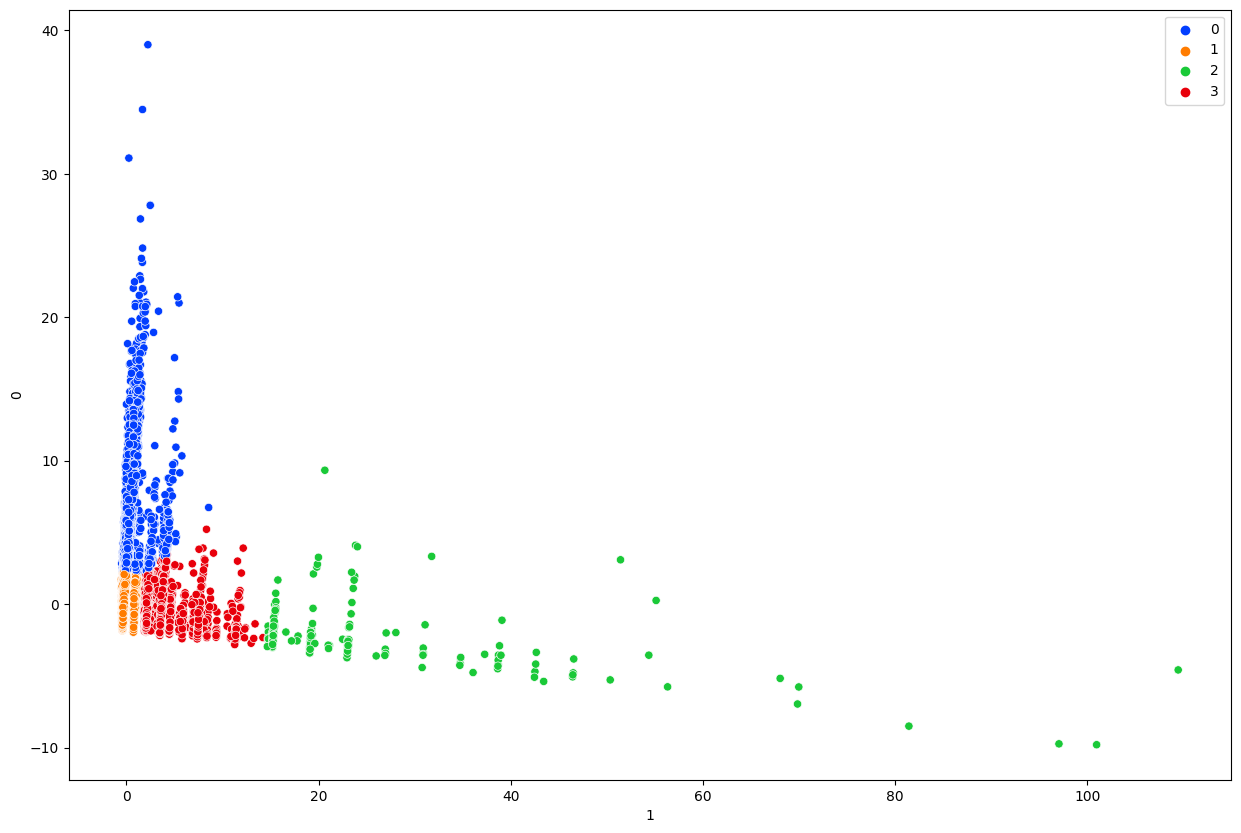

In [173]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_pca[1],y=x_pca[0],hue=labels, palette='bright')
plt.show()

   ### ----------------------------------------**EDA after Clustering**----------------------------------------

### **Ciri-ciri umum setiap klaster**

In [174]:
df_selected['labels'] = labels

In [175]:
df_num = df_selected.select_dtypes(include='number')

In [176]:
df_num.groupby('labels').mean()[['price','freight_value','product_weight_g','product_volume','payment_installments','payment_sequential','recency','frequency']]

price  freight_value  product_weight_g  product_volume  \
labels                                                                
0       510.377623      53.632915      10743.172039    64453.194137   
1        95.635970      17.540089       1404.828752    11216.428425   
2       132.126497      22.943164       3187.189266    23236.906780   
3       100.549442      18.363988       1699.074492    13001.209304   

        payment_installments  payment_sequential     recency  frequency  
labels                                                                   
0                   5.616613            1.006637  245.746062   1.025963  
1                   2.702588            1.000000  241.930409   1.000000  
2                   1.039548            4.053672  278.706215   7.881356  
3                   2.483125            1.287899  242.001678   2.138728

In [185]:
df_num['labels'].value_counts()

labels
1    81893
0     6856
3     5363
2      177
Name: count, dtype: int64

- Cluster 0: pelanggan yang membeli produk dengan harga mahal, berat, dan besar. Pelanggan golongan ini juga membayar dengan jumlah angsuran paling tinggi yaitu 5-6 kali, namun tingkat frekuensi pembeliannya rendah yaitu hanya sekitar 1 kali. kami menyebut kelompok ini sebagai Big Spenders.
- Cluster 1: pelanggan yang membeli produk murah, ringan, dan kecil. Pelanggan golongan ini juga membayar dengan jumlah angsuran pembayaran yang sedang yaitu 2-3 kali, serta memiliki tingkat frekuensi pembelian yang rendah yaitu hanya sekitar 1 kali. Namun pelanggan tipe ini memiliki jumlah yang sangat besar sehingga kami menyebutnya sebagai Need Attention.
- Cluster 2:  Pelanggan yang membeli produk dengan harga sedang, dimensi produk juga sedang. Pelanggan tipe ini melakukan pembayaran tanpa cicilan namun menggunakan beberapa metode pembayaran dan pelanggan tipe ini juga memiliki frekuensi pembelian yang tinggi yaitu sekitar 7-8 kali, sehingga kami menyebutnya sebagai Loyal Customers.
- Cluster 3: mirip seperti cluster 1, pelanggan tipe ini juga membeli produk murah, ringan, dan kecil serta membayar dengan jumlah angsuran yang sedang yaitu 2-3 kali. Bedanya kelompok ini memiliki tingkat frekuensi pembelian rata-rata 2 kali sehingga berpotensi menjadi loyal customers sehingga kami menyebut kelompok ini sebagai Potential Loyalist.

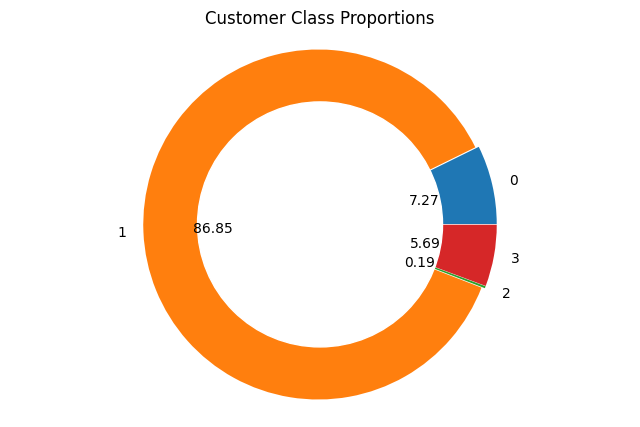

In [177]:
plt.figure(figsize=(8,5))
df_selected.groupby('labels').size().plot(kind='pie', autopct='%.2f', explode=(0.01,0.01,0.01,0.01))

plt.title('Customer Class Proportions')
plt.axis('equal')
my_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Terlihat dari diagram lingkaran di atas, pelanggan Olist masih didominasi oleh cluster 1 atau kelompok Need Attention. Oleh karena itu, kita perlu memperhatikan kelompok ini agar mereka tidak churn dan berusaha membuat mereka menjadi pelanggan yang loyal.

Untuk analisis selanjutnya, kami akan melakukan join data hasil clustering dan data sebelum dilakukan modelling karenakan ada data yang diperlukan analisis yang tidak dimasukkan ke dalam modelling.

In [178]:
df_cluster = df_selected.copy()
df_clean = df.drop_duplicates(subset='customer_unique_id')

In [179]:
eda_cluster = pd.merge(df_cluster, df_clean, on='customer_unique_id', how='inner', suffixes=('_cluster', '_clean'))
eda_cluster.columns = eda_cluster.columns.str.replace('_cluster', '').str.replace('_clean', '')

### **Top 5 kategori produk yang dibeli pada setiap klaster**

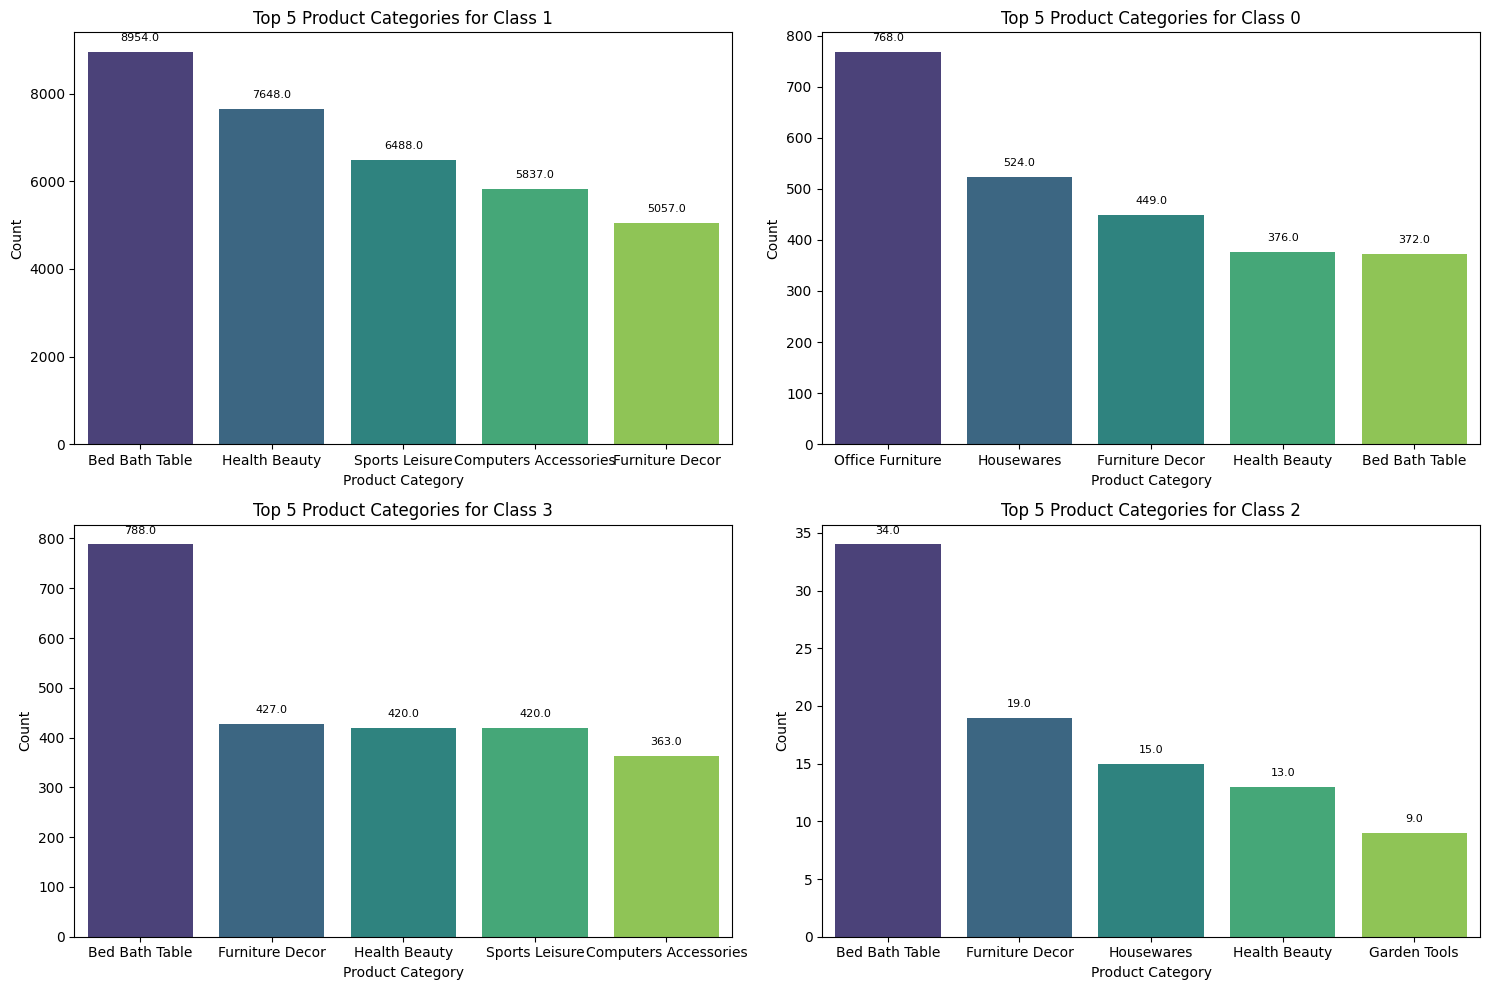

In [180]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, label in enumerate(eda_cluster['labels'].unique()):
    subset_df = eda_cluster[eda_cluster['labels'] == label]
    ax = axes[i]
    sns.countplot(x='product_category_name_english', data=subset_df,
                  order=subset_df['product_category_name_english'].value_counts().head().index,
                  palette='viridis', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    ax.set_title(f'Top 5 Product Categories for Class {label}')
    ax.set_xlabel('Product Category')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

#### **Product Category Name**
Barplot diatas merupakan hasil visualisasi top 5 product yang dibeli pada masing - masing cluster.
Jika dilihat, product category dengan Bed Bath Table merupakan produk yang paling banyak dibeli pada mayoritas cluster yang ada hanya Cluster 0 saja yang tidak menjadi cluster dengan pembelian Bed Bath Table terbanyak.
Cluster 0 atau dalam hal ini disebut dengan Big Spenders merupakan cluster tipe customer yang memiliki jenis pembelian produk paling mahal dengan membeli barang yang memiliki dimensi lebih berat, maka memang pada pelanggan Cluster 0 ini Product Office Furniture menjadi product yang paling banyak dibeli.
Dikarenakan mayoritas pelanggan pada keseluruhan cluster ada pada Product Bed Bath Table maka kita dapat melakukan pembuatan iklan terkait dengan barang - barang yang terkategori sebagai Bed Bath Table seperti pembuatan paket set yang menarik sehingga akan membuat penjualan Bed Bath Table semakin meningkat. Kita juga harus memperhatikan terkait dengan pelanggan yang terkategori Cluster 0 ataupun Big Spenders karena ini merupakan pelanggan yang paling tinggi melakukan pembeliannya sehingga kita juga bisa memberikan rekomendasi desain terkait dengan Product Office Furniture.

### **Top 5 Payment method yang digunakan customer untuk setiap cluster**

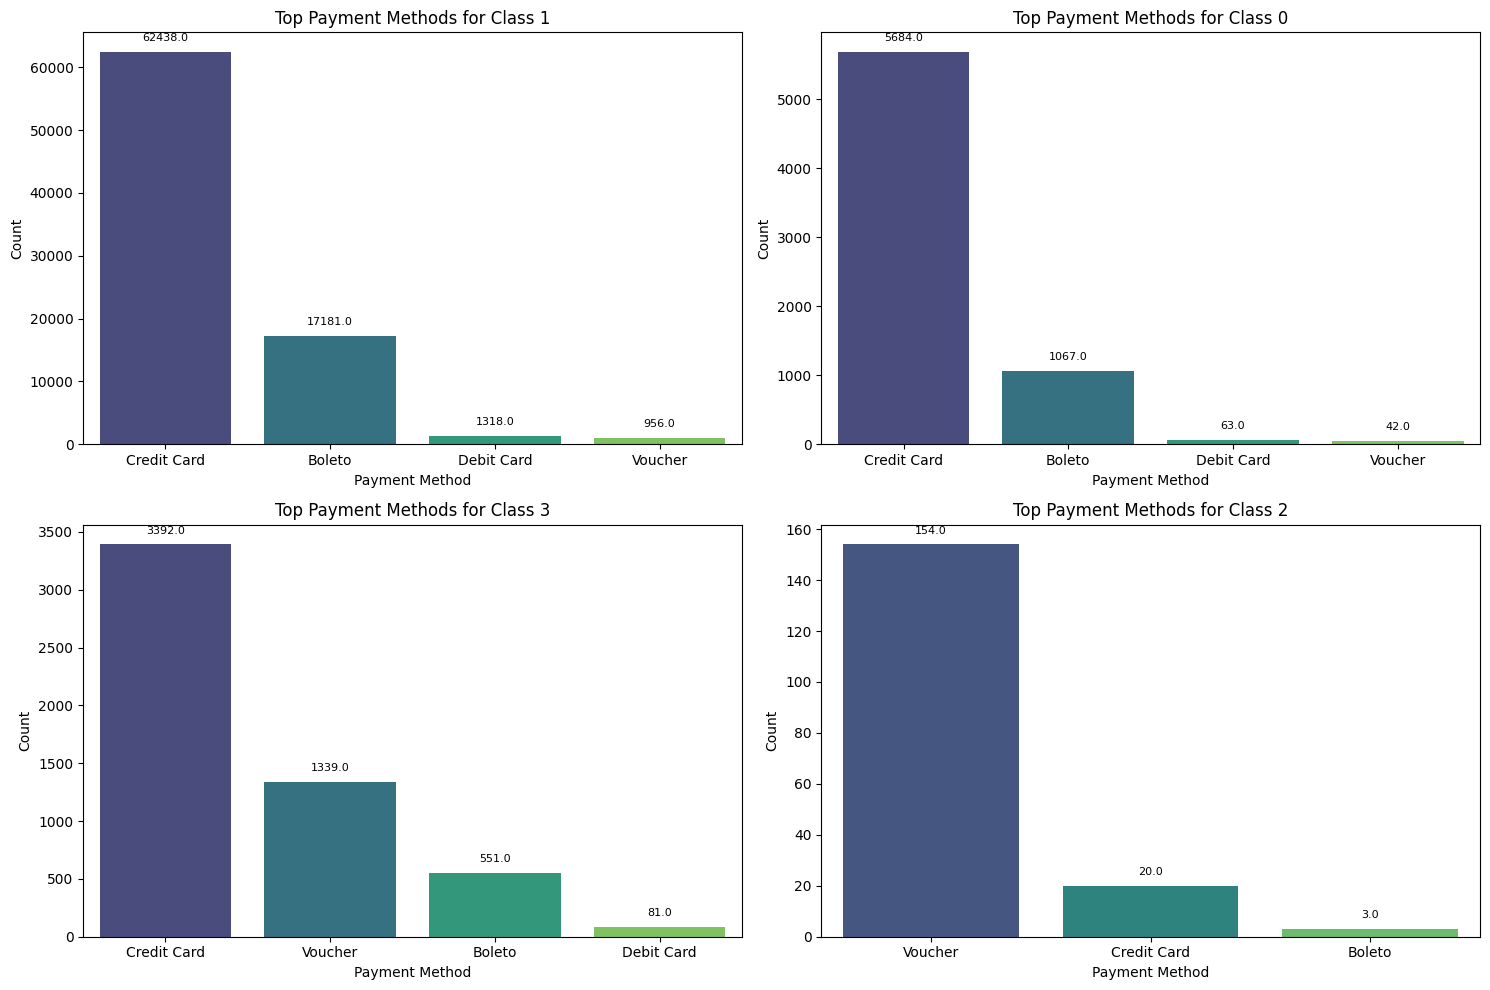

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, label in enumerate(eda_cluster['labels'].unique()):
    subset_df = eda_cluster[eda_cluster['labels'] == label]
    ax = axes[i]
    sns.countplot(x='payment_type', data=subset_df,
                  order=subset_df['payment_type'].value_counts().index,
                  palette='viridis', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    ax.set_title(f'Top Payment Methods for Class {label}')
    ax.set_xlabel('Payment Method')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

#### **Payment Type**
Secara umum tipe pembayaran yang digunakan pada keseluruhan cluster pelanggan adalah Kartu Kredit yang merupakan tipe pembayaran paling banyak digunakan. Namun untuk Cluster 2 atau dalam hal ini disebut dengan Loyal Customers dimana merupakan pelanggan yang memiliki jumlah pembelian terbanyak atau bisa disebut dengan pelanggan yang sering melakukan pembelian, memiliki tipe pembayaran paling tinggi adalah Voucher yang memiliki arti kemungkinan banyaknya pembelian dalam Olist Store ini membuat pelanggan mendapatkan sebuah Voucher untuk belanja.
Berdasarkan hal ini untuk Cluster 2 ataupun Loyal Customers kita bisa memberikan sebuah loyalty program dengan harapan pelanggan dengan loyalitas tinggi akan mendapatkan sebuah poin yang dapat digunakan untuk melakukan pembelian.
Kemudian terkait dengan Tipe Pembayaran yang menggunakan kartu kredit, langkah yang dapat dilakukan adalah memperbanyak kerjasama dengan kartu kredit yang ada di wilayah tersebut sehingga memungkinkan pelanggan dapat melakukan pembayaran dengan kartu kredit dengan pilihan jenis kartu kredit yang banyak.

### **Top 5 Region dengan customer terbanyak untuk setiap cluster**

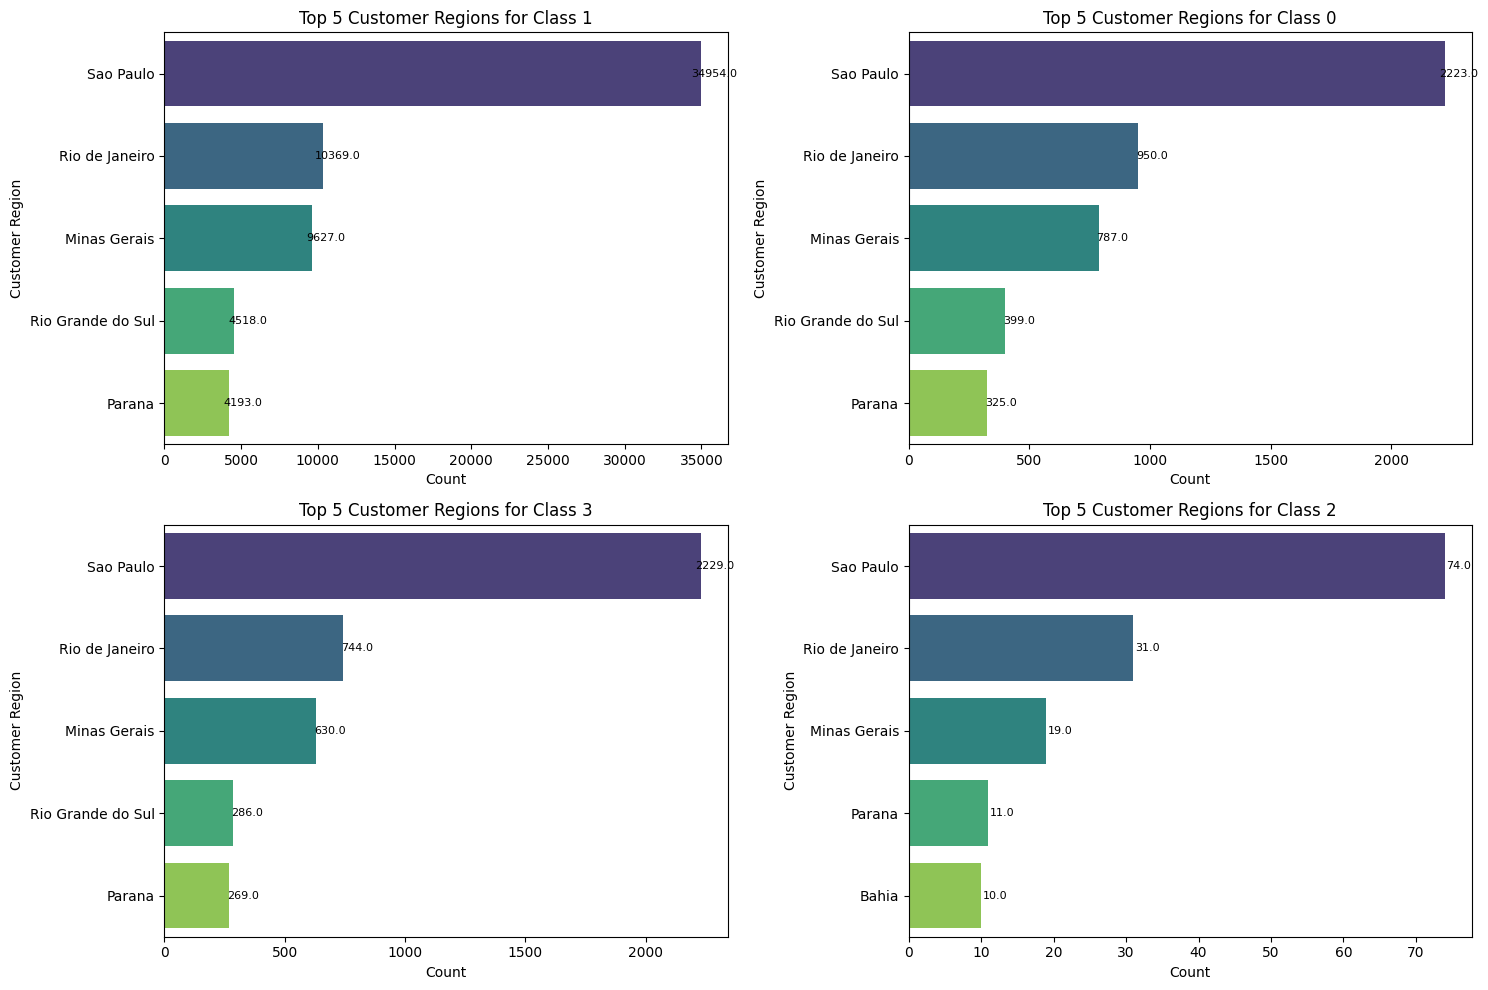

In [182]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, label in enumerate(eda_cluster['labels'].unique()):
    subset_df = eda_cluster[eda_cluster['labels'] == label]
    ax = axes[i]
    sns.countplot(y='customer_state', data=subset_df,
                  order=subset_df['customer_state'].value_counts().head().index,
                  palette='viridis', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=8)
    ax.set_title(f'Top 5 Customer Regions for Class {label}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Customer Region')
plt.tight_layout()
plt.show()

#### **State**
Berdasarkan hasil visualisasi barplot kita dapat melihat untuk States ataupun Negara Bagian yang memiliki jumlah customer tertinggi yaitu adalah Sao Paulo, kemudian untuk top Negara Bagian lainnya pada kesluruhan cluster berdasarkan jumlah Customer terbanyak secara mayoritas berada pada Rio de Janiero, Minas Gerais, Rio Grande do Sul, Parana, dan Bahia. Jika dilihat berdasarkan batas administrasi. Wilayah tersebut berada pada Southeast Region ataupun memang wilayah yang letaknya berdekatan pada Central Business District di Brazil yaitu Rio de Janiero dan Sao Paulo.
Kota Sao Paulo merupakan wilayah metropolitan terbesar ke-7 di Dunia dan merupakan jumlah penduduk terbesar di Brazil. Sehingga menjadi sangat memungkinkan bahwa perputaran ekonomi terjadi di sekitar wilayah tersebut.
Dengan fakta berikut kita dapat menambahkan rekomendasi untuk melakukan pembuatan fitur COD (Cash On Delivery) jika penjual dan pelanggan memang berada di wilayah tersebut sehingga dapat meningkatkan kepercayaan pelanggan terhadap product yang dibeli serta mempercepat proses pembelian.

### **Delivery dan delay times untuk top 5 region untuk setiap cluster**

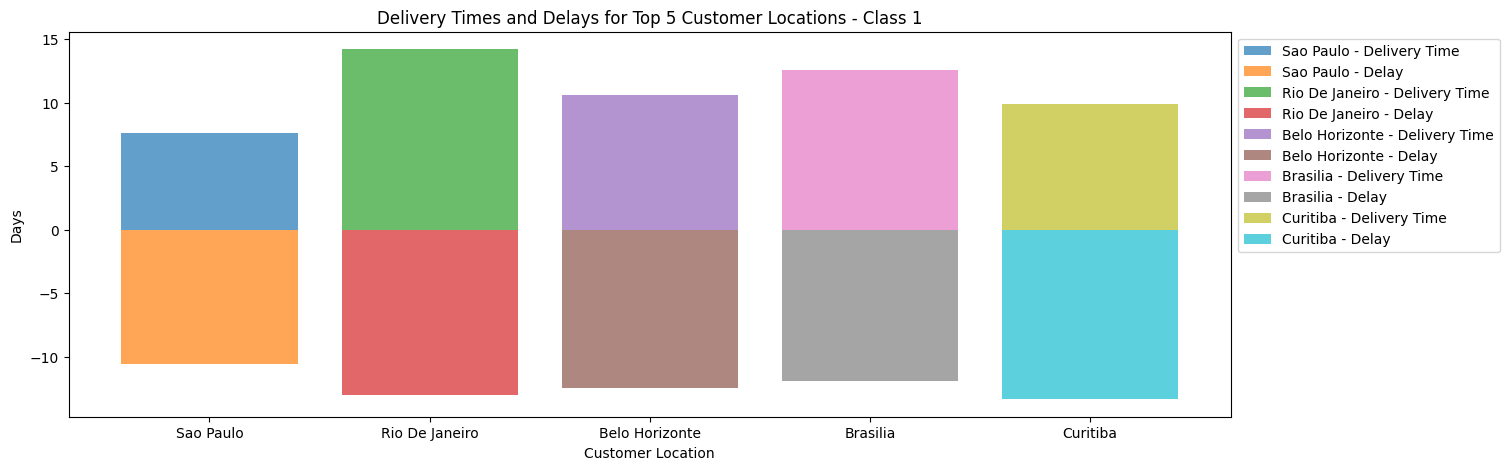

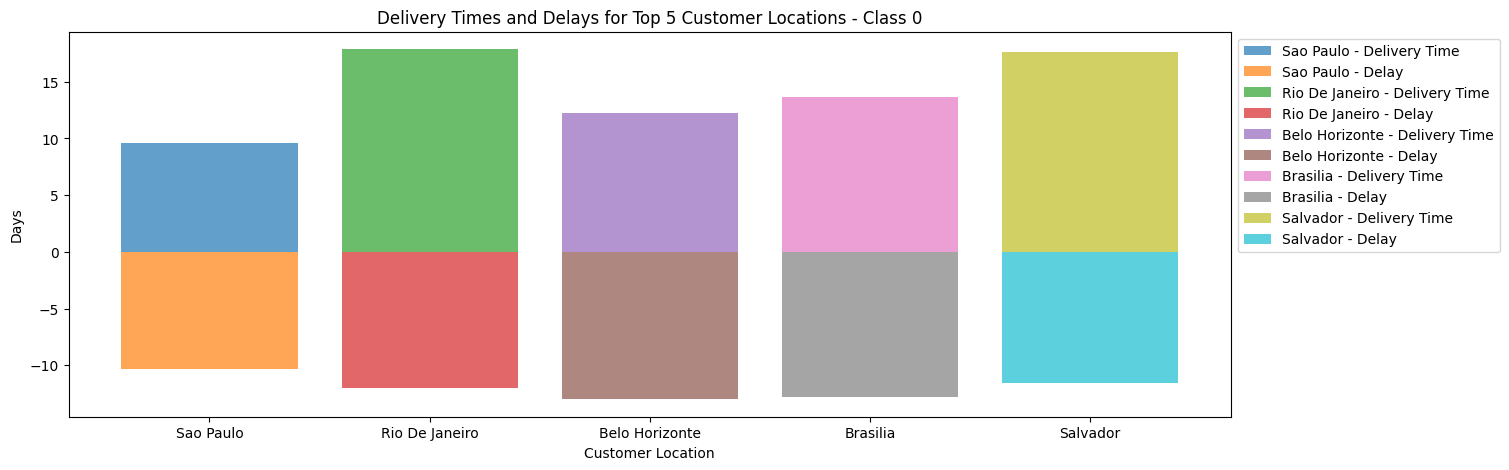

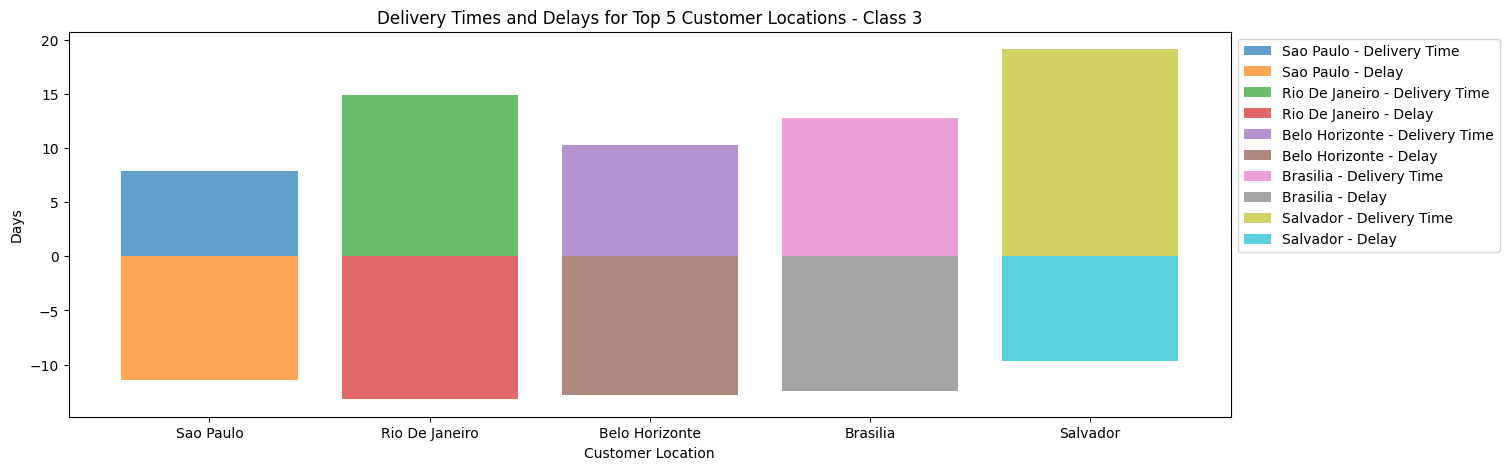

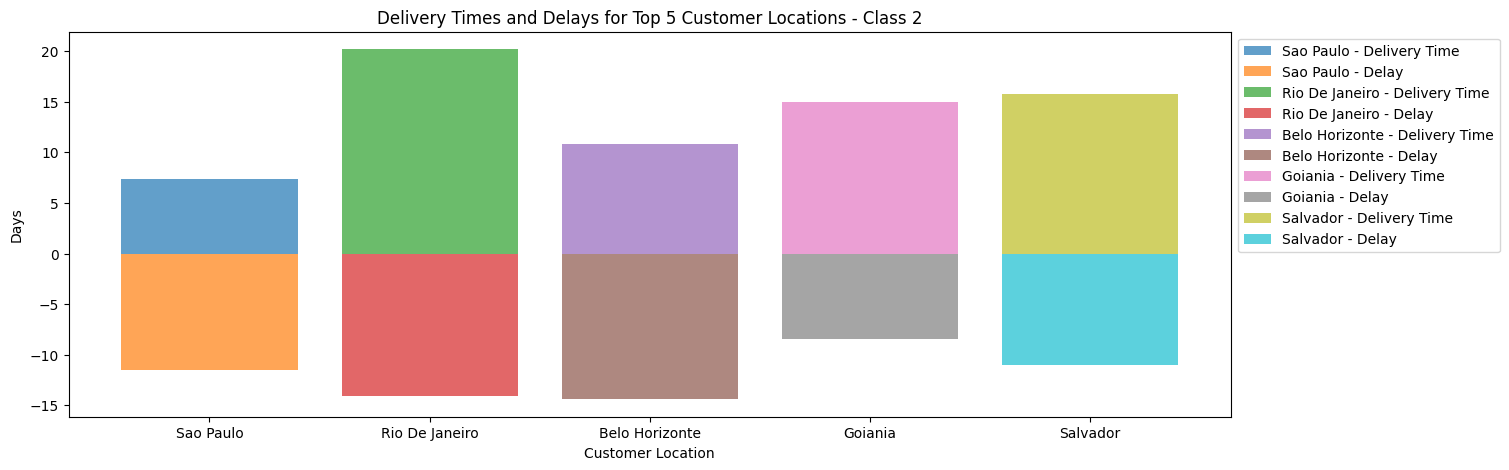

In [183]:
eda_cluster['delivery_date'] = pd.to_datetime(eda_cluster['order_delivered_customer_date'], errors='coerce')
eda_cluster['estimated_delivery_date'] = pd.to_datetime(eda_cluster['order_estimated_delivery_date'], errors='coerce')

eda_cluster = eda_cluster.dropna(subset=['delivery_date', 'estimated_delivery_date'])

eda_cluster['delivery_time'] = (eda_cluster['delivery_date'] - pd.to_datetime(eda_cluster['order_purchase_timestamp'])).dt.days
eda_cluster['delay'] = (eda_cluster['delivery_date'] - eda_cluster['estimated_delivery_date']).dt.days

def plot_delivery_info_by_location(class_label):
    plt.figure(figsize=(15, 5))
    
    subset_df = eda_cluster[eda_cluster['labels'] == class_label]
    
    top_locations = subset_df['customer_city'].value_counts().head(5).index
    
    for location in top_locations:
        location_data = subset_df[subset_df['customer_city'] == location]
        
        plt.bar(location, location_data['delivery_time'].mean(), label=f'{location} - Delivery Time', alpha=0.7)
        
        plt.bar(location, location_data['delay'].mean(), label=f'{location} - Delay', alpha=0.7)
    
    plt.title(f'Delivery Times and Delays for Top 5 Customer Locations - Class {class_label}')
    plt.xlabel('Customer Location')
    plt.ylabel('Days')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    
    plt.show()

for label in df_selected['labels'].unique():
    plot_delivery_info_by_location(label)

**Insight** :

Delivery times berarti rata - rata waktu yang diperlukan untuk produk melakukan perjalanan dari sellers ke customers. Sedangkan untuk delay times adalah rata - rata waktu keterlambatan pengantaran produk dari sellers ke customers berdasarkan estimated delivery times. Dapat dilihat dari hasil visualisasi diatas adalah untuk delivery dan delay times untuk top 5 keseluruhan customer locations yang ada pada Olist untuk setiap clusternya

#### **Delivery dan delay times untuk cluster 0** : 
Dapat dilihat untuk cluster 0 (Big Spender), bahwa pengiriman terlama ada untuk customer yang terletak pada kota Rio De Janeiro. Sedangkan untuk delay times paling tinggi untuk kota Belo Horizonte dan delay paling sedikit terletak pada kota Sao Paolo. Dikarenakan cluster 0 merupakan big spender yang berarti para customer di kelas ini cenderung untuk menghabiskan uang dalam jumlah yang besar pada Olist. Maka, dapat dilakukan rekomendasi sebagai berikut untuk cluster ini:

- Diberikan insentif khusus untuk pengiriman bagi customer pada kelas ini. Karena, dari visualisasi dapat dilihat bahwa rata - rata pengiriman dari seller ke customer pada cluster ini masih cenderung tinggi yaitu diatas 10 hari. Oleh karena itu, diberikan insentif bagi partner logistik untuk pengiriman kilat dikarenakan customer dengan cluster ini rela untuk spend uang lebih banyak dibandingkan dengan cluster yang lainnya.
- Diperlukan penanganan secara pemberitahuan saja untuk keterlambatan pada cluster ini. Karena, cluster ini cenderung untuk membeli dengan amount yang tinggi sehingga cashback ataupun semacam free gift ataupun voucher yang dapat ditukar apabila keterlambatan tidak efektif bagi Olist untuk diberikan. Cluster ini cukup diinformasikan saja apabila terjadi keterlambatan beserta alasannya agar customer mendapat informasi secara baik.

#### **Delivery dan delay times untuk cluster 1** : 
Cluster 1 (Need Attention), merupakan cluster yang menghabiskan uang sedikit dengan frekuensi yang sedikit juga. Oleh karena itu, perlu diperhatikan secara khusus agar customer pada cluster ini tetap melakukan pembelian di Olist. Dapat dilihat bahwa secara keseluruhan, Rio de Janeiro memiliki delivery times tertinggi dan Curitiba yang memiliki delay times paling tinggi. Oleh karena itu rekomendasi yang dapat diberikan pada cluster ini adalah:

- Diberikan diskon untuk pengiriman ke Rio de Janeiro dikarenakan pengiriman yang lama agar customer tertarik untuk membeli melalui Olist dan memiliki competitive advantages.
- Diberikan voucher apabila terjadi delay untuk cluster ini, terutama untuk region Curitiba agar customer dapat lebih tertarik untuk tetap menggunakan Olist.

#### **Delivery dan delay times untuk cluster 2** : 
Cluster 2 (Loyal Customer), merupakan cluster customers yang menghabiskan uang dengan jumlah yang considerate dan juga dengan frekuensi paling tinggi dibandingkan dengan cluster customer yang lainnya. Dapat dilihat bahwa delivery times paling tinggi terletak pada kota Rio de Janeiro dan untuk delay times paling tinggi terletak pada kota Belo Horizonte dan juga Rio de Janeiro. Yang direkomendasikan untuk cluster ini adalah:

- dikarenakan customer ini sudah melakukan transaksi dengan frekuensi yang tinggi. Maka, untuk treatment terhadap delivery dan delay times sudah tidak diperlukan lagi untuk cluster ini untuk lebih mengefisiensikan waktu.

#### **Delivery dan delay times untuk cluster 3** : 
Cluster 3 (Potential Loyalist), merupakan cluster customers yang menghabiskan uang dengan jumlah middle dan frekuensi beli middle-low. Dapat dilihat pada visualisasi bahwa delivery times paling lama terletak pada kota Salvador (mendekati 20 hari) dan yang kedua adalah kota Rio de Janeiro. Sedangkan, untuk delay times pada cluster ini paling tinggi terletak pada region Rio de Janeiro dan Belo Horizonte. Rekomendasi yang diberikan pada cluster ini adalah:

- memberikan promo khusus untuk cluster ini apabila terjadi delay dikarenakan ini merupakan customer yang memiliki potensi tinggi untuk menjadi loyal.
- dilakukan pencarian partner logistik yang baru untuk kota Salvador untuk cluster ini dikarenakan pengiriman yang relatif sangat lama khusus untuk kota ini.
- selain diberikan promo, diberikan voucher pembelian untuk cluster ini apabila terjadi delay dikarenakan potensi yang tinggi untuk menjadi loyal customer.

## **Conclusion**

Berdasarkan problem statement yang kami sampaikan diawal, permasalahan utama yang dihadapi oleh perusahaan adalah 99% pelanggan tidak melakukan pembelian ulang setelah melakukan transaksi pertamanya di e-commerce olist dimana angka tersebut kami dapat dari cohort analysis. Untuk mengetahui lebih lanjut dan memecahkan permasalah tersebut, kami melakukan segmentasi pelanggan dengan menggunakan RFM Analysis dan melakukan modelling dengan menggunakan K-Means Clustering. Adapun hasil yang kami temukan adalah sebagai berikut:

#### RFM Analysis

RFM Analysis yang kami buat telah menghasilkan segmentasi yang cukup beragam dimana terdiri dari 4 cluster. Namun, meskipun interpretasi setiap kluster sudah cukup memuaskan, penentuan setiap segmennya terlalu subjektif karena tidak didasarkan pada hasil algoritma, melainkan ditentukan berdasarkan pengetahuan domain. Oleh karena itu, kami tidak dapat memvalidasi hasil segmentasi tersebut. Alasan utama kenapa kami tetap menggunakan RFM Analysis adalah sebagai perbandingan dari segmentasi yang kami buat dengan menggunakan algoritma K-Means.

#### K-Means Clustering

Customer segmentation yang kami buat dengan menggunakan metode algoritma K-Means terlihat lebih baik dan mudah diinterpretasikan. Berdasarkan hasil segmentasi tersebut, ada 4 cluster yang terbentuk dengan nilai silhoutte score mencapai 0,70. Pemilihan model ini dilakukan karena pembagian klusternya telah memberikan hasil yang diinginkan, dimana karakteristik setiap clusternya tampak berbeda cukup signifikan. Dengan adanya cluster ini, kami dapat menentukan target segmen yang diutamakan untuk mengatasi permasalahan yang dihadapi oleh perusahaan.

Dari hasil segmentasi tersebut, pelanggan dengan cluster 1 atau kami menyebutnya kelompok Need Attention adalah kelompok yang paling mendominasi, yaitu sekitar 86,85% dari seluruh pelanggan yang ada. Artinya kelompok ini memiliki potensi yang sangat besar jika perusahaan berhasil menarik minat mereka untuk kembali melakukan pembelian ulang di e-commerce olist. Menurut artikel dari [www.moengage.com](https://www.moengage.com/blog/how-to-drive-repeat-purchases-ecommerce-customers/) mendatangkan pelanggan baru sepuluh kali lebih mahal dibanding mempertahankan pelanggan yang ada. Adapun beberapa hal yang menyebabkan pelanggan tidak melakukan pembelian ulang menurut riset yang kami lakukan diantaranya adalah pertama karena pelanggan merasa kecewa, baik itu karena durasi pengiriman yang lama, kualitas produk yang tidak sesuai dengan harga, dan juga pelayanan yang buruk. Menurut artikel [getrepeat.io](https://blog.getrepeat.io/increase-repeat-purchase-rate/) sebagian besar pelanggan Amerika percaya bahwa tiga hari adalah waktu tunggu yang dapat diterima untuk pesanan online. Dari hasil EDA yang kami lakukan, sebesar 48,2% pelanggan akan memberikan bintang 1 jika pesanan mereka tiba lebih lama dari estimasi pengiriman. Selain itu, rata-rata estimasi pengiriman di e-commerce olist jika transaksi terjadi dalam negara bagian adalah 14 hari dan rata-rata estimasi pengiriman jika antar negara bagian adalah 23 hari. Dari hasil EDA juga menunjukkan bahwa sebesar 6,5% pengiriman lebih lama dari estimasi pengiriman. Selain hal-hal tersebut diatas, menurut [startuptalky.com](https://startuptalky.com/understanding-repeat-purchases-online/#:~:text=Some%20major%20factors%20that%20influence%20the%20frequent%20buying,security%2C%20time%2C%20after-sale%20service%2C%20return%2C%20and%20discounted%20products.) pemasaran 4P (produk, harga, tempat, dan promosi) tidak cukup untuk mempertahankan pelanggan di pasar digital, perusahaan juga perlu memastikan kualitas pelayanan yang diberikan. 

## **Recommendation**

**Rekomendasi Terkait Peningkatan Kualitas layanan:**

Berdasarkan conclusion diatas, kami merekomendasikan agar perusahaan melakukan perbaikan terkait permasalahan diatas seperti:
1. Peningkatan Jasa Pengiriman dan Penambahan Mitra Pengiriman Berkualitas:
- Evaluasi dan tingkatkan kualitas layanan pengiriman yang ada.
- Identifikasi mitra pengiriman potensial yang memiliki jangkauan dan reputasi yang lebih baik.
- Pastikan kerja sama dengan mitra pengiriman yang dapat memberikan pengalaman pengiriman yang lebih cepat dan handal.
2. Memperbanyak jumlah seller dan ketersediaan produk di negara bagian lainnya. Dari hasil EDA, sebesar 70% seller berada di Sao Paulo dan sebesar 64,1% transaksi terjadi pada antar negara bagian. Dengan pemerataan jumlah seller dan memastikan ketersediaan produk diberbagai negara bagian, hal tersebut memungkinkan durasi pengiriman lebih cepat dan tentunya biaya ongkos kirim akan menjadi lebih murah.

**Rekomendasi terkait tindakan pada masing-masing cluster:**

#### Big Spenders (Cluster 0):
1. Berikan lebih banyak rekomendasi dan iklan terkait produk Office Furniture, Housewares, Furniture Decor, Health Beauty dan Bed Bath Table.
2. Kolaborasi dengan penyedia kartu kredit lokal atau internasional untuk memberikan angsuran bunga nol.
3. Bermitra dengan perusahaan logistik yang secara khusus hebat dalam mengangkut barang-barang besar.
4. Program Loyalty Premium: Tawarkan program loyalitas yang memberikan insentif tambahan kepada Big Spenders, seperti diskon eksklusif, akses ke penawaran khusus, atau hadiah lainnya.
5. Paket Bundling Premium: Kembangkan paket produk eksklusif atau bundel yang sesuai dengan preferensi mereka, dan tawarkan dengan harga spesial untuk meningkatkan nilai pembelian.
6. Promosi Terbatas: Berikan promosi khusus untuk produk-produk yang sering mereka beli, dengan batas waktu tertentu untuk mendorong pembelian lebih lanjut.
7. Komunikasi Eksklusif: Kirimkan informasi produk baru atau penawaran eksklusif kepada mereka terlebih dahulu sebagai anggota kelompok Big Spenders.
#### Need Attention (Cluster 1):
1. Berikan lebih banyak rekomendasi dan iklan terkait produk Bed Bath Table, Health Beauty, Sports Leisure, Computers Accessoris dan Furniture Decor.
2. Pemberian Diskon untuk Pembelian Kedua: Fokus terhadap customer Need Attention dengan memberikan diskon tersebut jika melakukan pembelian sebanyak 2 kali dengan begitu dapat memperbesar kesempatan customer tersebut dalam meningkatkan repeat order.
3. Diskon Pembelian Massal: Tawarkan diskon khusus untuk pembelian dalam jumlah besar seperti buy 2 get 1, mendorong pelanggan Need Attention untuk meningkatkan frekuensi pembelian mereka.
4. Program Referral: Implementasikan program referensi untuk mendorong pelanggan untuk memperkenalkan teman atau keluarga, dengan imbalan yang menarik untuk setiap referensi yang berhasil.
5. Educational Content: Sediakan konten pendidikan atau tips penggunaan produk melalui email atau media sosial untuk meningkatkan keterlibatan dan pemahaman produk.
6. Event Promosi: Selenggarakan acara promosi atau penjualan khusus yang hanya terbuka bagi pelanggan Need Attention.
#### Loyal Customers (Cluster 2):
1. Berikan lebih banyak rekomendasi dan iklan terkait produk Bed Bath Table, Furniture Decor, Housewares, Health Beauty dan Garden Tools
2. Program Rewards Tertinggi: Tingkatkan program loyalitas untuk memberikan poin atau hadiah yang lebih besar kepada Loyal Customers, memberikan dorongan tambahan untuk setiap pembelian.
3. Feedback Eksklusif: Minta masukan eksklusif dari Loyal Customers untuk meningkatkan produk atau layanan dan berikan apresiasi melalui diskon khusus atau keuntungan lainnya.
4. Unggah Produk Baru Terlebih Dahulu: Berikan akses awal kepada produk baru atau penawaran khusus kepada Loyal Customers untuk meningkatkan keterlibatan mereka.
5. Event Khusus Pelanggan Loyal: Selenggarakan acara khusus atau pre-sale untuk pelanggan Loyal sebagai bentuk penghargaan atas kesetiaan mereka.
#### Potential Loyalist (Cluster 3):
1. Berikan lebih banyak rekomendasi dan iklan terkait produk Bed Bath Table, Furniture Decor, Health Beauty, Sports Leisure dan Computers Accessoris.
2. Program Loyalitas Awal: Tarik perhatian Potential Loyalist dengan program loyalitas awal yang menawarkan keuntungan khusus untuk pembelian berulang.
3. Follow-Up Personalisasi: Kirimkan email personalisasi atau pesan terkait produk berdasarkan sejarah pembelian mereka untuk menunjukkan perhatian dan membantu memandu keputusan pembelian.
4. Diskon Masa Depan: Berikan kupon atau diskon untuk penggunaan di pembelian berikutnya sebagai insentif tambahan untuk tetap menjadi pelanggan setia.
5. Konten Edukasi: Berikan konten edukatif atau panduan penggunaan produk untuk membantu mereka memahami nilai tambah dari produk yang mereka beli.

**Keuntungan Menggunakan Model Machine Learning**

Dari hasil riset yang kami lakukan, total biaya rata - rata revenue online Store di Brazil sebesar 170 Miliar Brazilian Real ([Statista, 2023](https://www.statista.com/topics/4697/e-commerce-in-brazil/#topicOverview))
dengan estimasi penggunaan dana untuk campaign sekitar 20% ([OmniaRetail, 2023](https://www.omniaretail.com/blog/ai-ads-pricing-beyond-marketing-budgets#:~:text=Data%20compiled%20by%20the%20US,to%2030%25%20to%20acquire%20customers.)) yang berarti memiliki nilai dana untuk marketing campaign sekitar 34 Miliar Brazilian Real.

Sehingga, jika perusahaan tidak memiliki segmentasi customer yang tepat sasaran paling tidak perusahaan harus mengeluarkan nilai sebesar 34 Miliar Brazilian Real untuk kebutuhan marketing campaign.

Setelah dilakukan clustering, didapatkan 86.85% merupakan cluster terbesar dengan kategori Need Attention.
Maka, fokus target market ada pada cluster Need Attention dengan harapan kelompok tersebut bisa menjadi loyal customers. Sehingga untuk cluster Need Attention budget marketingnya adalah 34 Miliar Brazilian Real x 86.85% = 29.529 M. Kemudian untuk cluster 0, 2, 3 (Big Spender, Loyal, Potensial Loyal), akan dilakukan penyesuaian budget marketing dikarenakan cluster tersebut sudah loyal dan jumlah customernya relative rendah. yaitu, sebesar 34 Miliar Brazilian Real x 13.15% = 4.471 M, dikurangi 50% menjadi 2.235 M. Sehingga, Olist dapat menghemat biaya sebesar 2.235 Miliar Brazilian Real.